# 载入数据

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os,sys
import utilities as utils
import matplotlib.pyplot as plt

unix_time = 'Time since the epoch [s]'
from rich.progress import track
import time


In [2]:
df_sum = pd.read_hdf('r_data_files/data_ori_na.h5','df')


df_sum_sa = pd.read_hdf('r_data_files/data_sa_na.h5','df')



In [4]:
idd = [121,  35,  14,  46,   8,  26,  23,  34,  17,  72,  33,  97,  73,
        75,  70,  40,  19,  49,  79]

In [5]:
#
total_id_uniq = df_sum['Station ID'].values
total_id_uniq = np.unique(total_id_uniq)
print(total_id_uniq)
#5
id_record_dict = {}
for id in total_id_uniq:
    id_record_dict[id] = len(df_sum[df_sum['Station ID'] == id])
print(id_record_dict)

[  3   5   7   8   9  10  11  12  13  14  15  17  18  19  21  23  24  25
  26  27  30  31  32  33  34  35  36  37  39  40  41  42  43  44  45  46
  47  49  50  51  53  54  55  56  57  59  60  61  62  63  64  65  66  68
  69  70  71  72  73  75  76  79  80  81  82  84  85  87  88  89  92  93
  94  95  96  97  98  99 100 103 104 105 106 107 109 111 121 122]
{3: 427534, 5: 453133, 7: 128827, 8: 505421, 9: 405943, 10: 335083, 11: 472048, 12: 487106, 13: 373397, 14: 478876, 15: 479069, 17: 482219, 18: 506179, 19: 453966, 21: 447188, 23: 503635, 24: 514036, 25: 484446, 26: 520877, 27: 87038, 30: 453700, 31: 465717, 32: 477273, 33: 428389, 34: 515512, 35: 454316, 36: 484798, 37: 481184, 39: 465934, 40: 426519, 41: 492456, 42: 475780, 43: 287071, 44: 292511, 45: 496065, 46: 501266, 47: 132198, 49: 446618, 50: 405691, 51: 455363, 53: 474741, 54: 441307, 55: 156833, 56: 346042, 57: 257244, 59: 273292, 60: 462032, 61: 265435, 62: 322947, 63: 253729, 64: 272898, 65: 362265, 66: 446345, 68: 340388,

In [6]:
total_id_uniq_new = np.unique(df_sum_sa['Station ID'].values)
id_record_dict_new = {}
for item in total_id_uniq:
    id_record_dict_new[item] = 0

for item in total_id_uniq_new:
    id_record_dict_new[item] = len(df_sum_sa[df_sum_sa['Station ID'] == item])
print(id_record_dict_new)

{3: 0, 5: 0, 7: 128827, 8: 1474665, 9: 0, 10: 0, 11: 472048, 12: 0, 13: 0, 14: 1744552, 15: 0, 17: 935352, 18: 0, 19: 789049, 21: 0, 23: 1406949, 24: 0, 25: 0, 26: 1460521, 27: 87038, 30: 0, 31: 465717, 32: 0, 33: 903130, 34: 1159058, 35: 1960866, 36: 0, 37: 0, 39: 0, 40: 799916, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 1484437, 47: 132198, 49: 787006, 50: 0, 51: 455363, 53: 0, 54: 0, 55: 156833, 56: 0, 57: 257244, 59: 273292, 60: 462032, 61: 265435, 62: 322947, 63: 253729, 64: 0, 65: 362265, 66: 0, 68: 0, 69: 264172, 70: 850025, 71: 252737, 72: 906314, 73: 896426, 75: 892165, 76: 426899, 79: 657955, 80: 435758, 81: 388595, 82: 194276, 84: 447767, 85: 0, 87: 461762, 88: 365499, 89: 548595, 92: 0, 93: 471177, 94: 0, 95: 0, 96: 473786, 97: 897072, 98: 336712, 99: 0, 100: 481359, 103: 453364, 104: 455286, 105: 0, 106: 0, 107: 0, 109: 240136, 111: 371313, 121: 4274594, 122: 0}


## SA

In [13]:
# load time_indices_map
import pickle
with open('r_data_files/time_indices_map.pkl','rb') as f:
    time_indices_map = pickle.load(f)

with open('r_data_files/time_indices_map_new.pkl','rb') as f:
    time_indices_map_new = pickle.load(f)

In [29]:
time_indices_sum = np.zeros_like(time_indices_map[3])
time_indices_sum_new = np.zeros_like(time_indices_sum)

In [30]:
for id in idd:
    time_indices_sum_new += time_indices_map_new[id]
    time_indices_sum += time_indices_map[id]

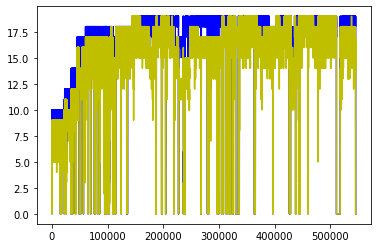

In [31]:
plt.plot(time_indices_sum_new,color='b')
plt.plot(time_indices_sum,color='y')

In [37]:
print('SA之前',len(time_indices_sum[time_indices_sum == 19]))
print('SA之后',len(time_indices_sum_new[time_indices_sum_new==19]))

SA之前 84625
SA之后 311612


In [41]:
time_indices_sum = np.zeros_like(time_indices_map[3])
time_indices_sum_new = np.zeros_like(time_indices_sum)

for id in total_id_uniq_new:
    time_indices_sum += time_indices_map[id]
    time_indices_sum_new += time_indices_map_new[id]

In [42]:
len(total_id_uniq_new)

51

In [84]:
len(time_indices_sum_new[time_indices_sum_new > 40])

334065

In [51]:
len(time_indices_sum[time_indices_sum > 40])

265940

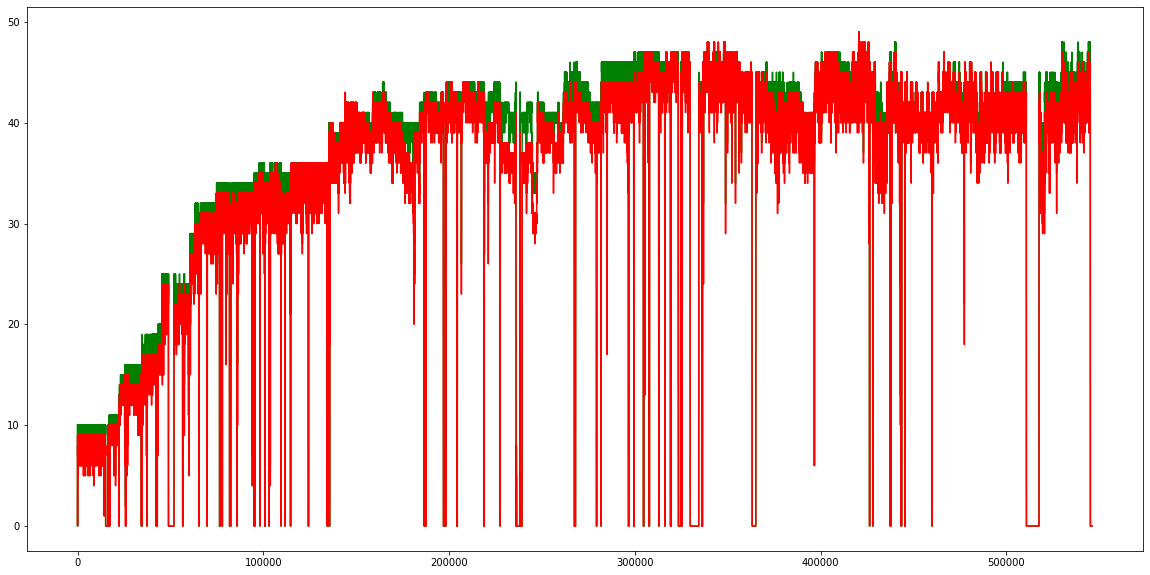

In [54]:
plt.figure(figsize=(20,10))
plt.plot(time_indices_sum_new,color='g')
plt.plot(time_indices_sum,color='r')
plt.savefig('sa.png')

In [85]:
indices = np.arange(10,50,1)
records_num = []
records_num_new = []
for i in indices:
    tmp = len(time_indices_sum[time_indices_sum >= i])
    tmp_new = len(time_indices_sum_new[time_indices_sum_new >= i])
    records_num.append(tmp)
    records_num_new.append(tmp_new)


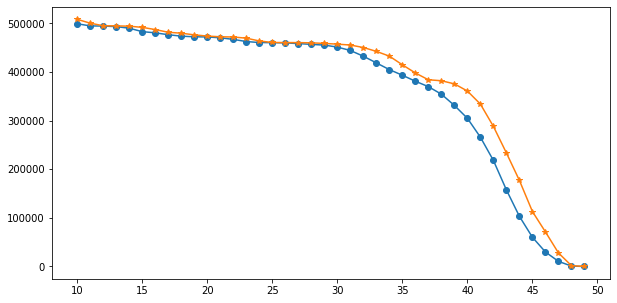

In [98]:
plt.figure(figsize=(10,5))
plt.plot(indices,records_num,marker='o')
plt.plot(indices,records_num_new,marker='*')
plt.savefig('sa3.png',dpi=300,box_inches='tight',pad_inches=0)

In [100]:
for i,item in enumerate(records_num_new):
    print(i+10,item)

10 508449
11 500630
12 495324
13 495013
14 494383
15 491985
16 487464
17 481837
18 479966
19 476541
20 474046
21 472592
22 472151
23 469692
24 464035
25 460842
26 460714
27 460584
28 460130
29 458918
30 457446
31 455587
32 450530
33 442583
34 432777
35 414962
36 398115
37 384131
38 382136
39 375703
40 360970
41 334065
42 288185
43 233491
44 176960
45 112980
46 71088
47 27828
48 1606
49 14


## Previous Code


In [15]:
print('id','\tbefore','\t\tafter')
for id in total_id_uniq:
    # print(id,'\t',id_record_dict_new[id])
    print(id,'\t',id_record_dict[id],'\t',id_record_dict_new[id])
    # print(id,'\t',id_record_dict[id],'\t')

id 	before 		after
3 	 427534 	 0
5 	 453133 	 0
7 	 128827 	 128827
8 	 505421 	 1474665
9 	 405943 	 0
10 	 335083 	 0
11 	 472048 	 472048
12 	 487106 	 0
13 	 373397 	 0
14 	 478876 	 1744552
15 	 479069 	 0
17 	 482219 	 935352
18 	 506179 	 0
19 	 453966 	 789049
21 	 447188 	 0
23 	 503635 	 1406949
24 	 514036 	 0
25 	 484446 	 0
26 	 520877 	 1460521
27 	 87038 	 87038
30 	 453700 	 0
31 	 465717 	 465717
32 	 477273 	 0
33 	 428389 	 903130
34 	 515512 	 1159058
35 	 454316 	 1960866
36 	 484798 	 0
37 	 481184 	 0
39 	 465934 	 0
40 	 426519 	 799916
41 	 492456 	 0
42 	 475780 	 0
43 	 287071 	 0
44 	 292511 	 0
45 	 496065 	 0
46 	 501266 	 1484437
47 	 132198 	 132198
49 	 446618 	 787006
50 	 405691 	 0
51 	 455363 	 455363
53 	 474741 	 0
54 	 441307 	 0
55 	 156833 	 156833
56 	 346042 	 0
57 	 257244 	 257244
59 	 273292 	 273292
60 	 462032 	 462032
61 	 265435 	 265435
62 	 322947 	 322947
63 	 253729 	 253729
64 	 272898 	 0
65 	 362265 	 362265
66 	 446345 	 0
68 

In [16]:
df_sum.columns

Index(['Station ID', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'Time since the epoch [s]', 'Sequence Number', 'Ambient Temperature',
       'Surface Temperature', 'Relative Humidity [%]'],
      dtype='object')

In [7]:
time_range = df_sum[unix_time].values
time_range = np.unique(time_range)
time_max = int(np.max(time_range))
time_min = int(np.min(time_range))
time_range_unbiased = time_range-time_min

In [17]:
time_range_new = df_sum_sa[unix_time].values
time_range_new = np.unique(time_range_new)
time_max_new = int(np.max(time_range_new))
time_min_new = int(np.min(time_range_new))

time_range_unbiased_new = time_range_new-time_min_new

In [9]:
# time_range_tmp = np.arange(time_min,time_max,30,dtype=int)
# time_range_tmp = np.arange(time_min,time_max,1,dtype=int)

time_indices_map = {}

for id in track(total_id_uniq):
    time_indices_tmp = np.zeros(int(np.max(time_range_unbiased))+1)
# for i,timed in enumerate(time_range):
        # nums = len(df_sum[(df_sum[unix_time] > timed) & (df_sum[unix_time] <= timed+30)][unix_time].astype(int))
        # time_range_tmp[i] = nums
        # if df_tmp is not None:
        # del df_tmp
    time_tmp = df_sum[df_sum["Station ID"] == id][unix_time].values
    time_tmp_unbiased = time_tmp-time_min
    for time_id in time_tmp_unbiased:
        time_indices_tmp[int(time_id)] = 1
    
    del time_tmp,time_tmp_unbiased

    time_indices_new = np.zeros(546121)
    for i,item in enumerate(time_indices_new):
        if 1 in time_indices_tmp[i*30:i*30+30]:
            time_indices_new[i] = 1
    
    time_indices_map[id] = time_indices_new
    


Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

In [23]:
time_indices_map_new = {}

for id in track(total_id_uniq_new):
    time_indices_tmp_new = np.zeros(int(np.max(time_range_unbiased_new))+1)
    print(id)
    time_tmp_new = df_sum_sa[df_sum_sa['Station ID'] == id][unix_time].values
    print(len(time_tmp_new))
    time_tmp_unbiased_new = time_tmp_new - time_min_new
    # print(time_tmp_unbiased_new)

    for time_id in time_tmp_unbiased_new:
        time_indices_tmp_new[int(time_id)] = 1

    del time_tmp_new,time_tmp_unbiased_new

    time_indices_new_new = np.zeros(546121)
    for i,item in enumerate(time_indices_new_new):
        if 1 in time_indices_tmp_new[i*30:i*30+30]:
            time_indices_new_new[i] = 1
        
    time_indices_map_new[id] = time_indices_new_new


Working... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

In [18]:
total_id_uniq_new

array([  7,   8,  11,  14,  17,  19,  23,  26,  27,  31,  33,  34,  35,
        40,  46,  47,  49,  51,  55,  57,  59,  60,  61,  62,  63,  65,
        69,  70,  71,  72,  73,  75,  76,  79,  80,  81,  82,  84,  87,
        88,  89,  93,  96,  97,  98, 100, 103, 104, 109, 111, 121])

In [22]:
print(df_sum_sa[df_sum_sa['Station ID'] == 8][unix_time].values - time_min_new)

[2.1000000e+01 7.9000000e+01 1.3800000e+02 ... 1.6329933e+07 1.6329963e+07
 1.6329992e+07]


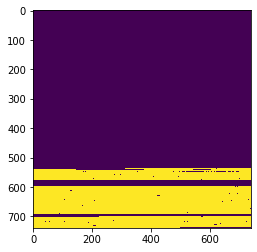

In [10]:
plt.imshow(time_indices_map_new[7].reshape(739,739))

In [ ]:
import pickle
with open('r_data_files/time_indices_map.pkl','wb') as f:
    pickle.dump(time_indices_map,f)
    

In [25]:
import pickle
with open('r_data_files/time_indices_map_new.pkl','wb') as f:
    pickle.dump(time_indices_map_new,f)

/home/esmidth/.pyenv/versions/anaconda3-2020.02/envs/ccs_ta/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


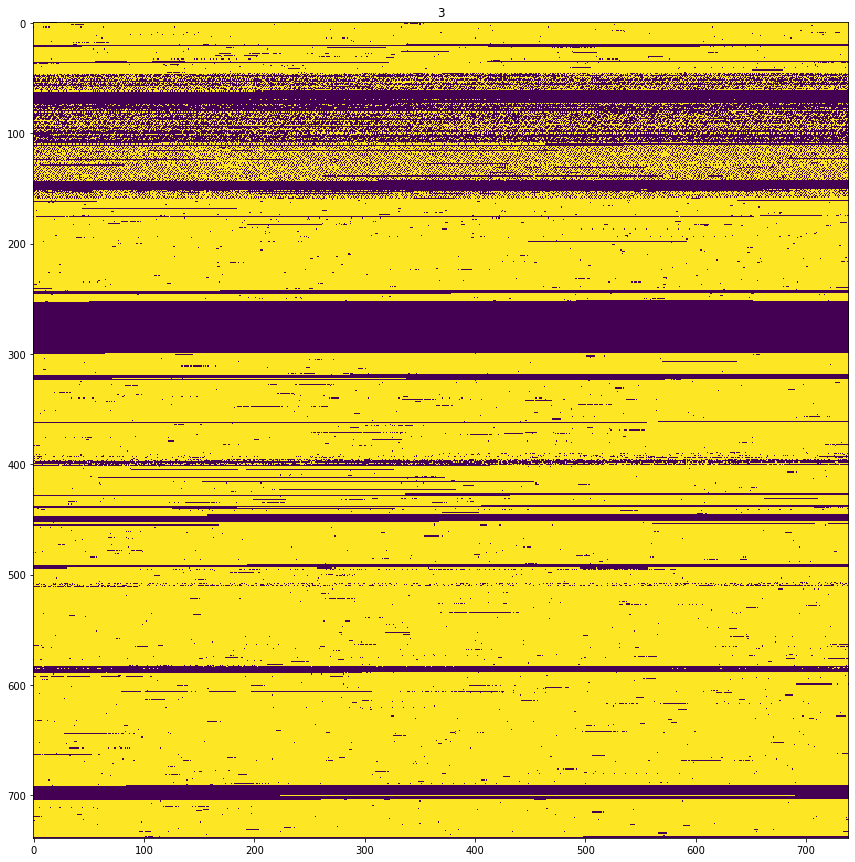

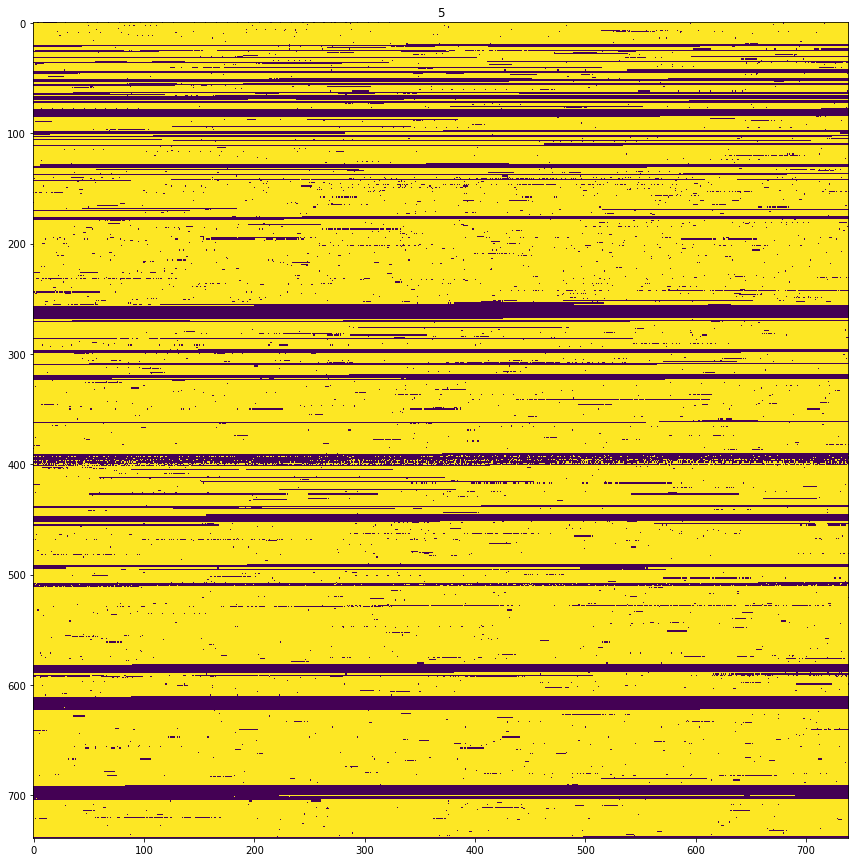

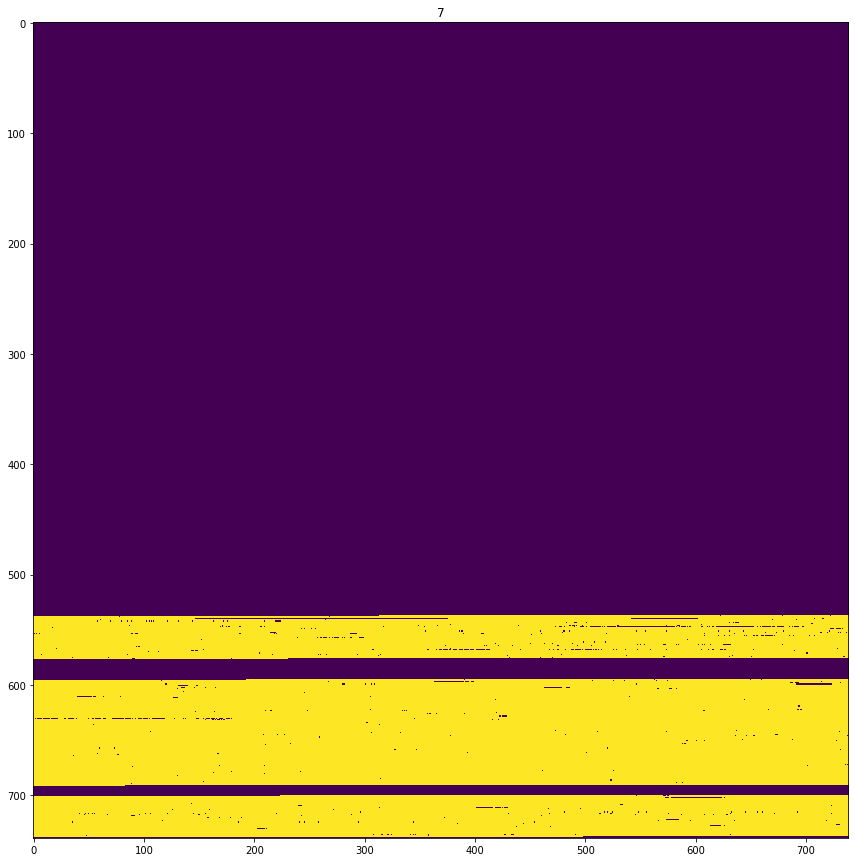

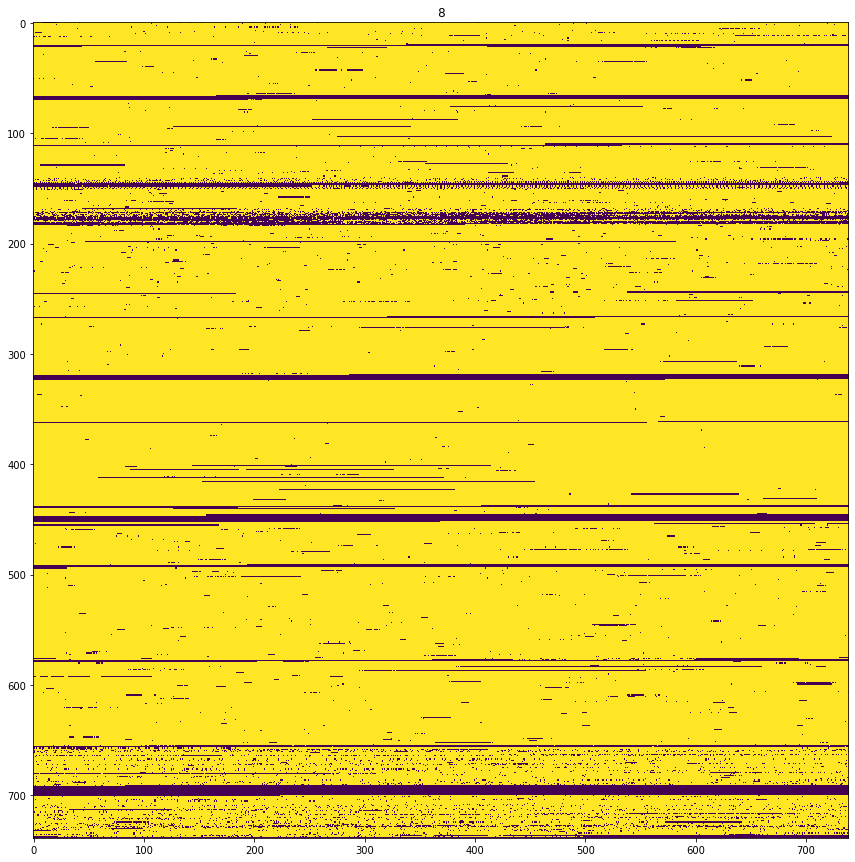

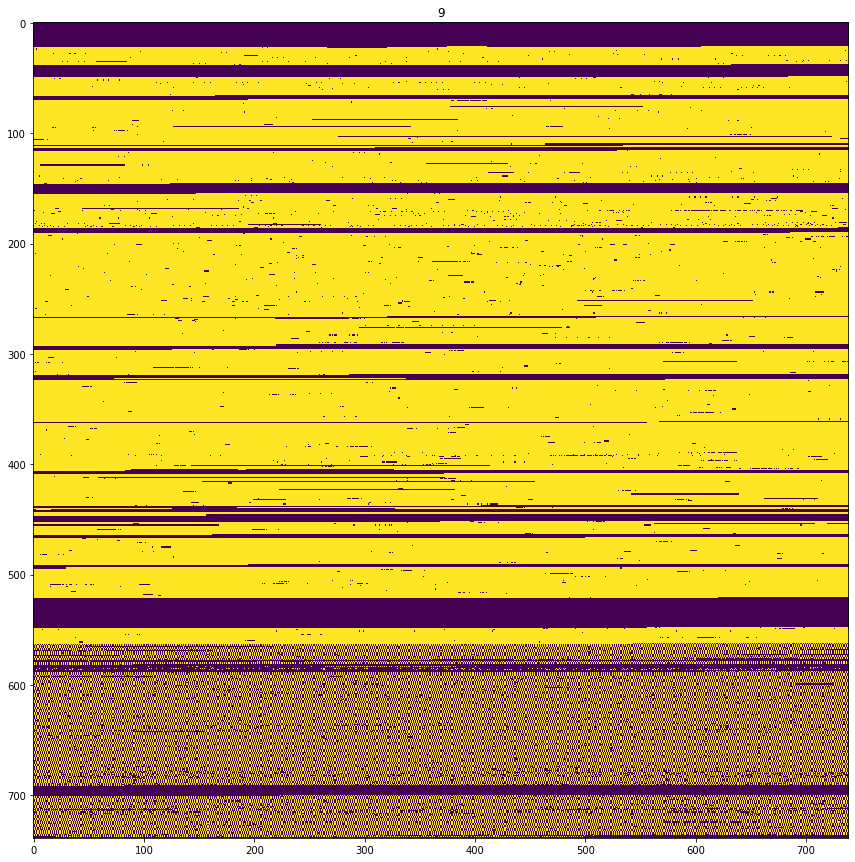

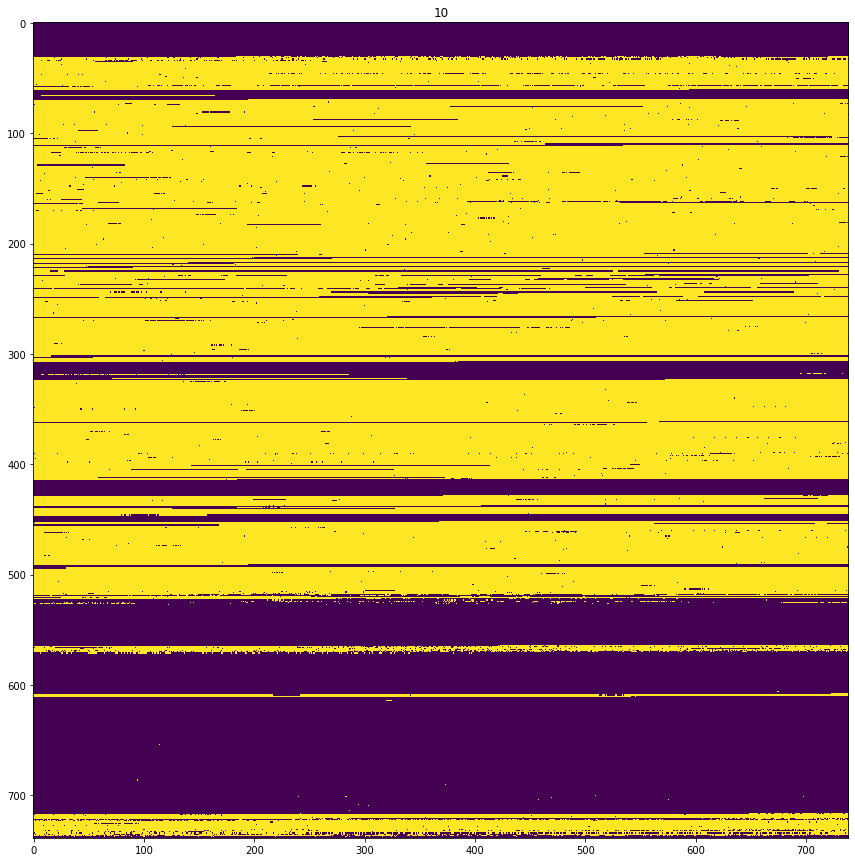

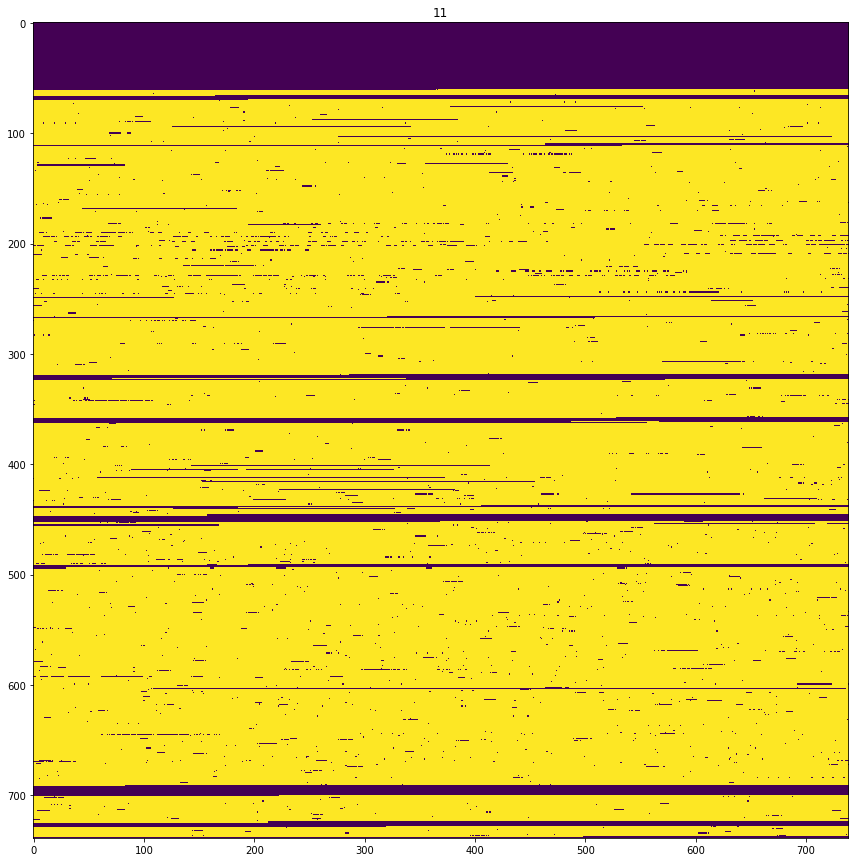

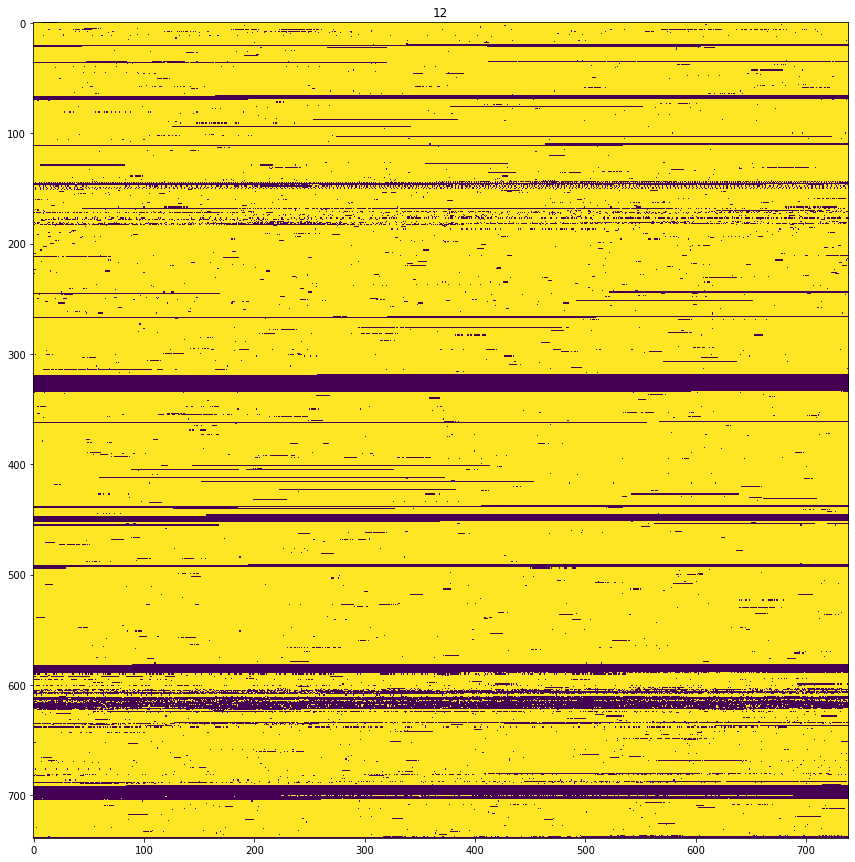

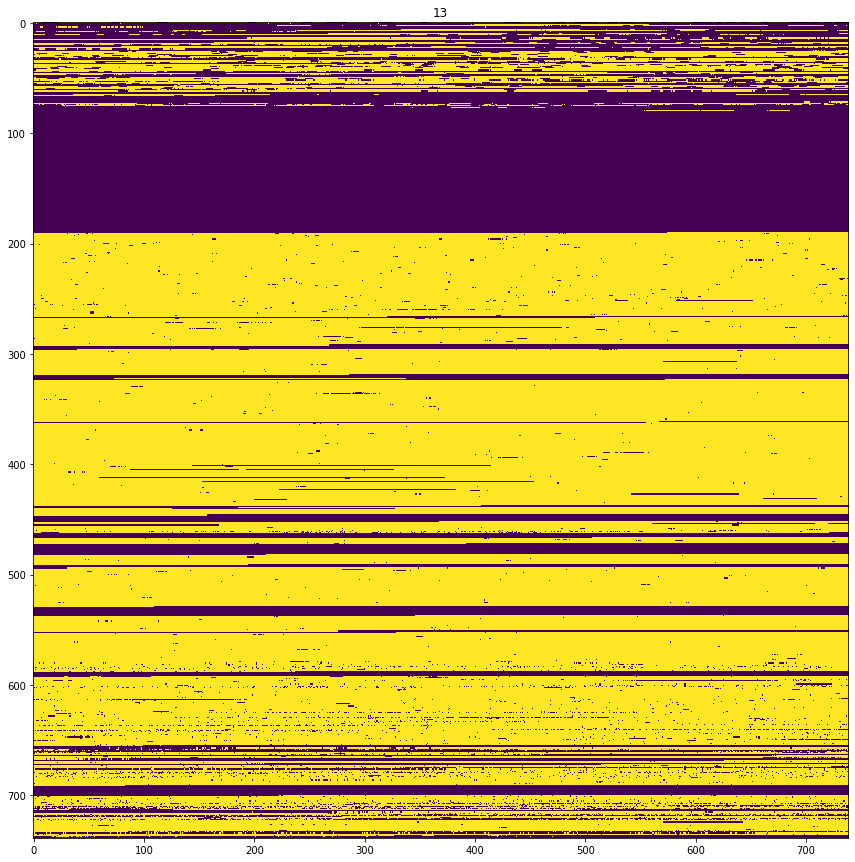

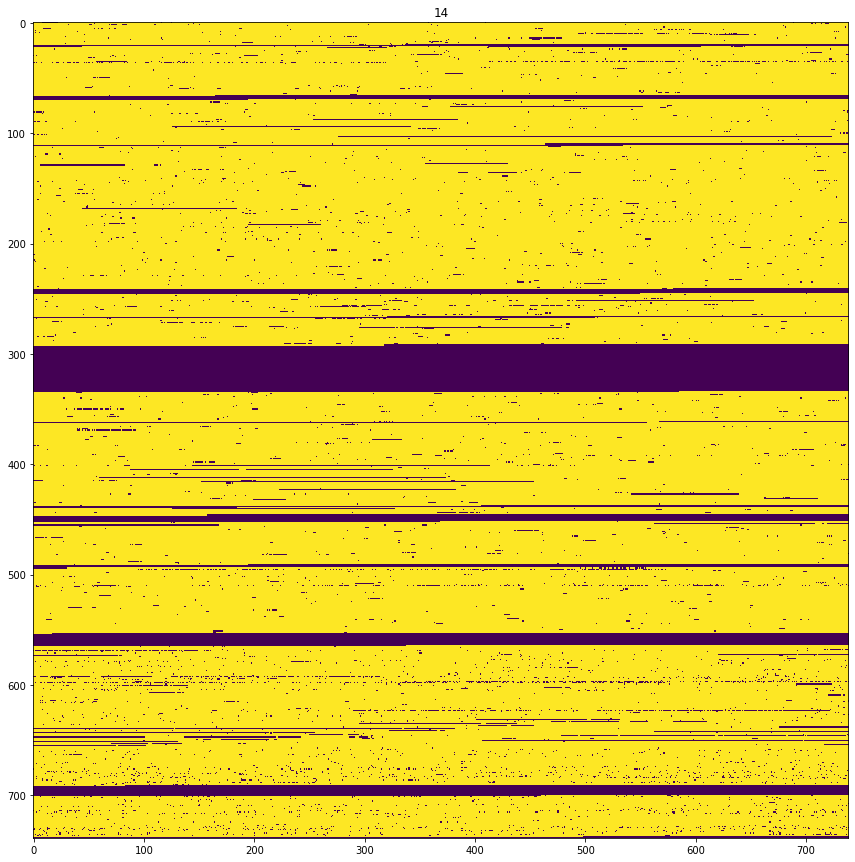

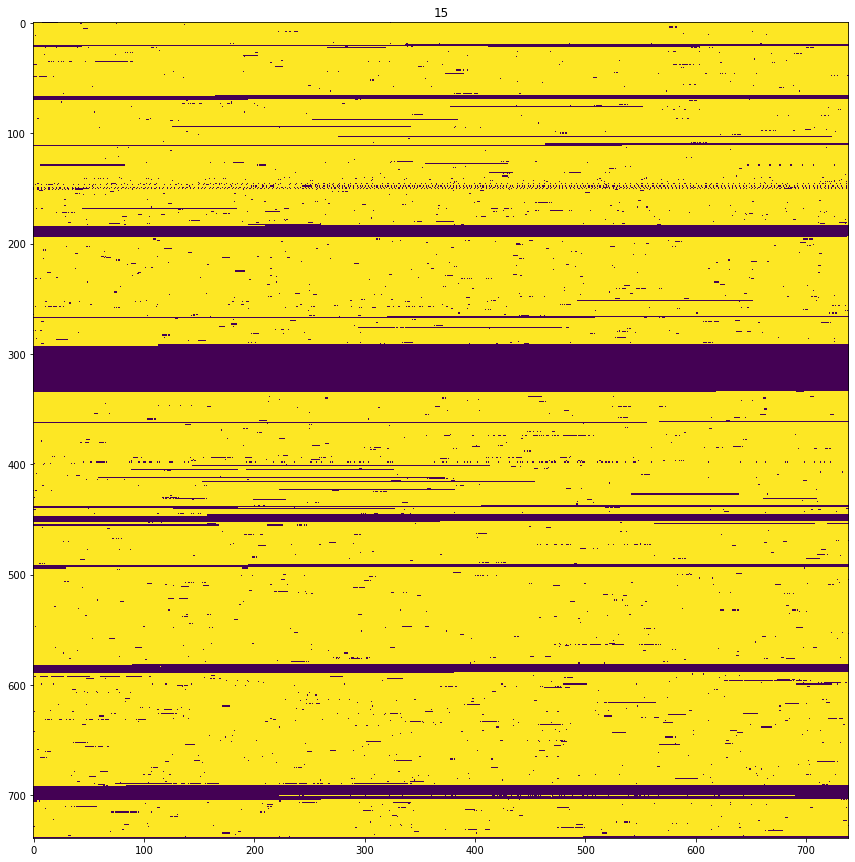

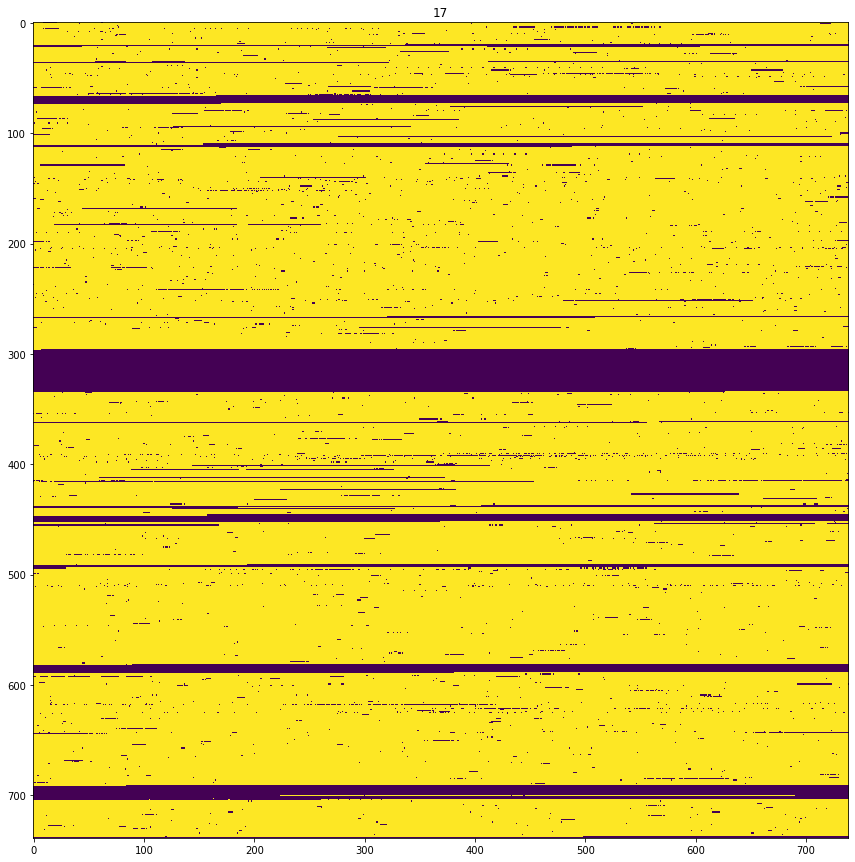

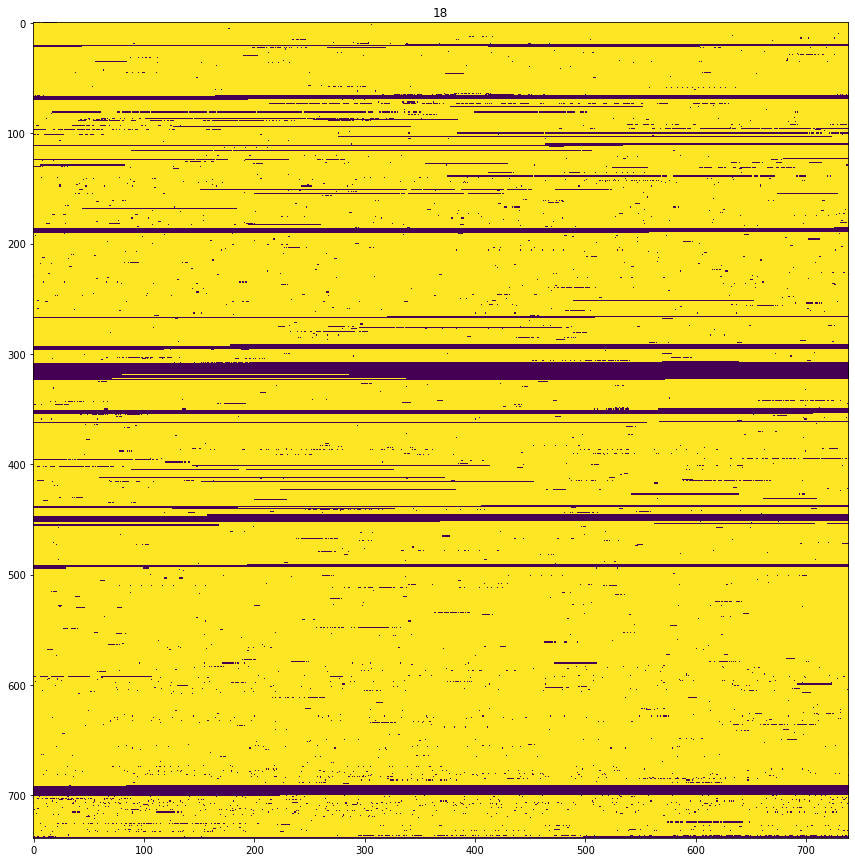

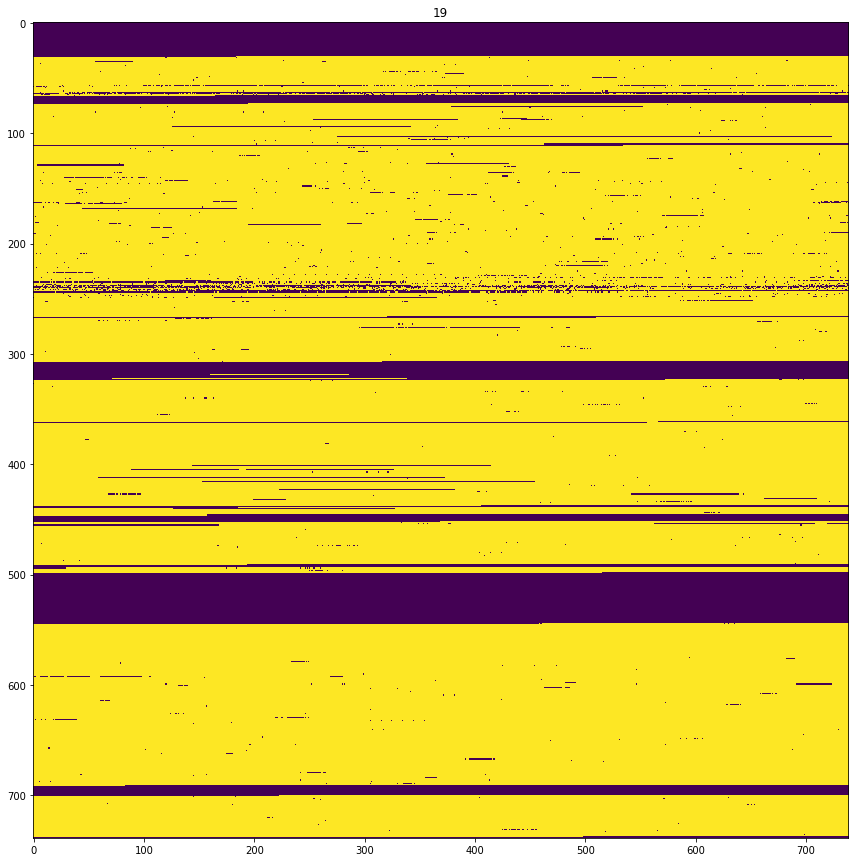

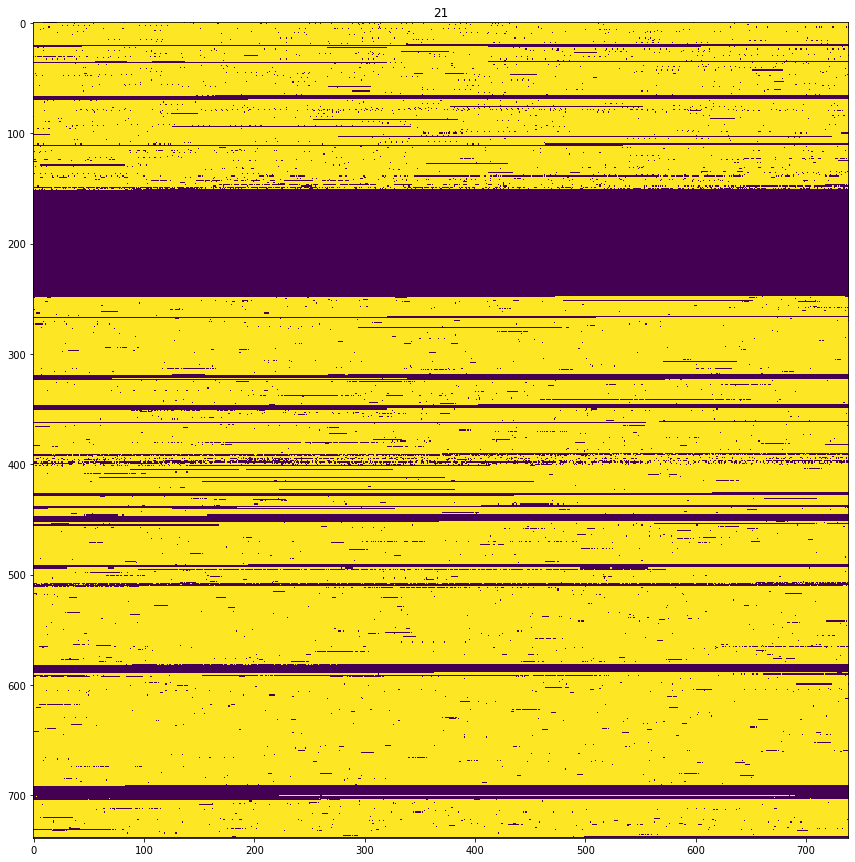

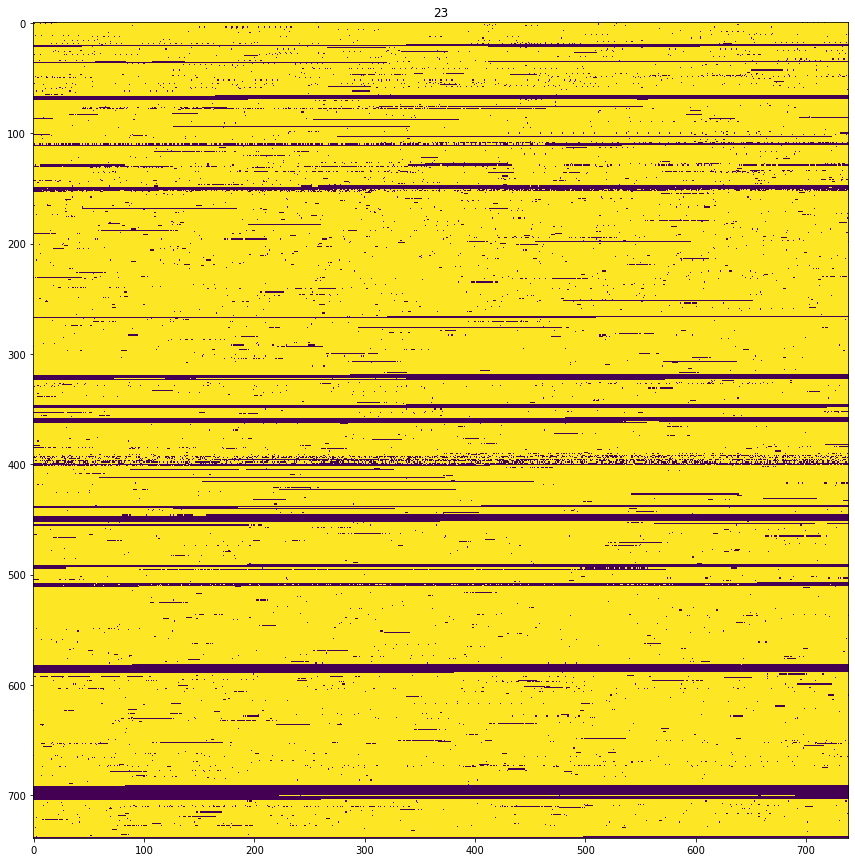

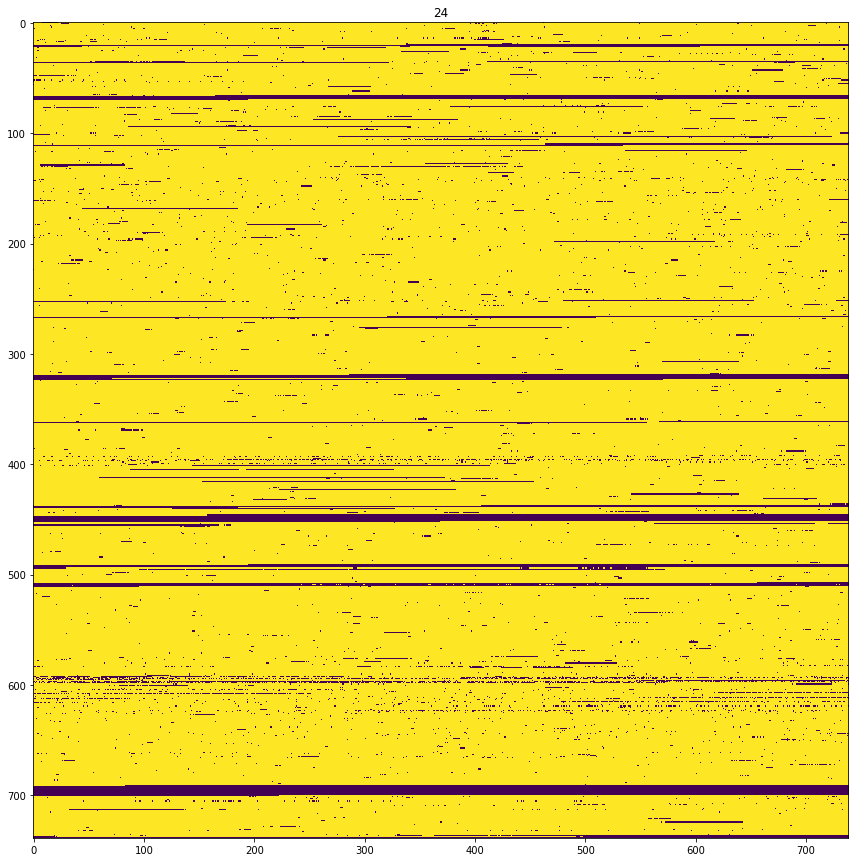

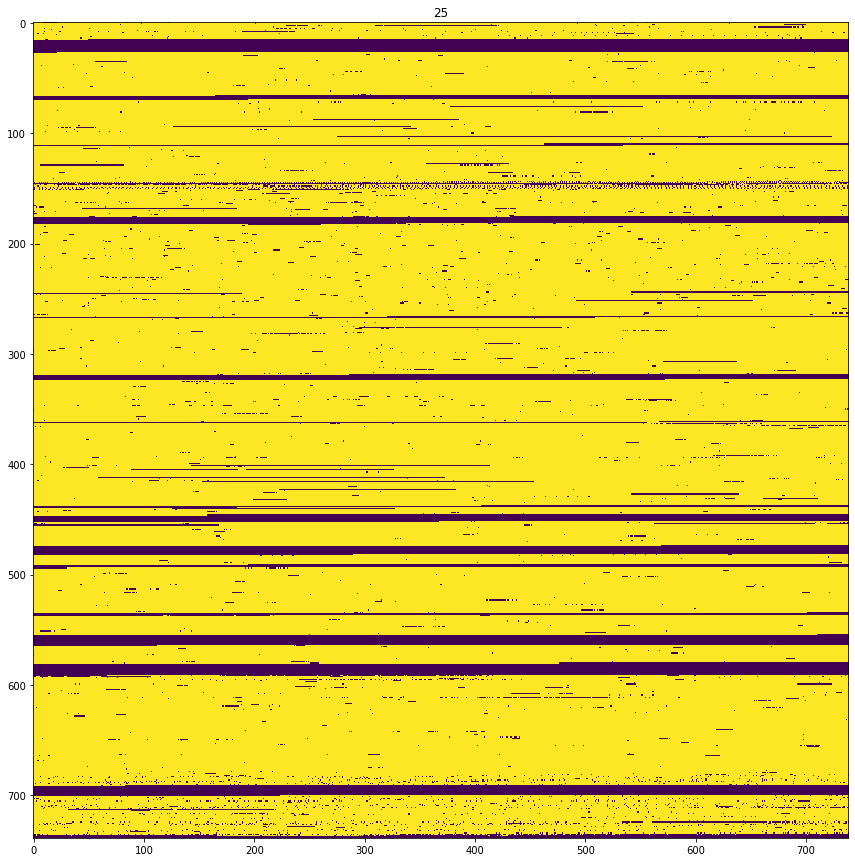

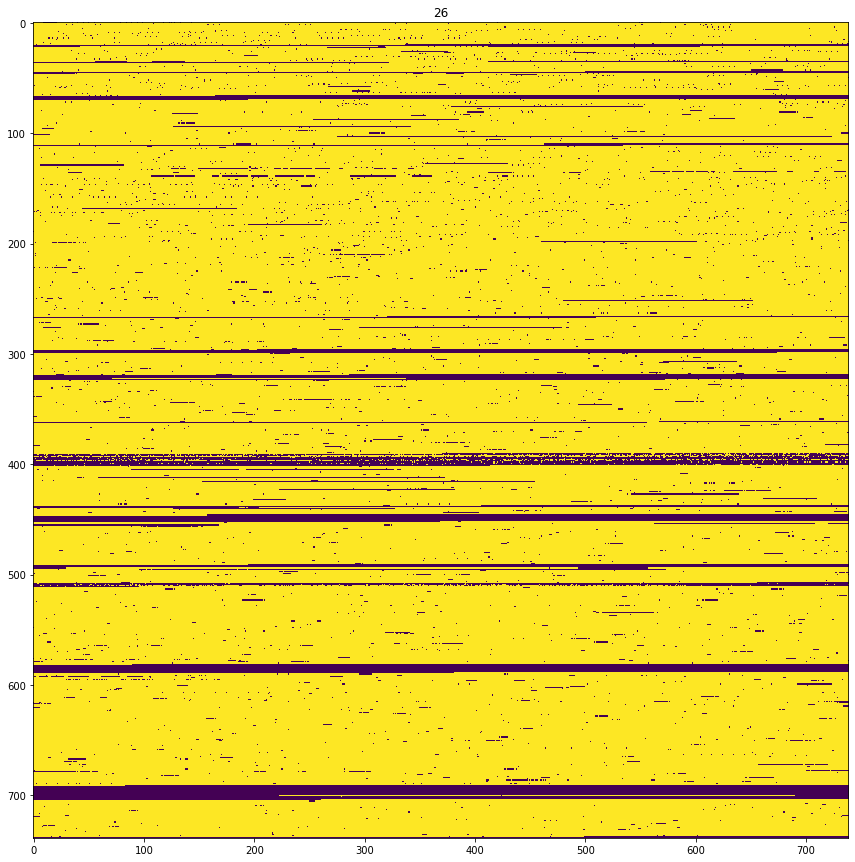

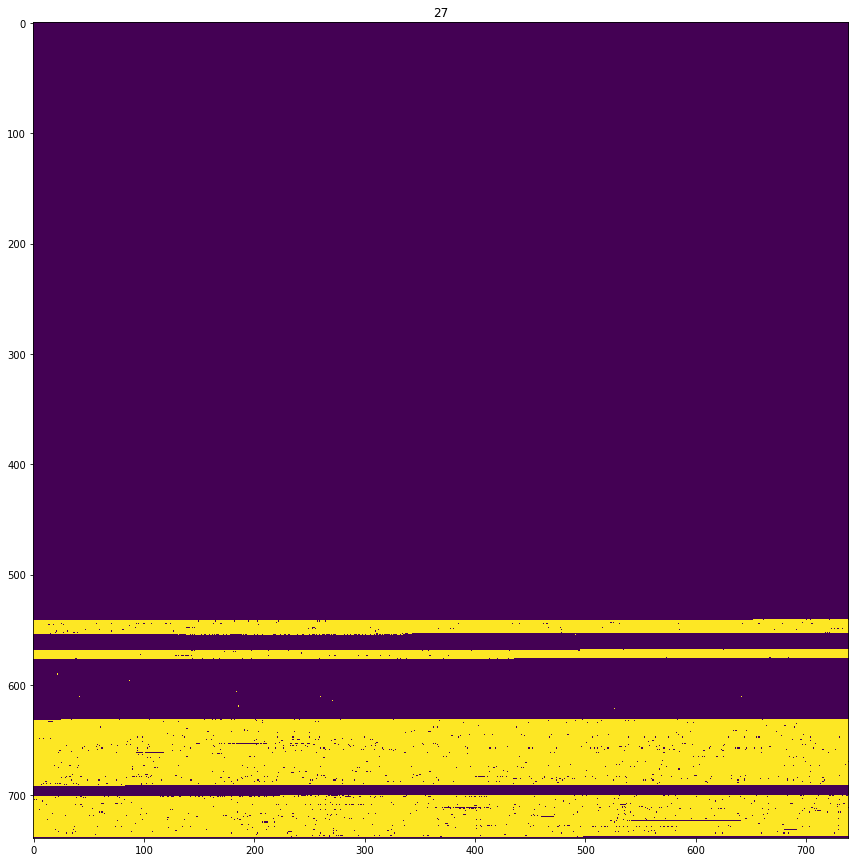

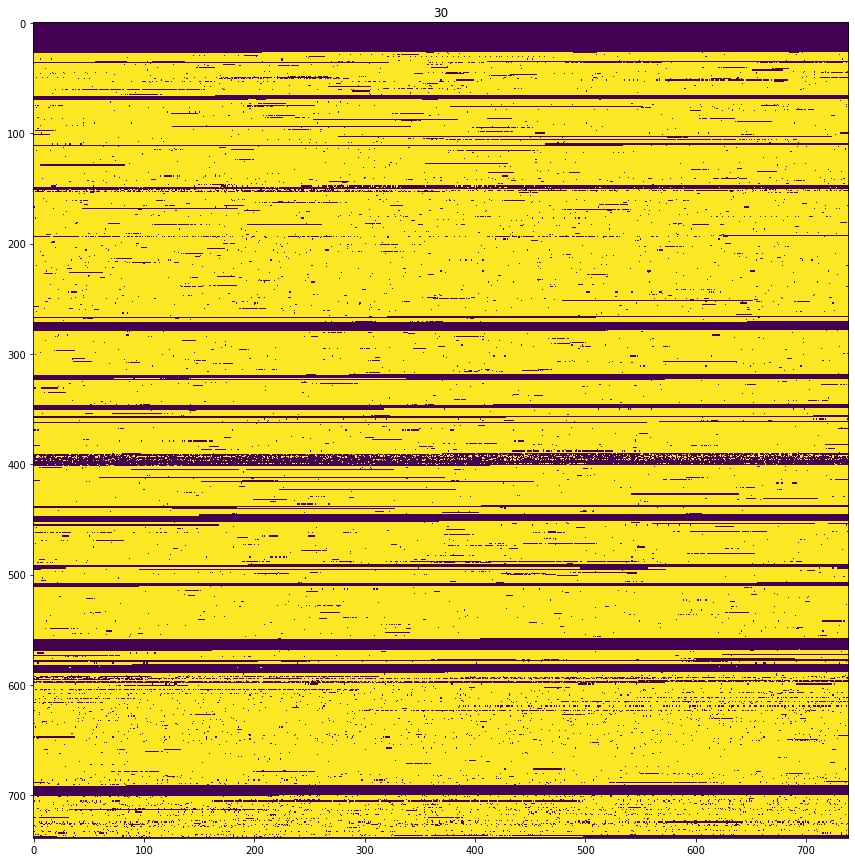

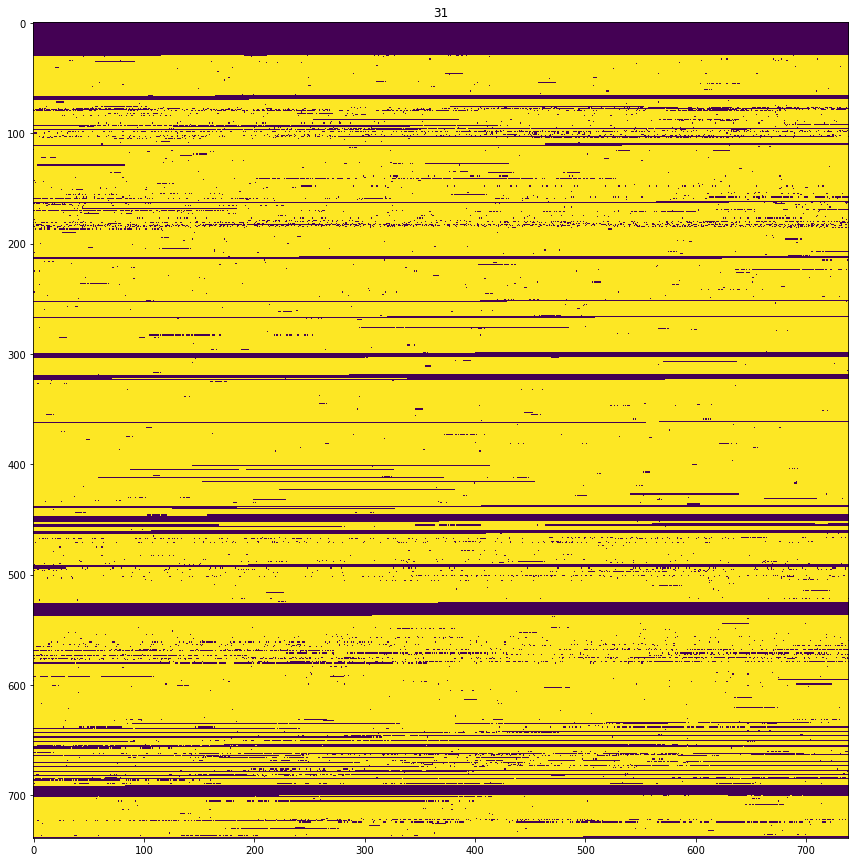

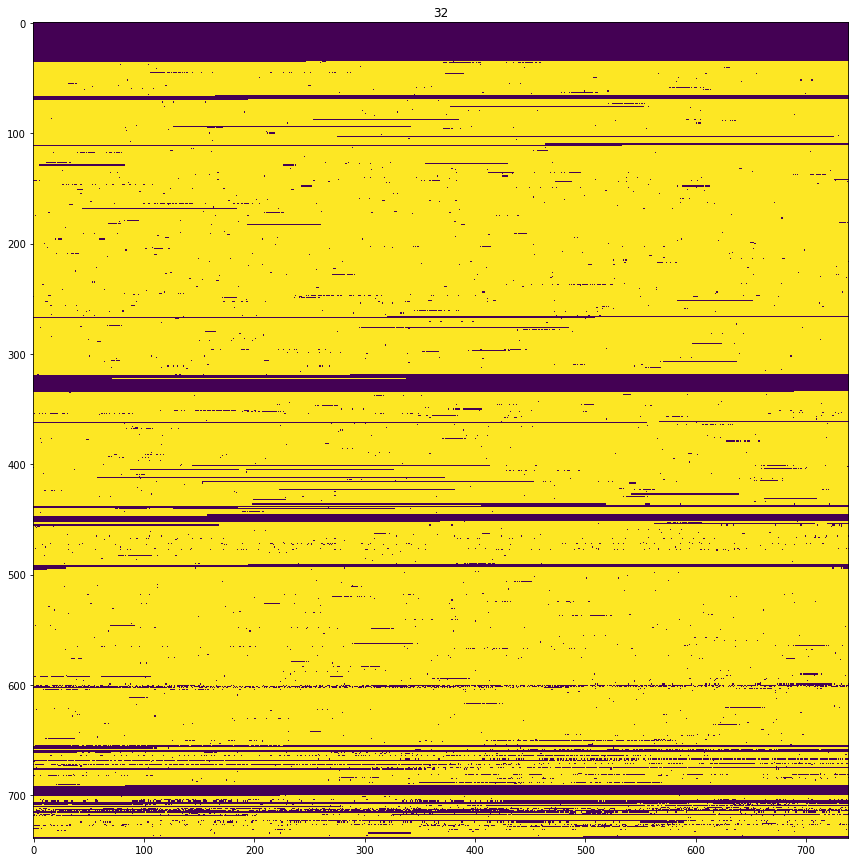

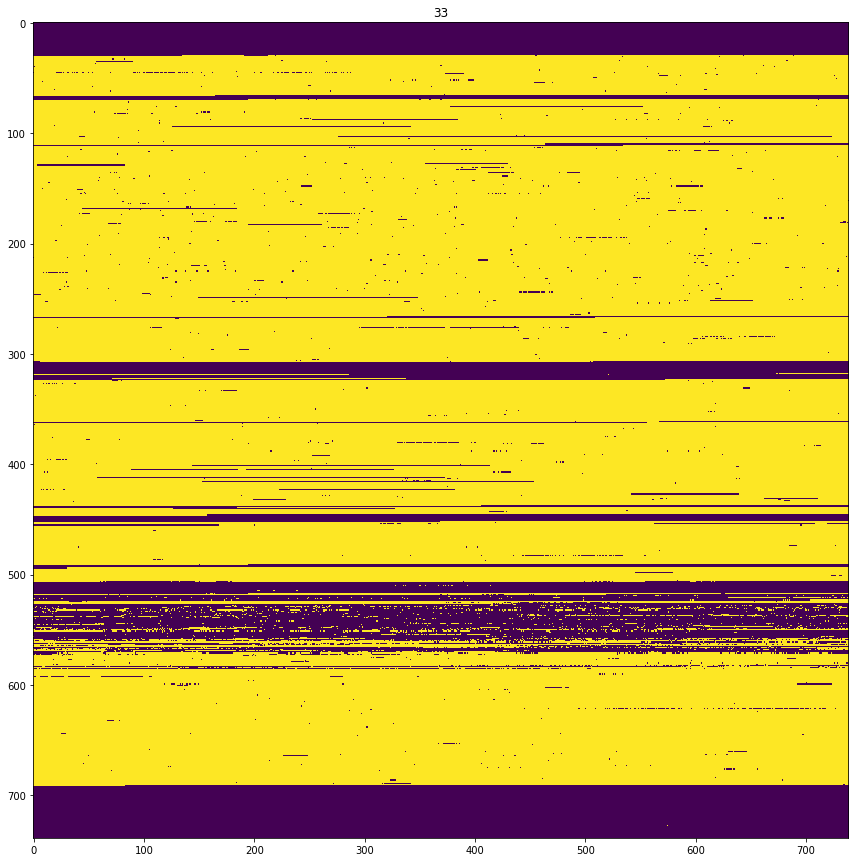

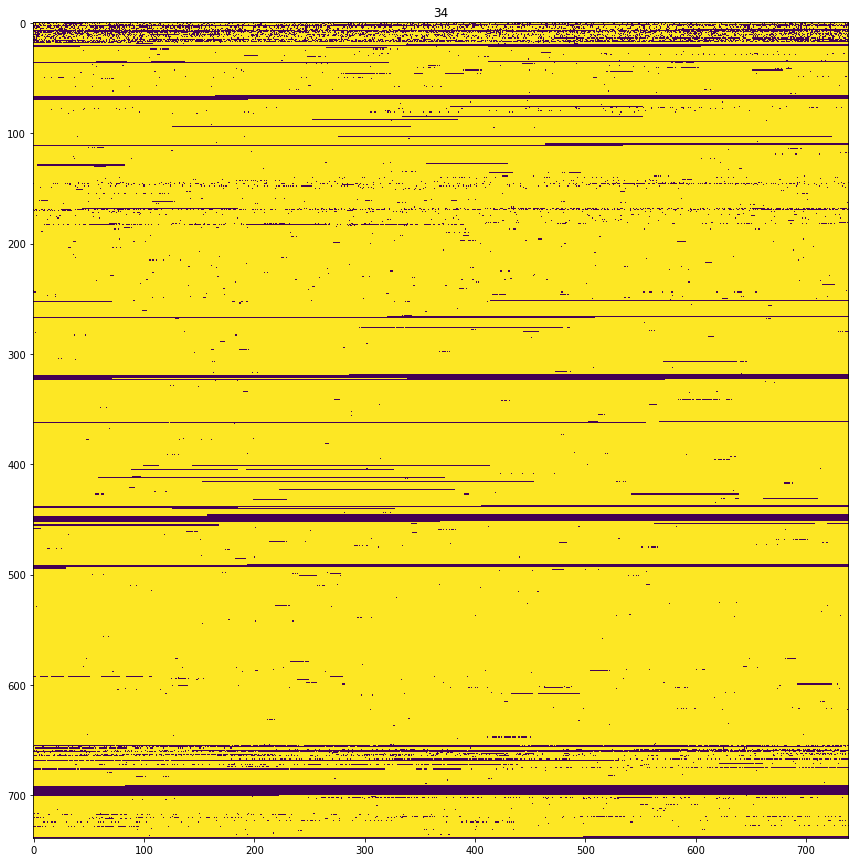

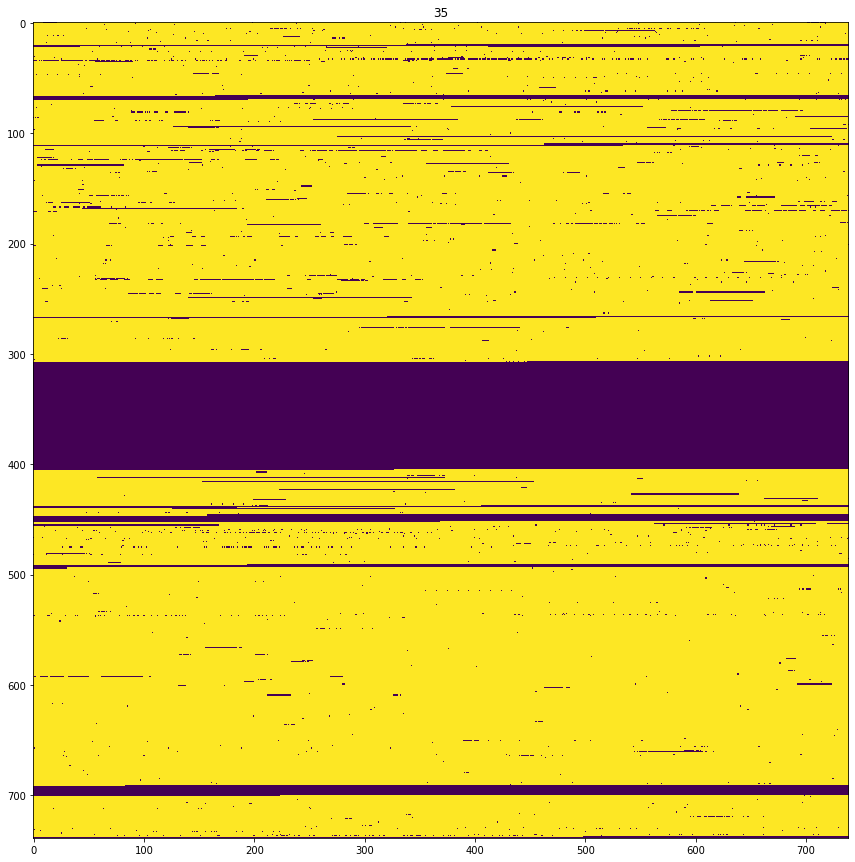

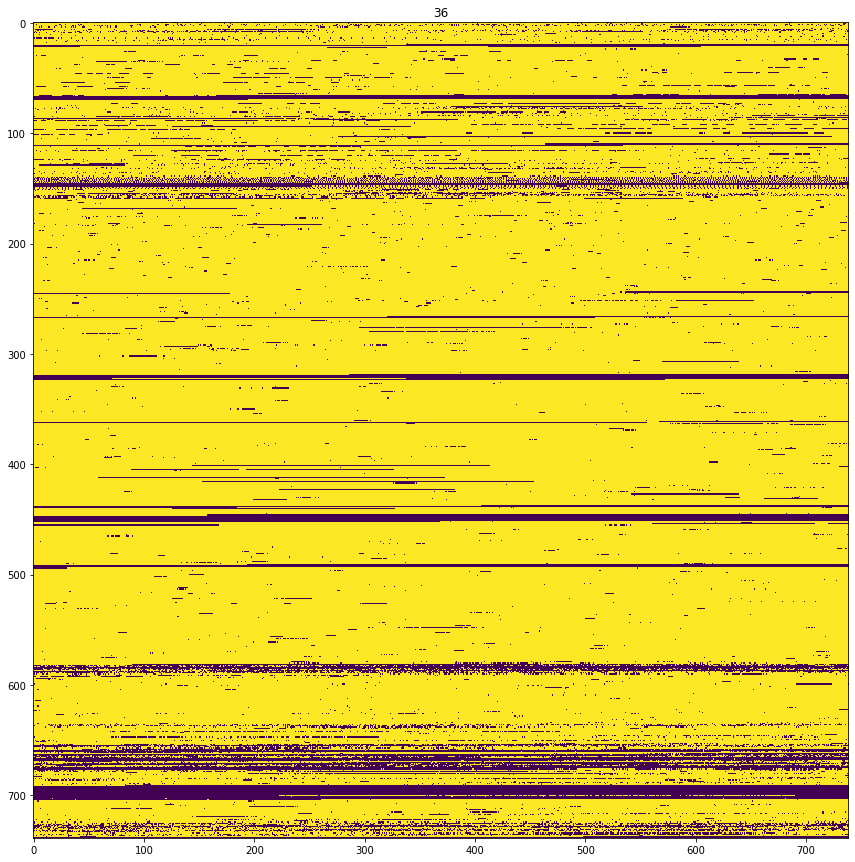

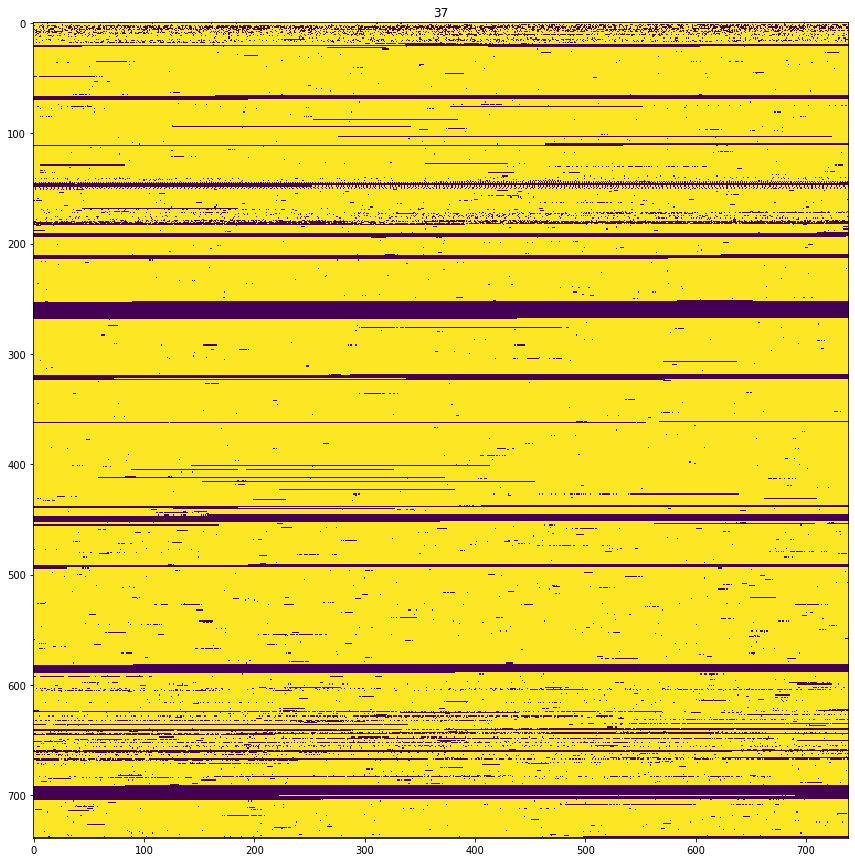

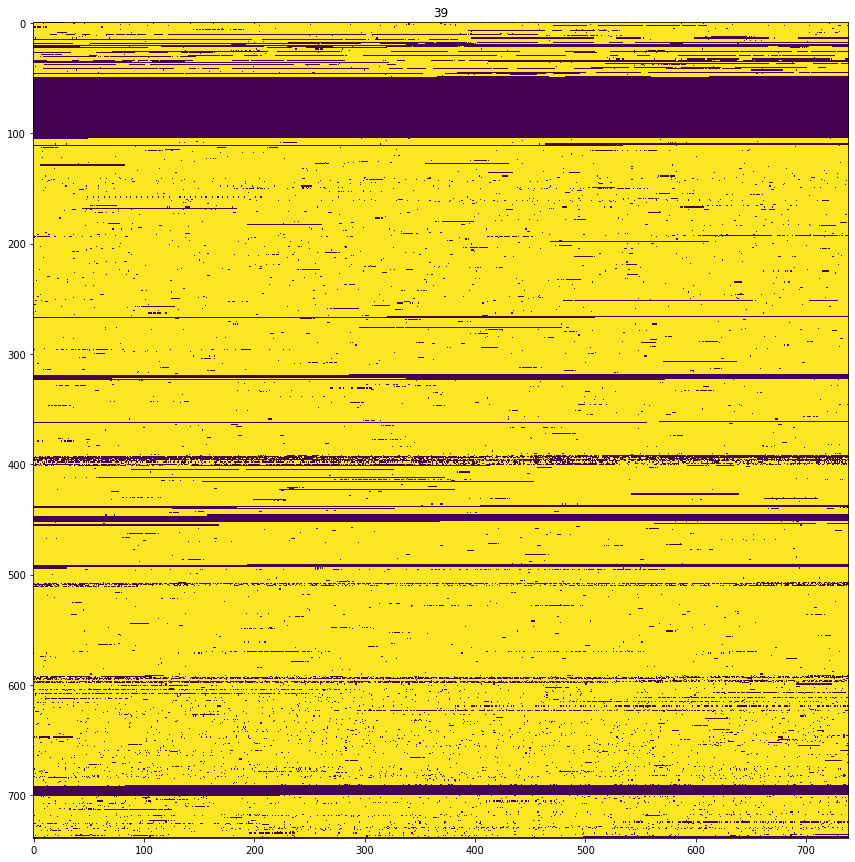

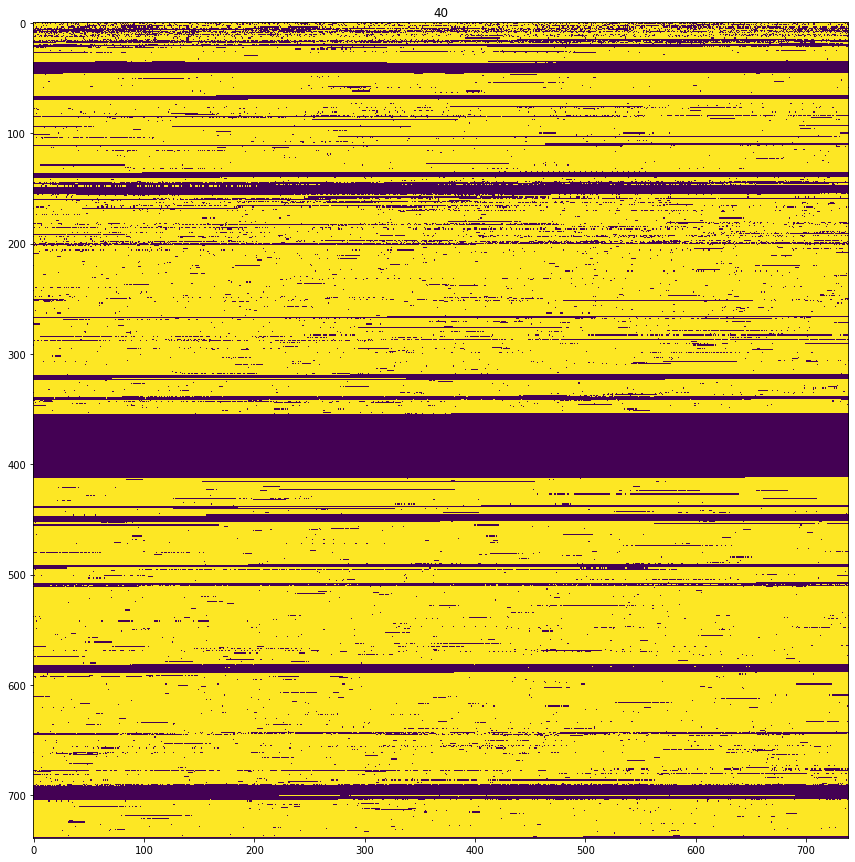

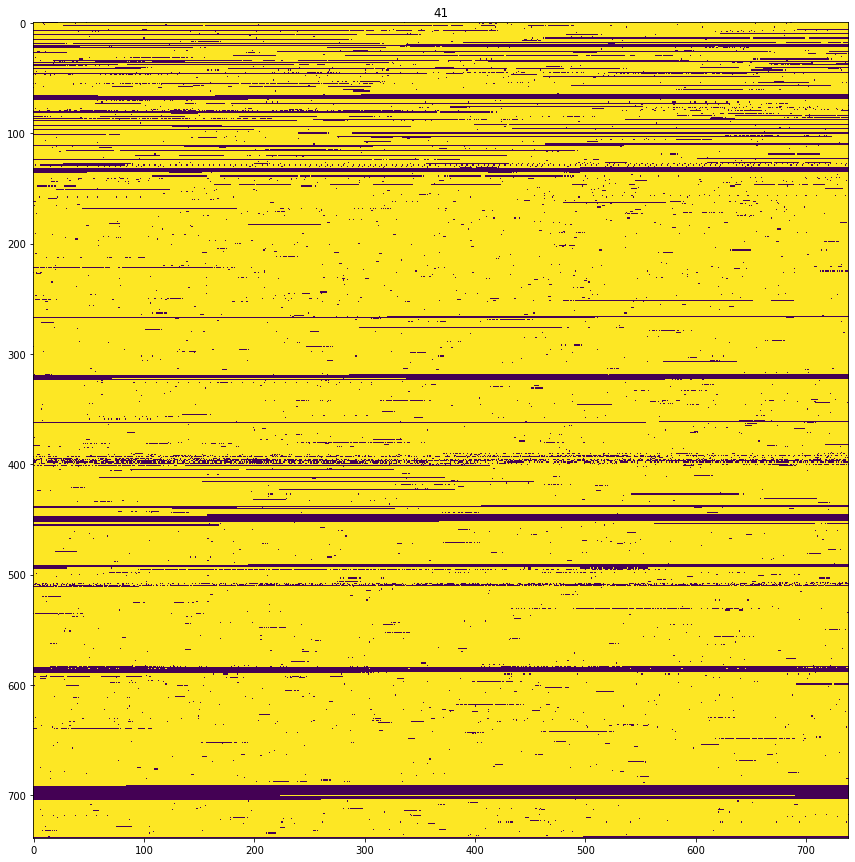

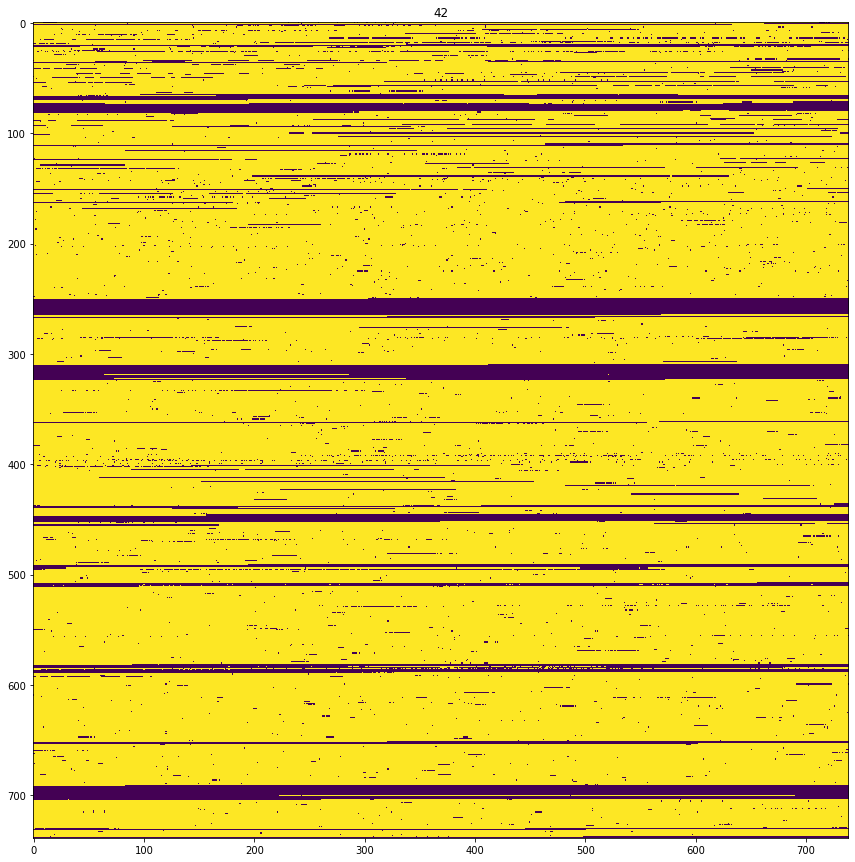

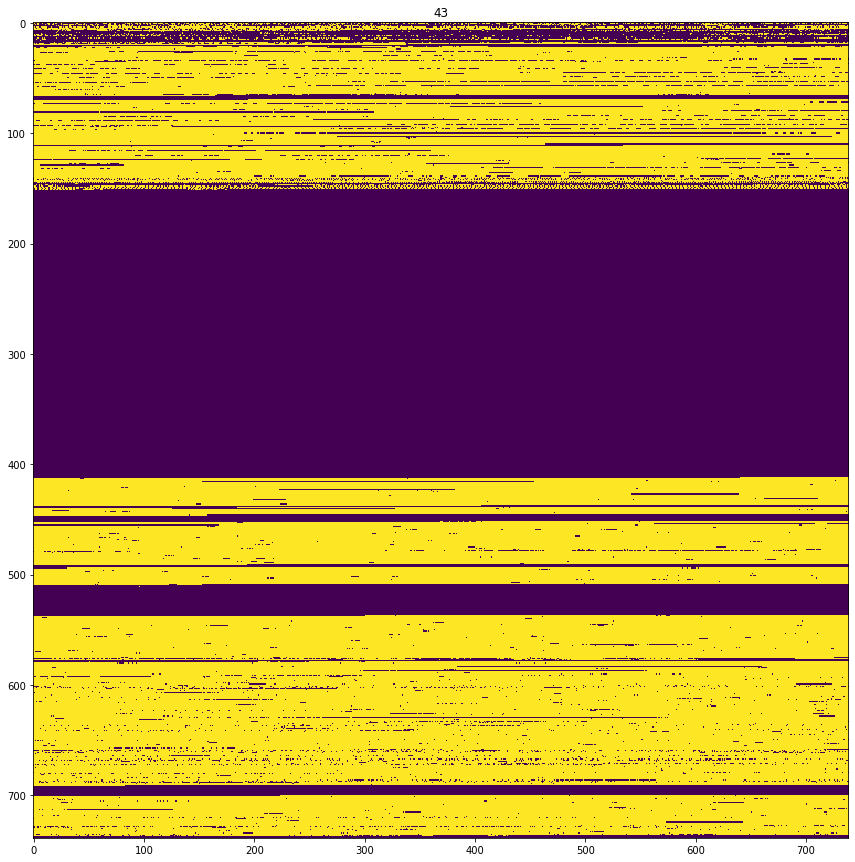

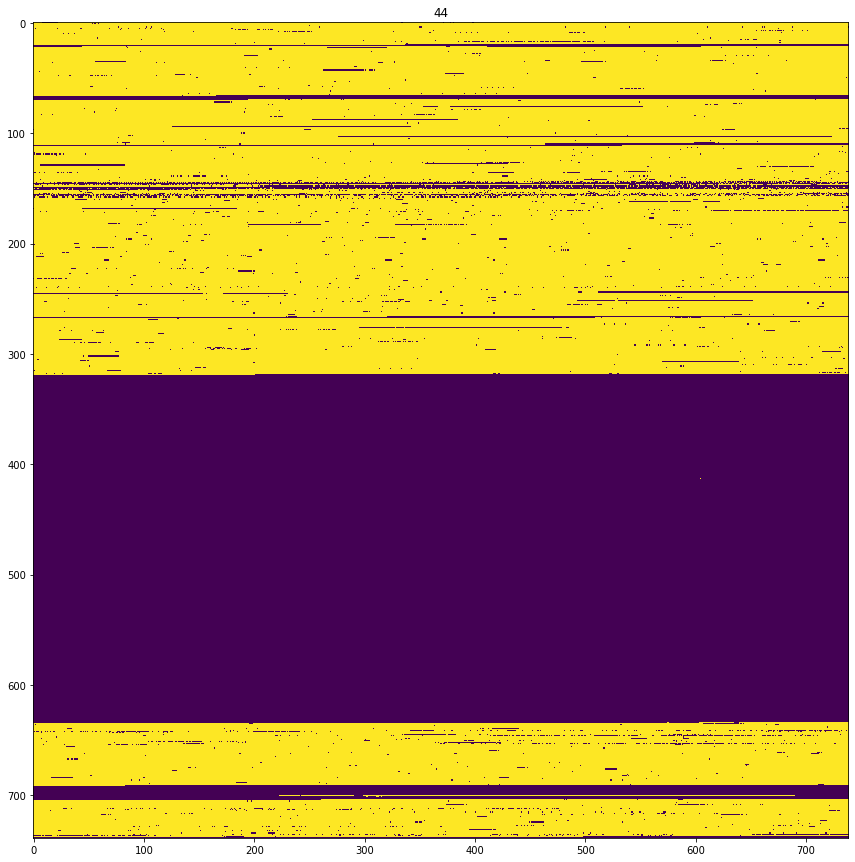

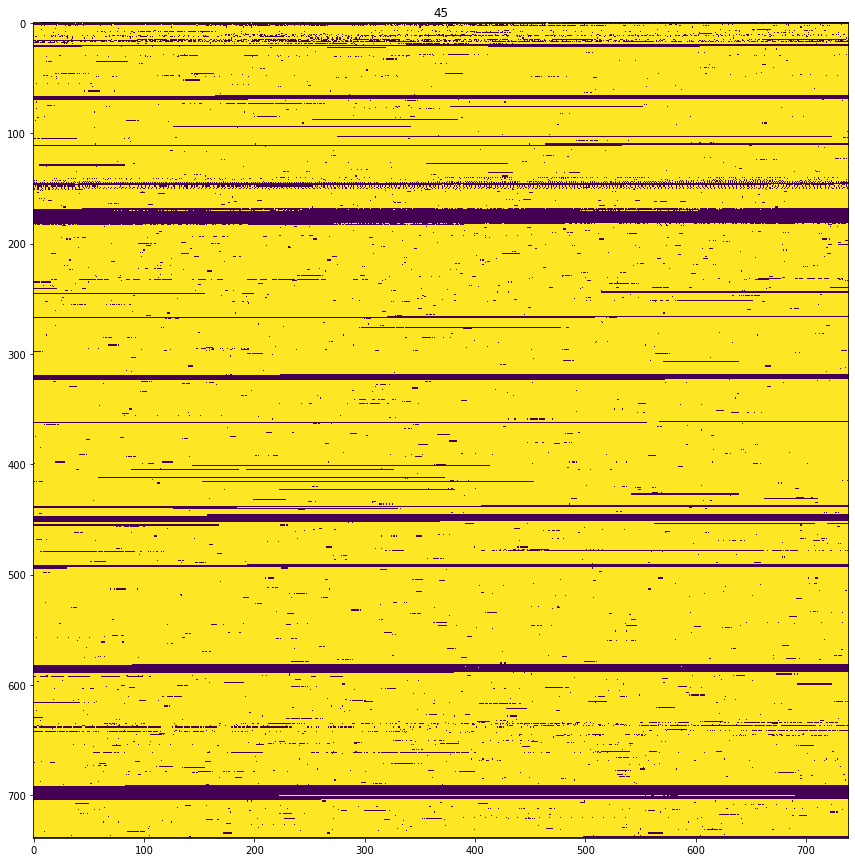

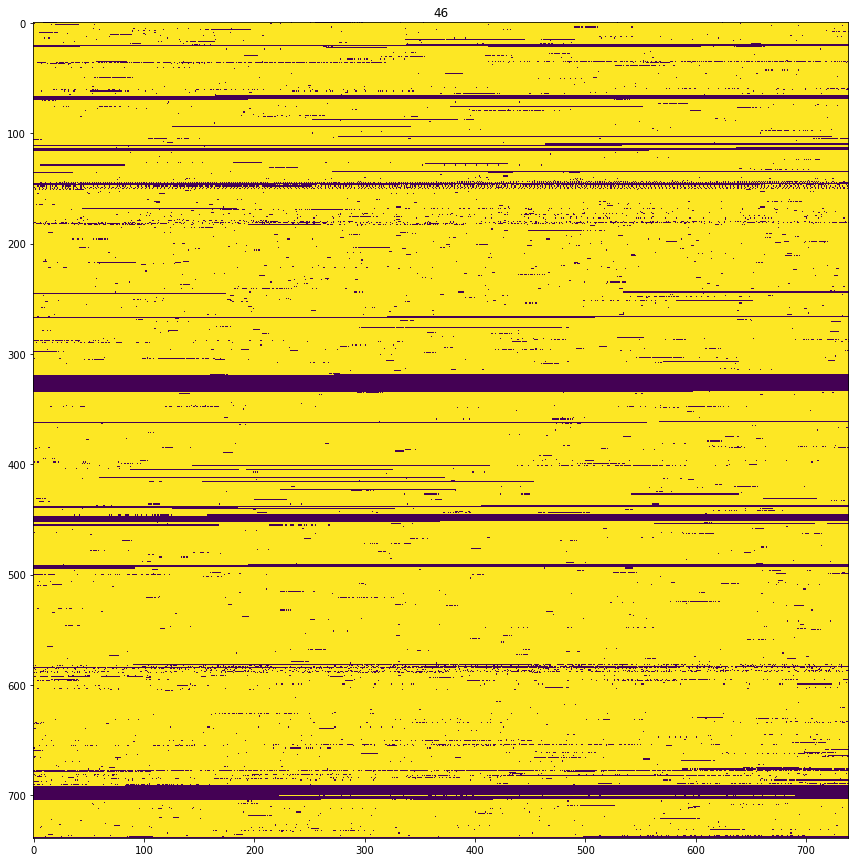

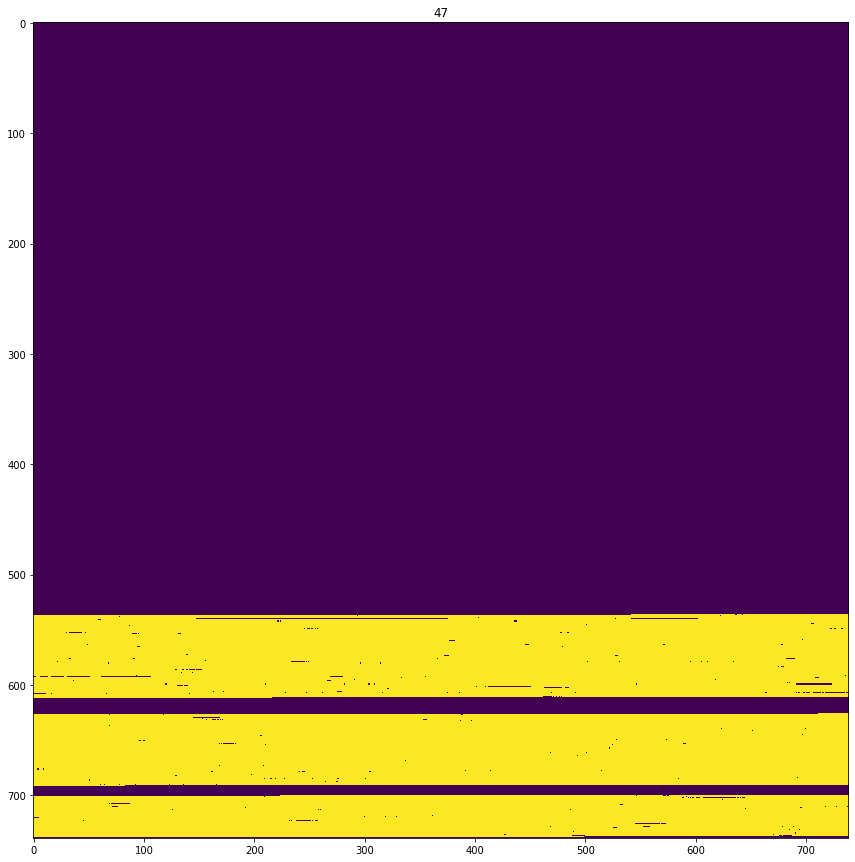

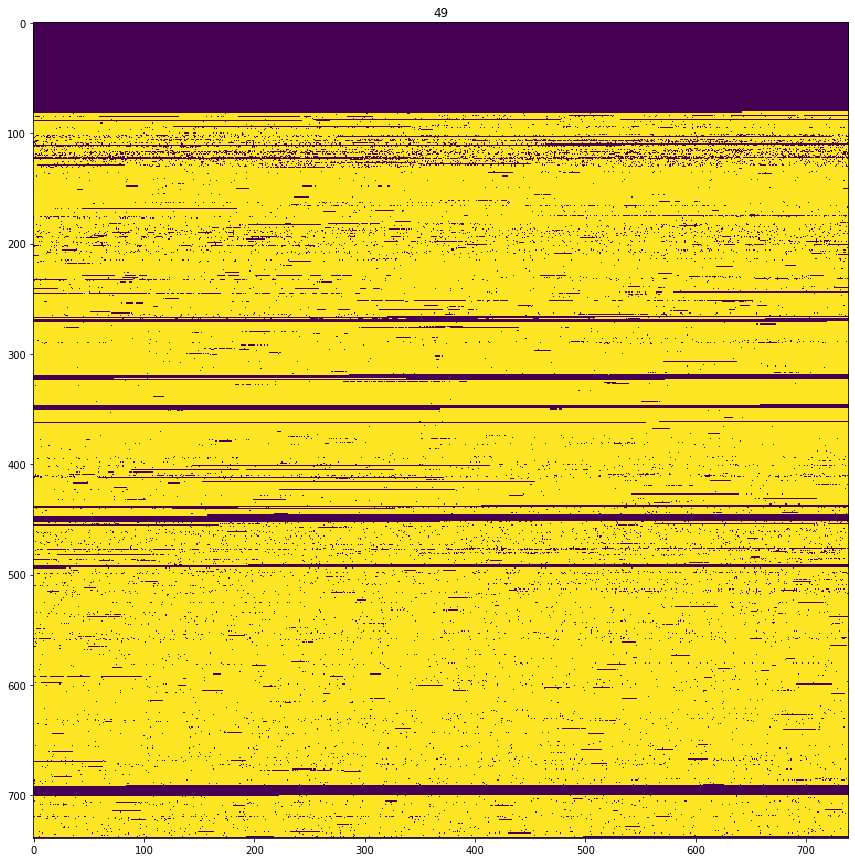

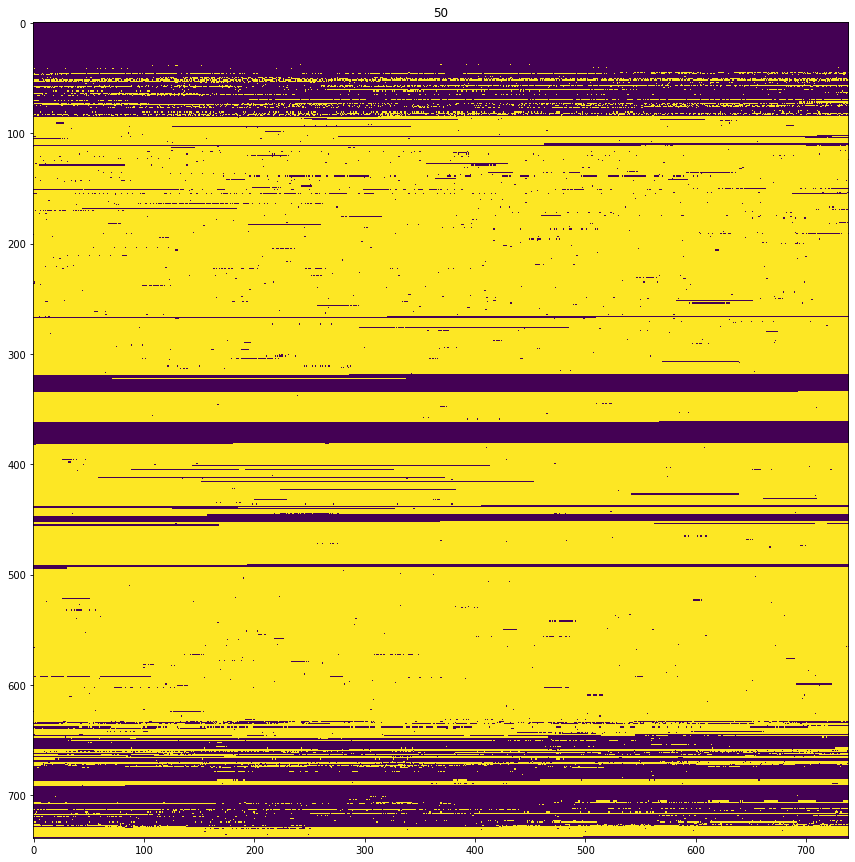

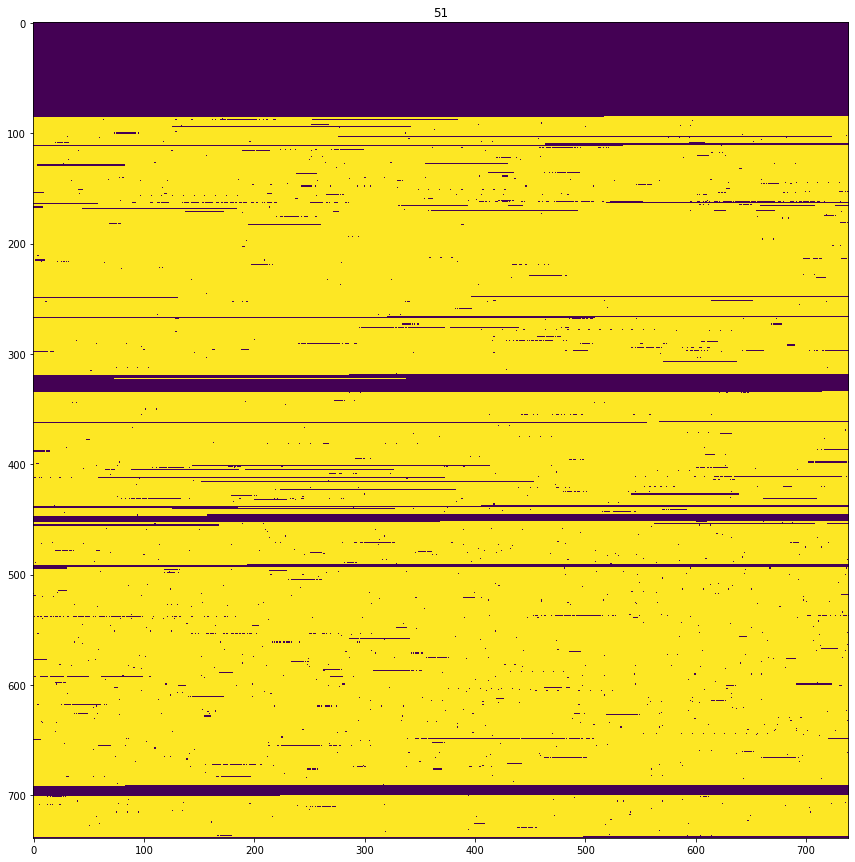

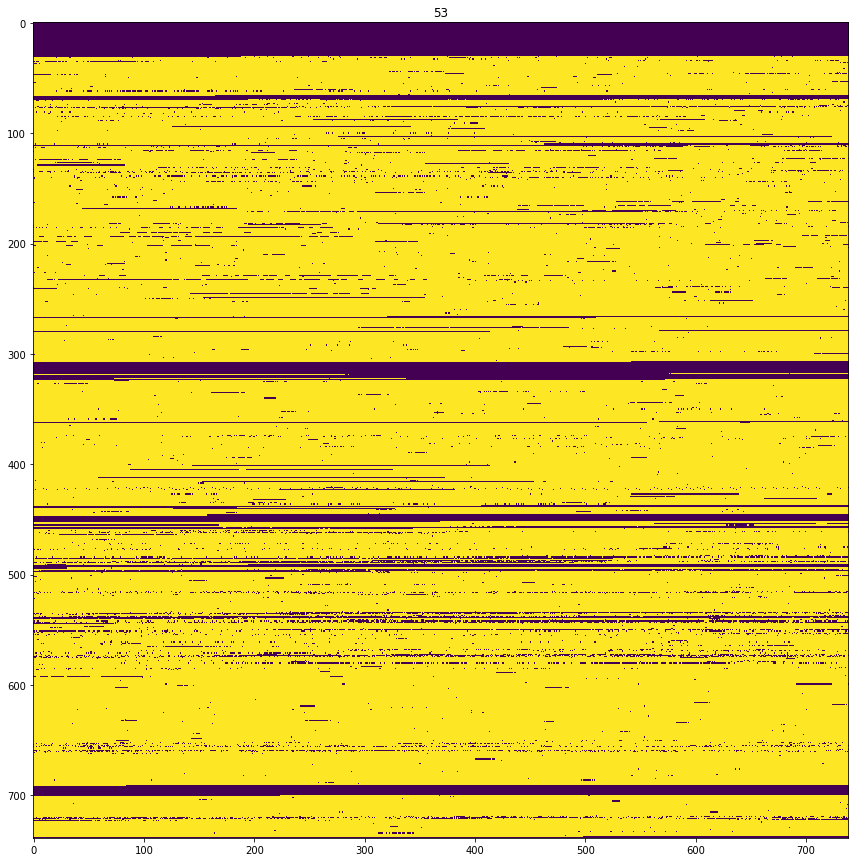

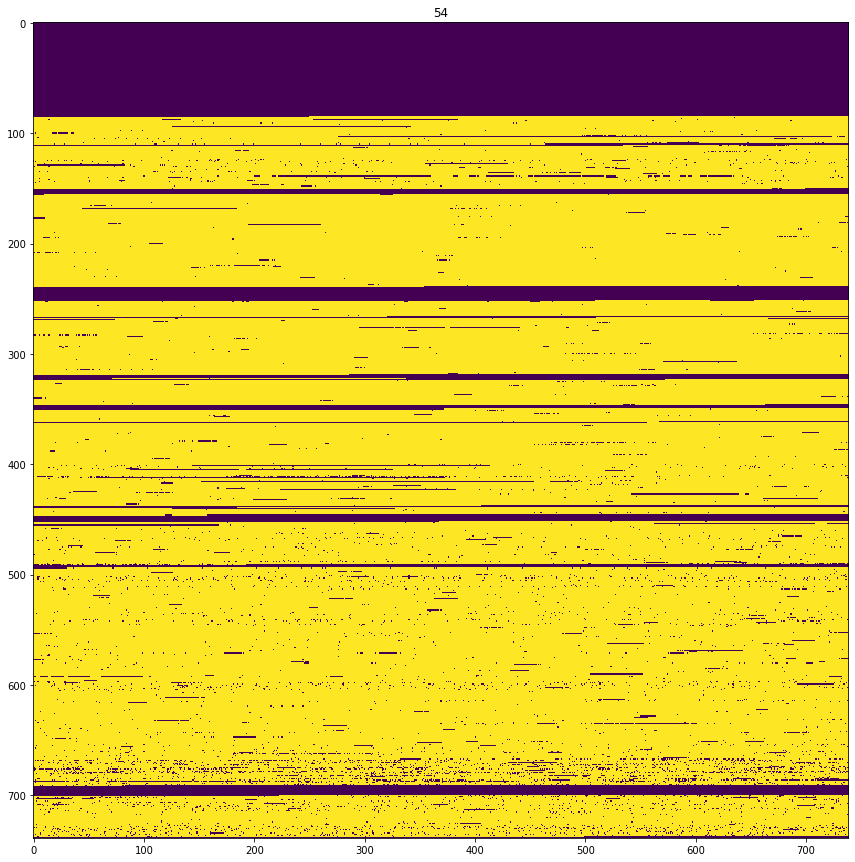

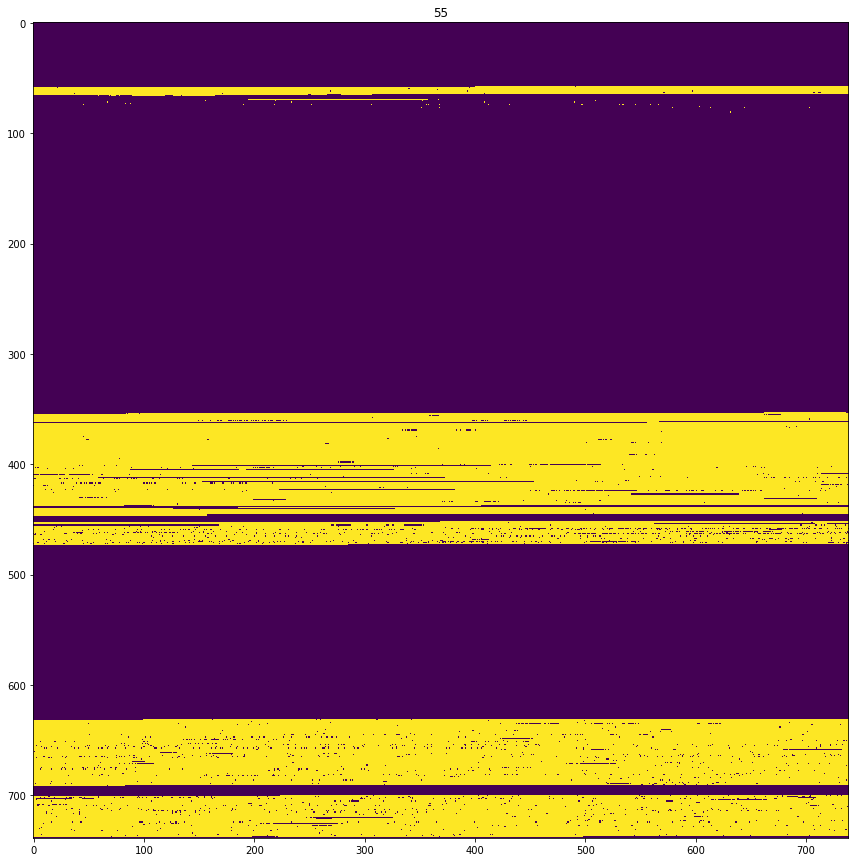

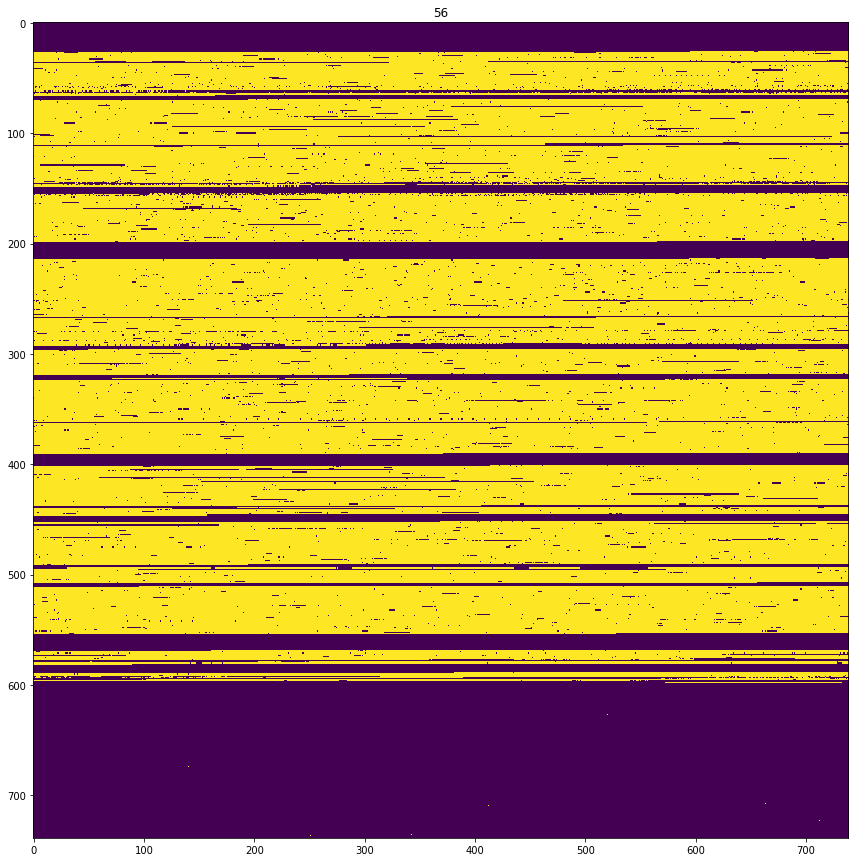

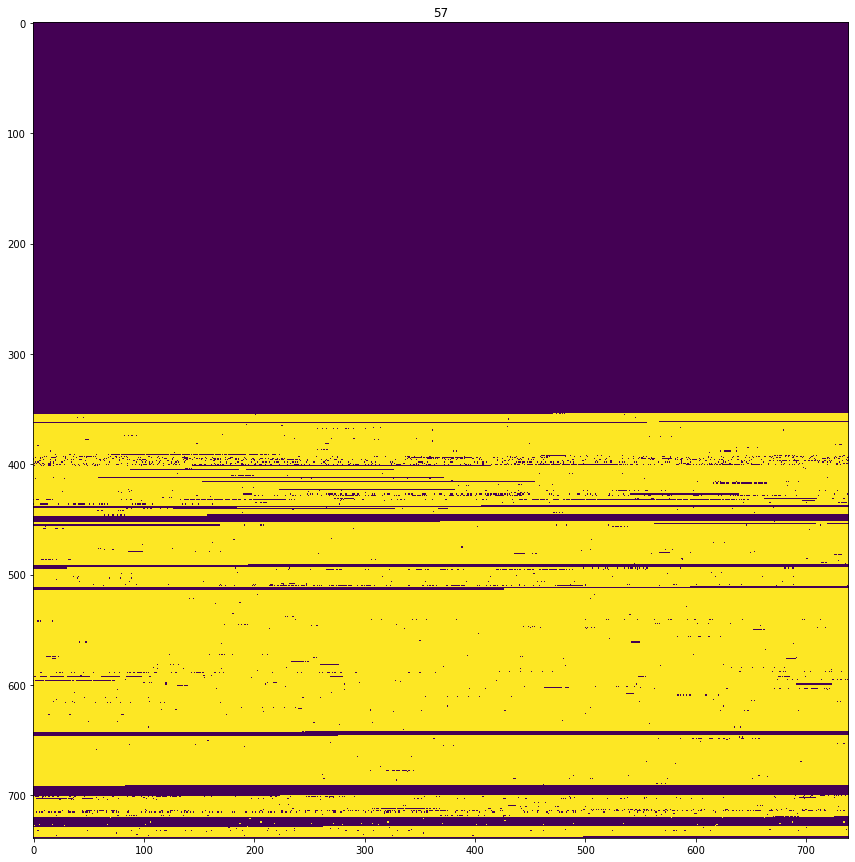

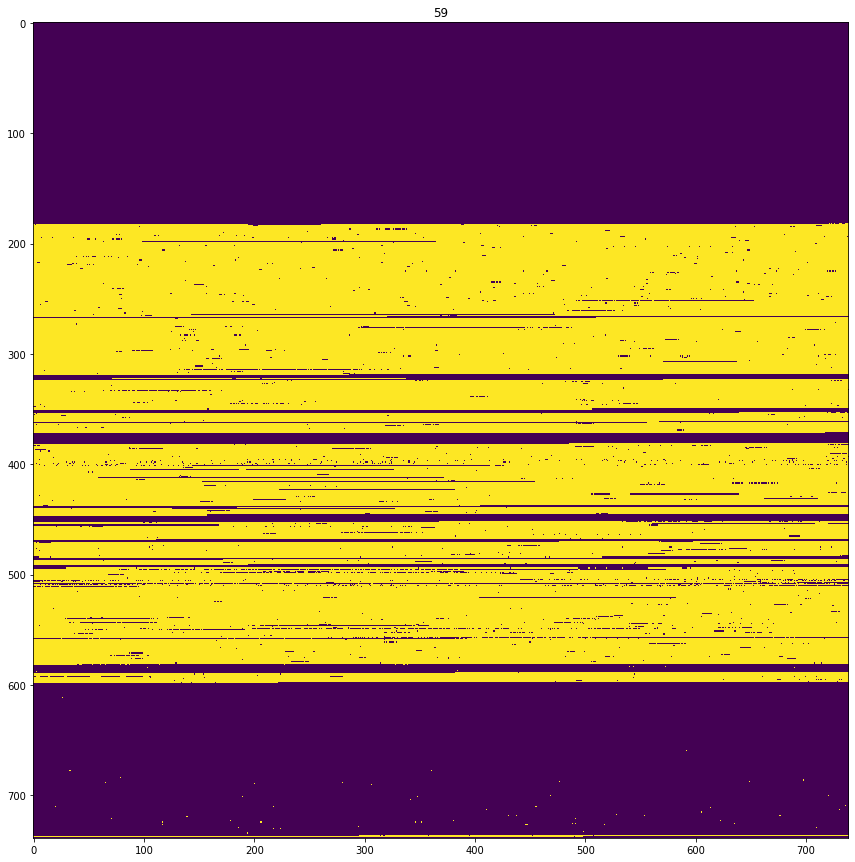

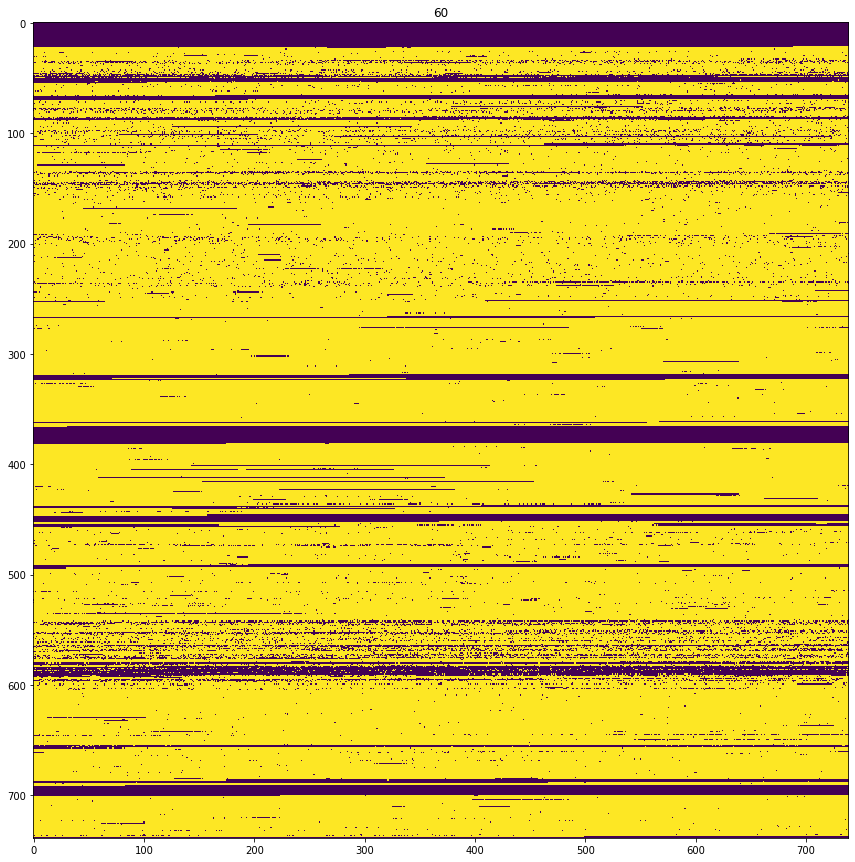

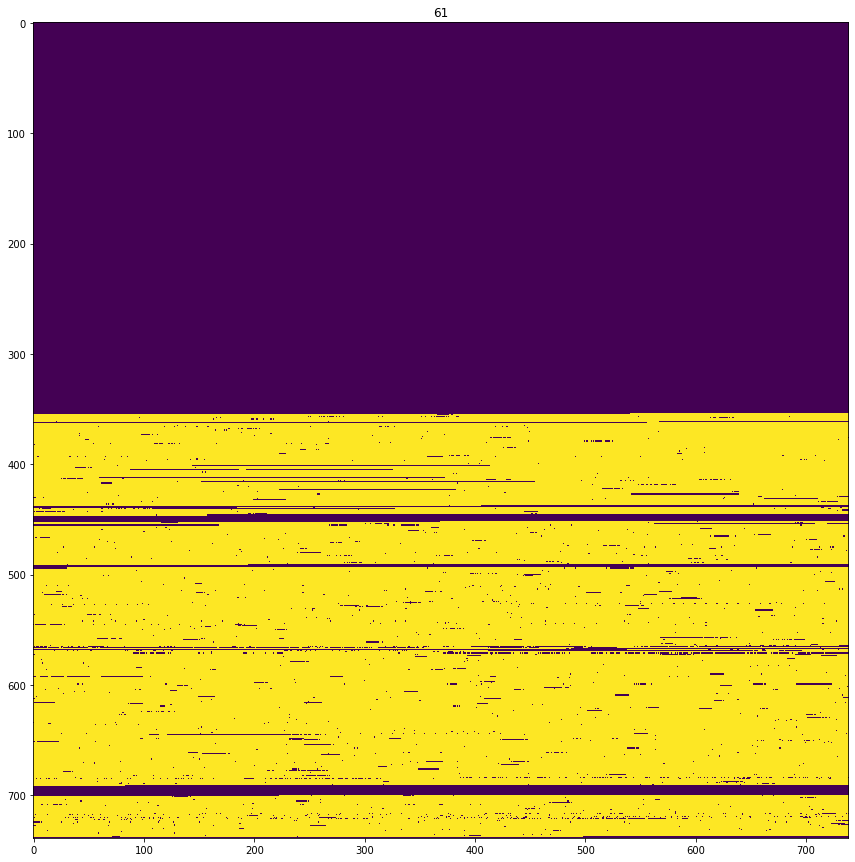

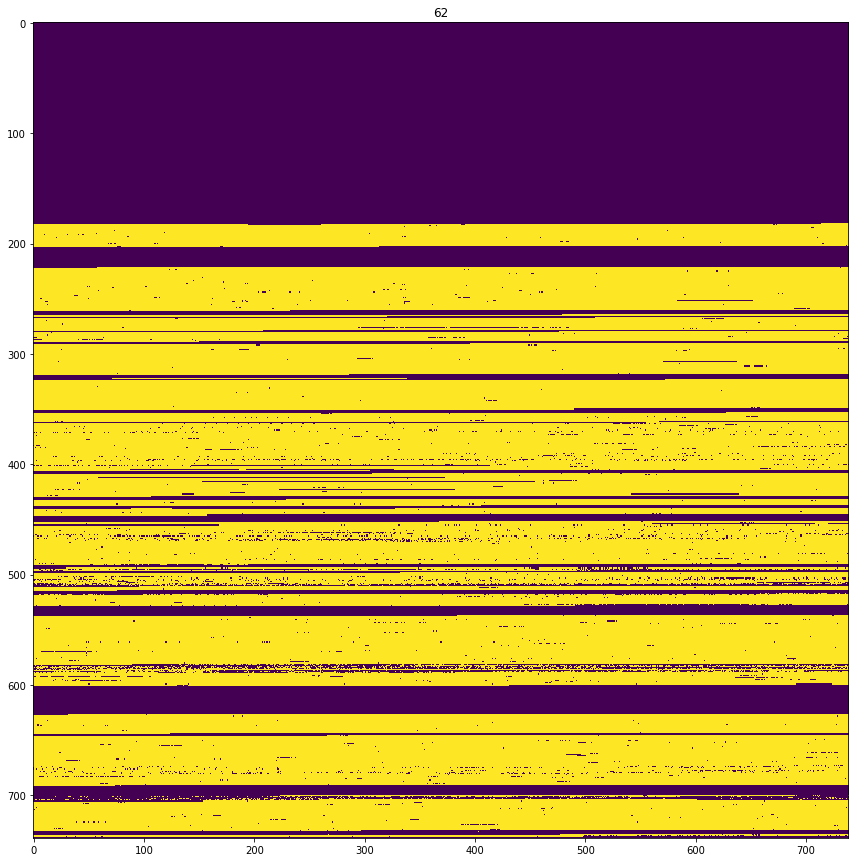

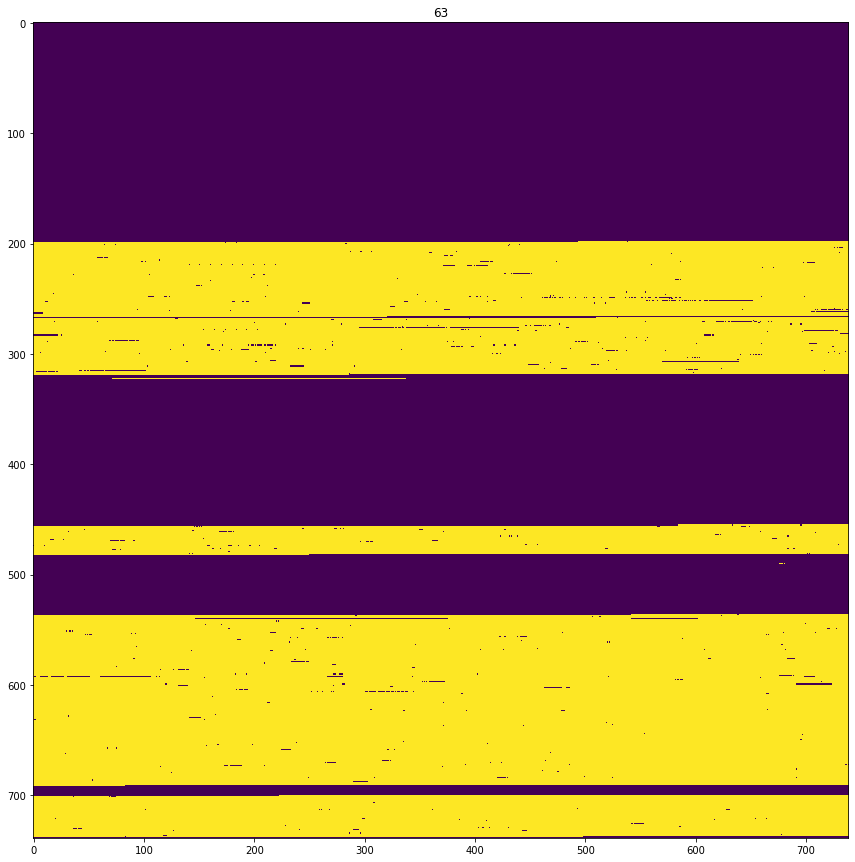

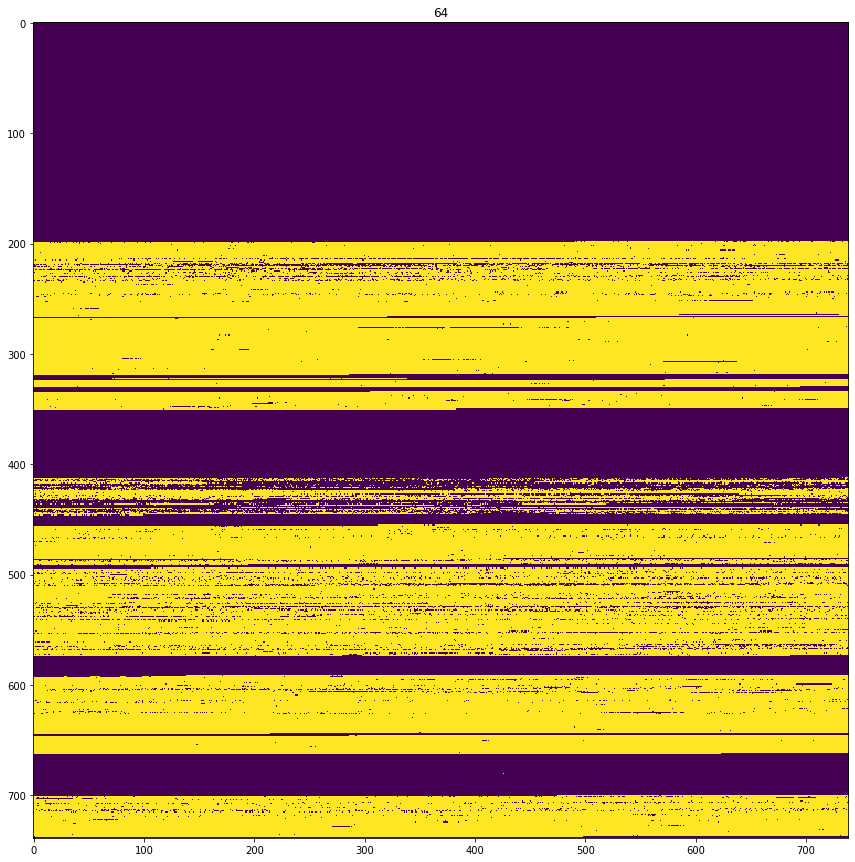

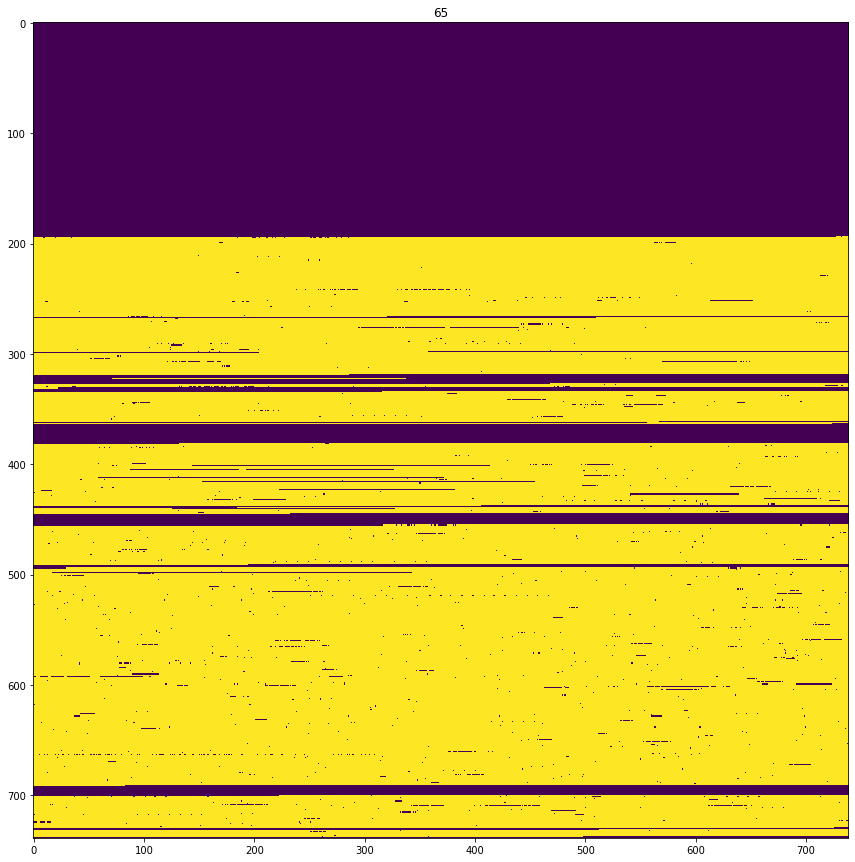

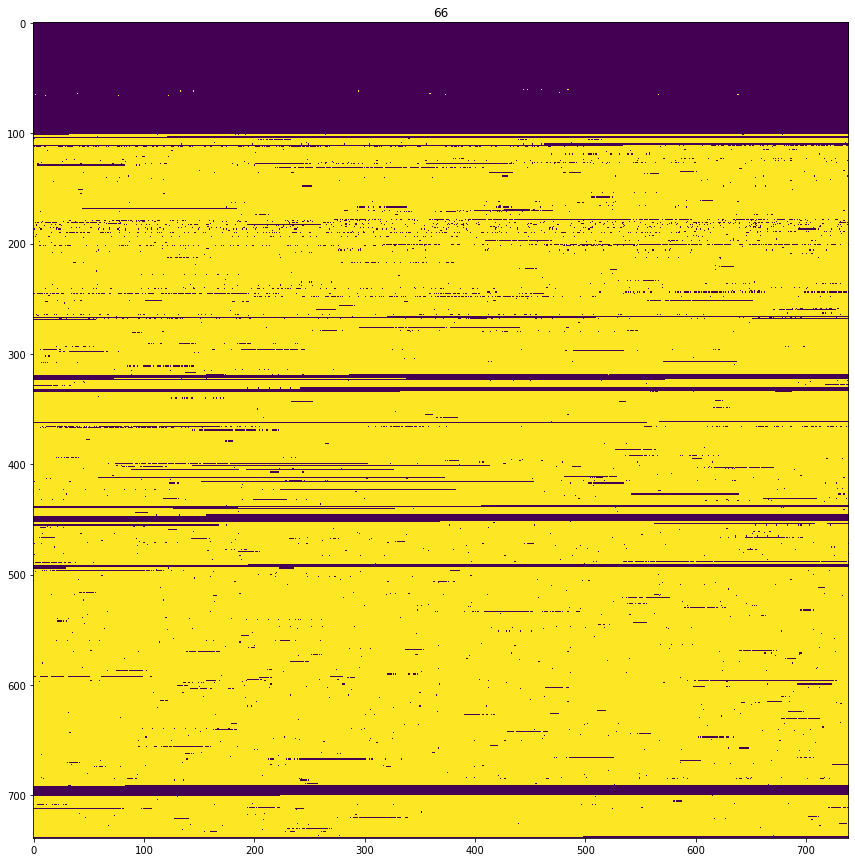

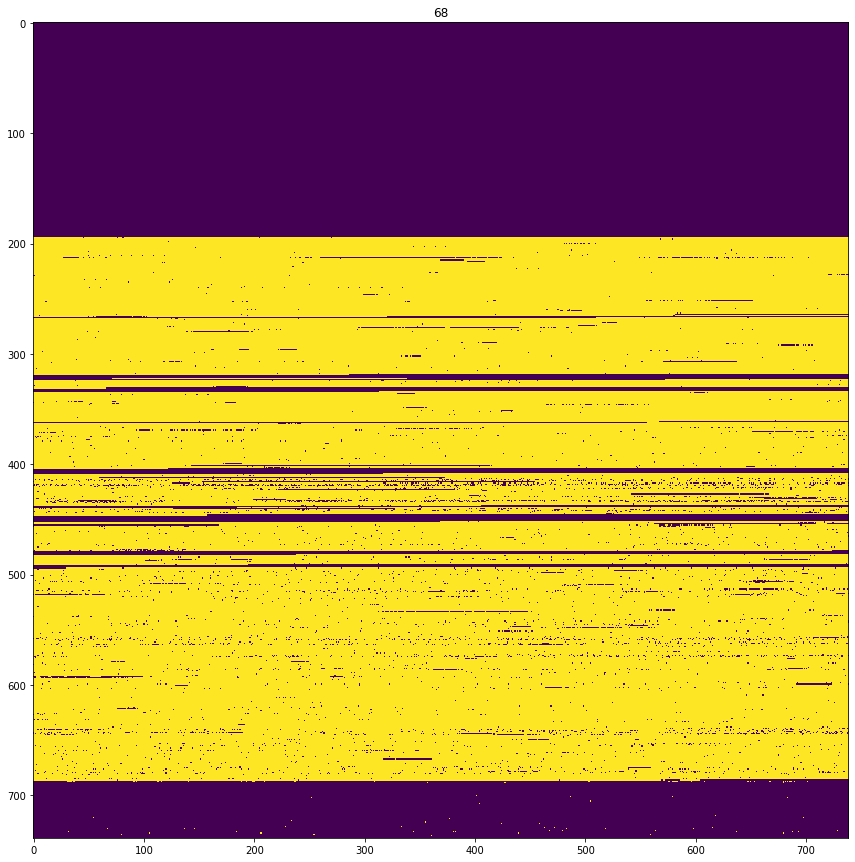

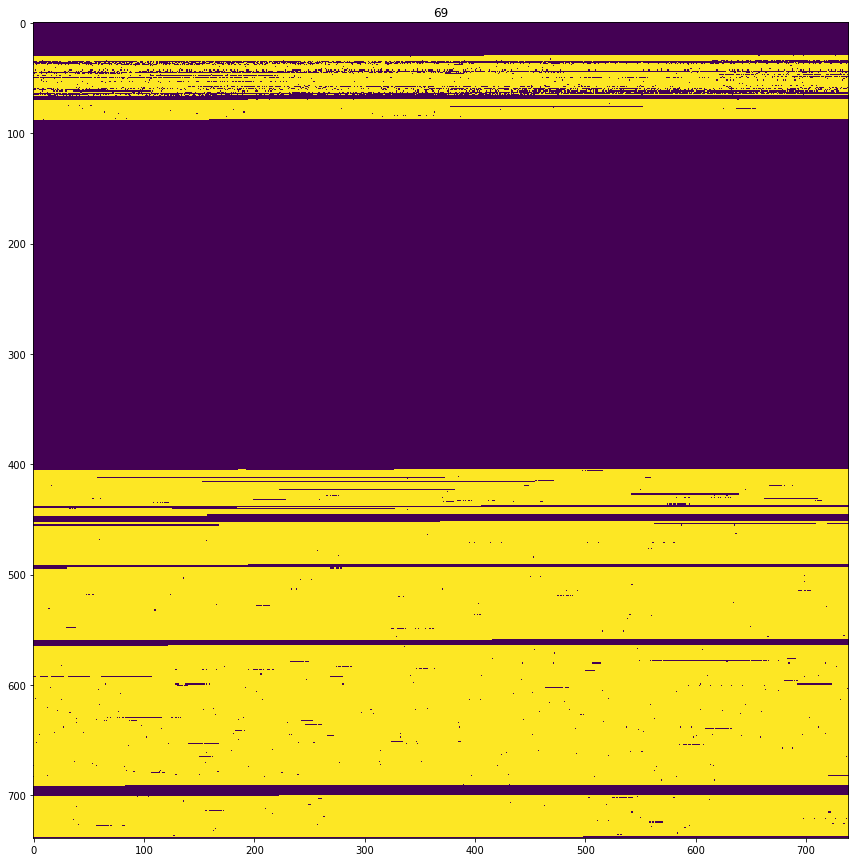

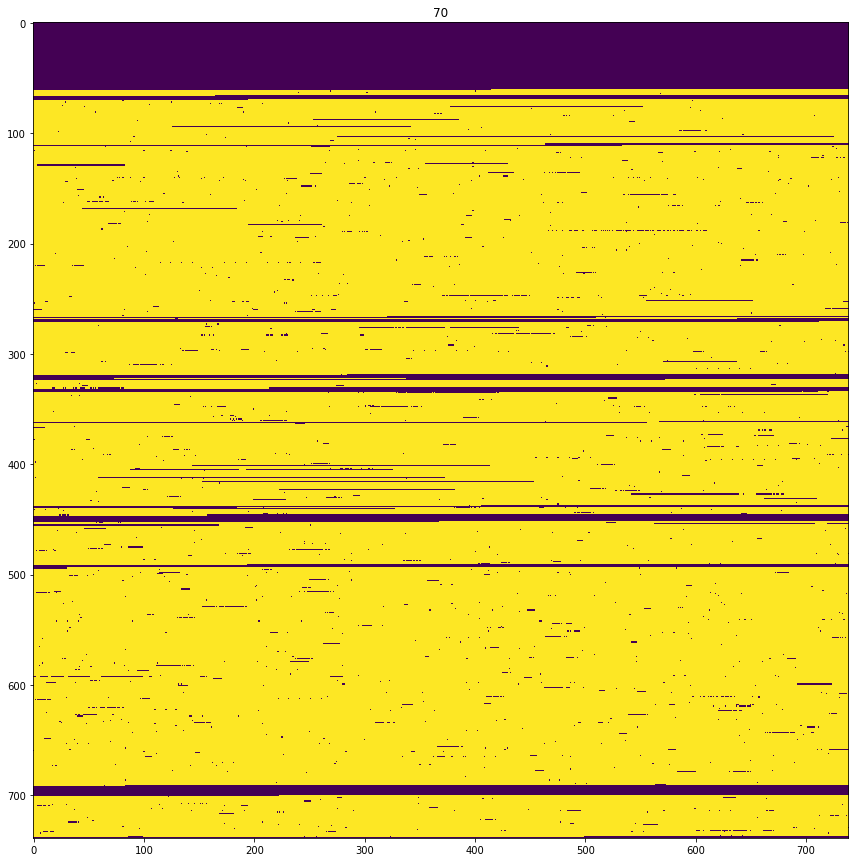

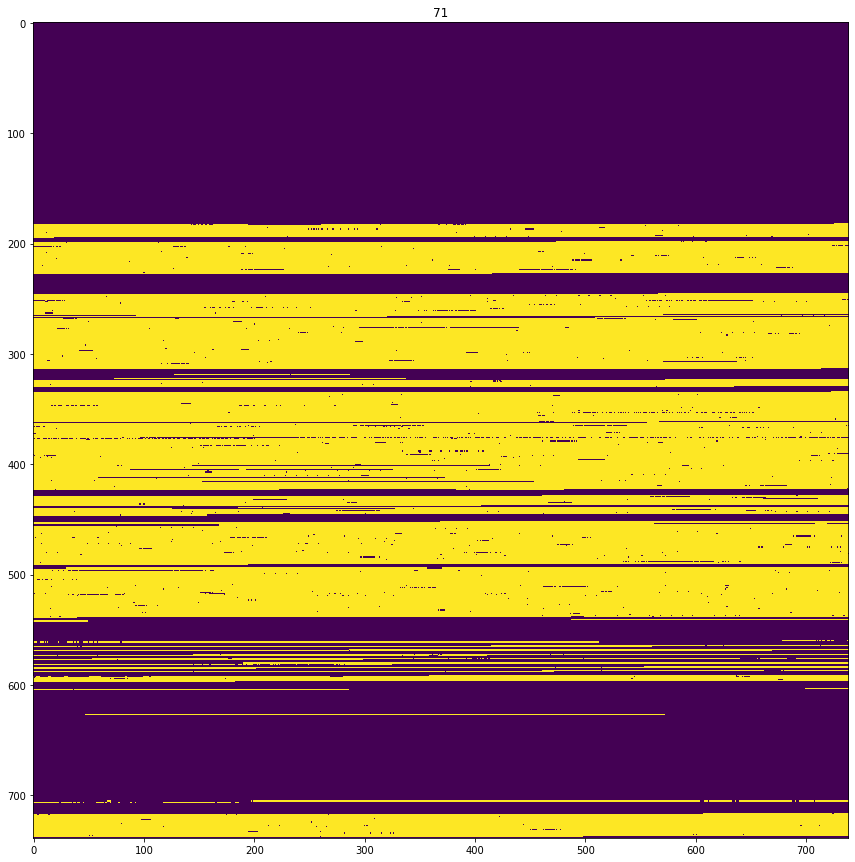

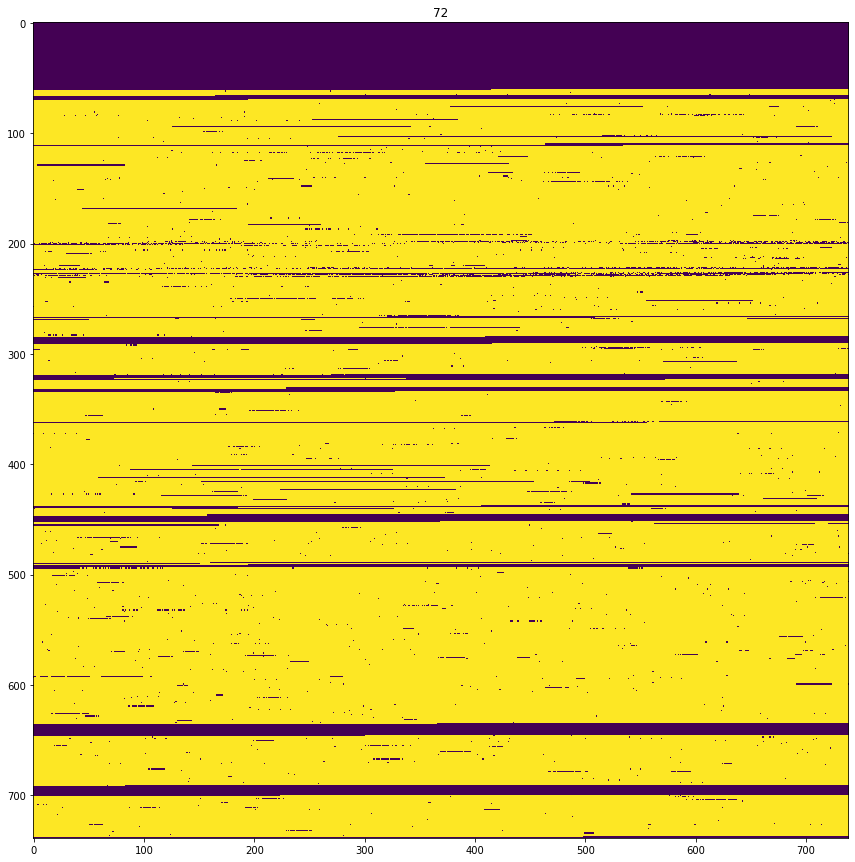

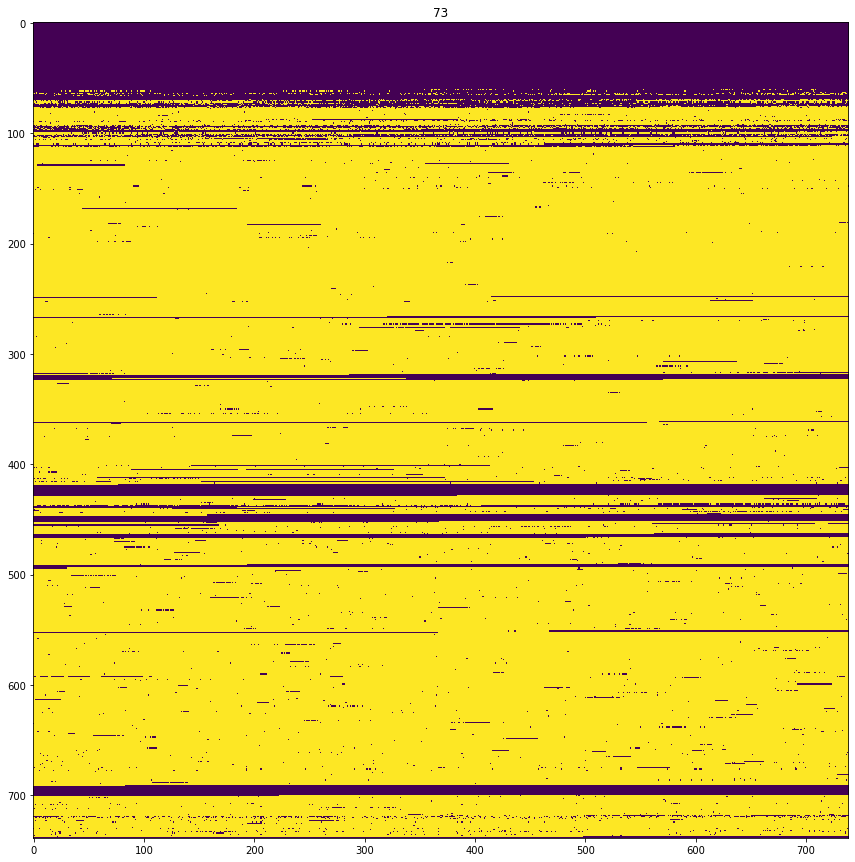

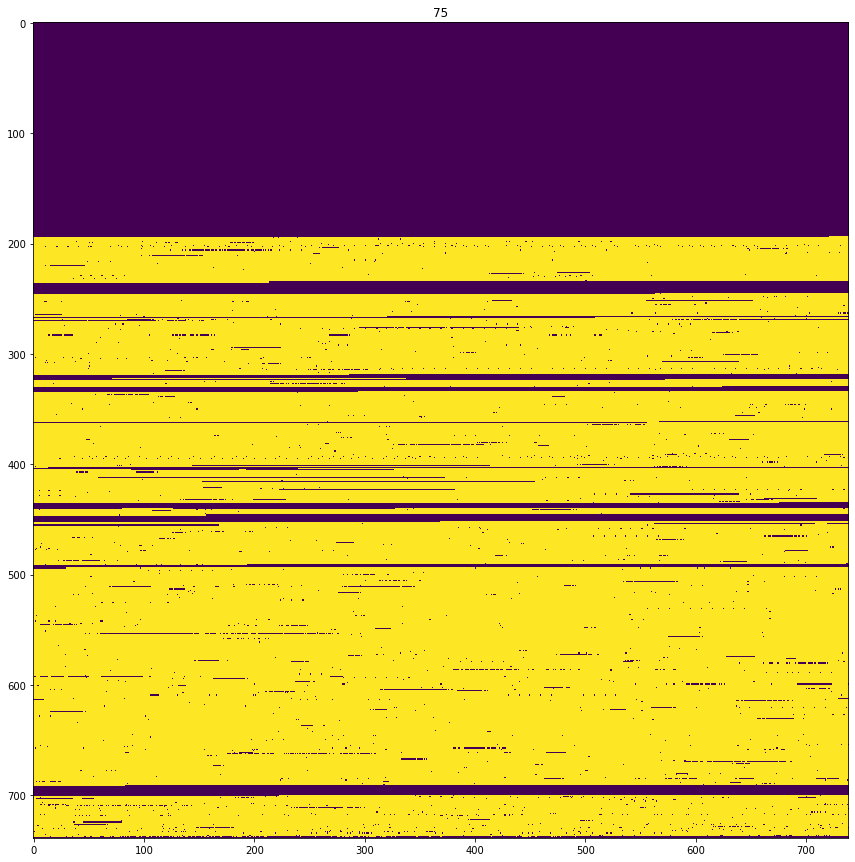

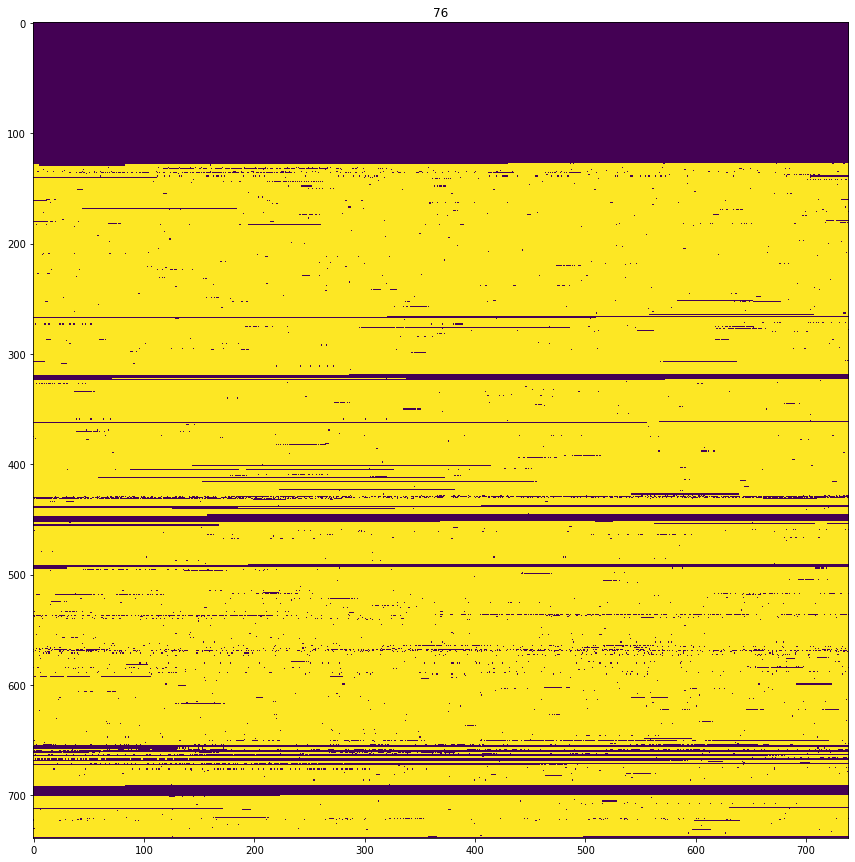

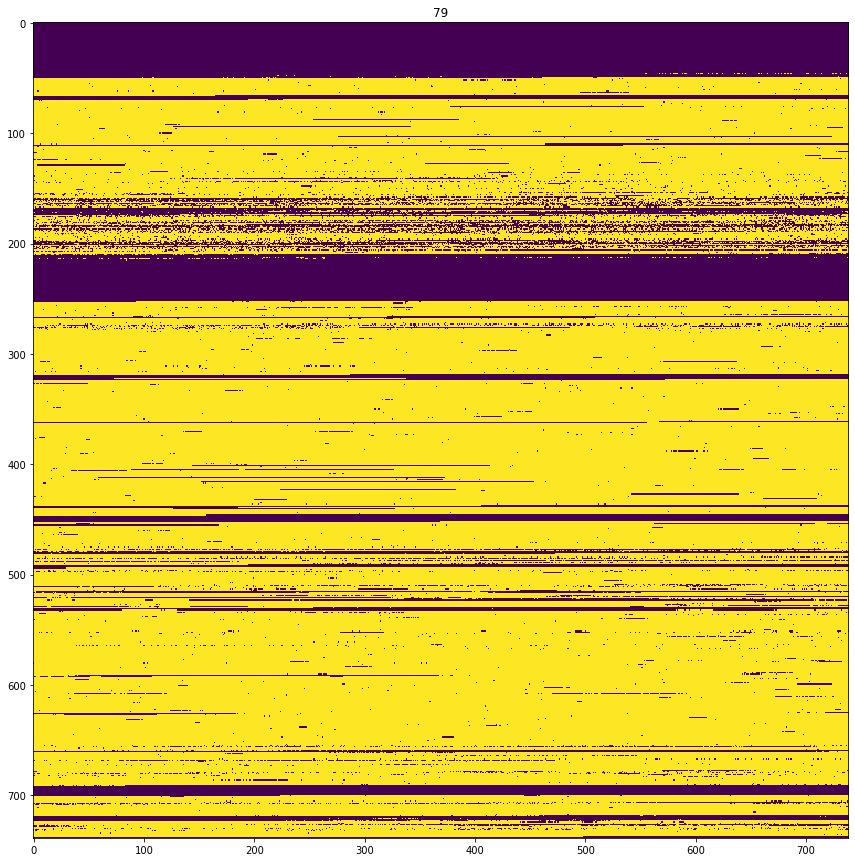

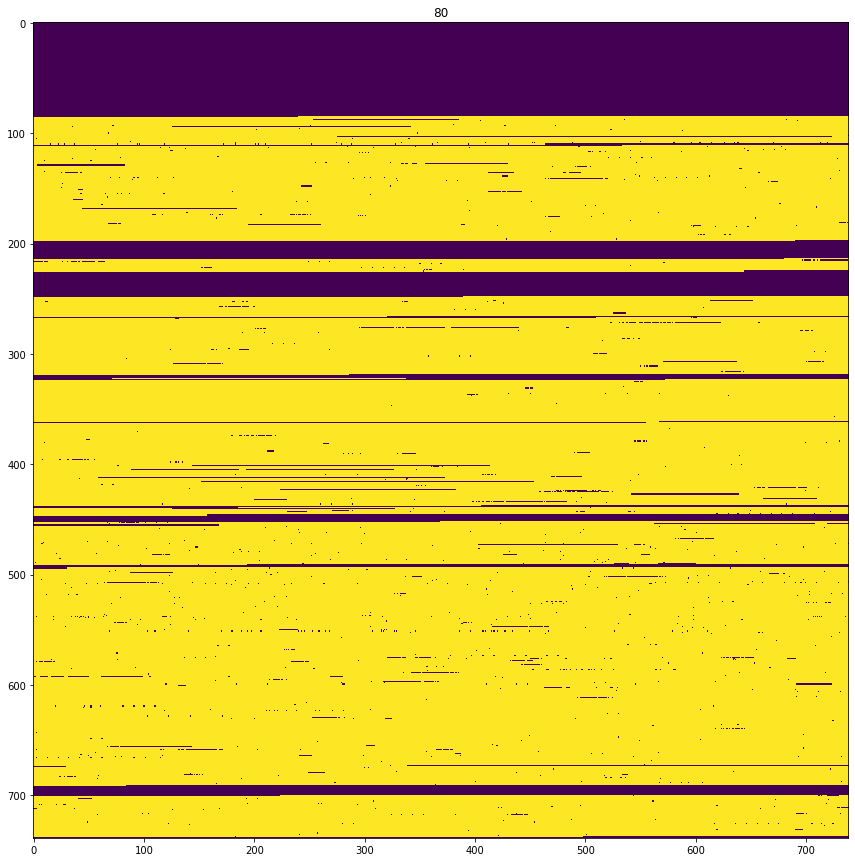

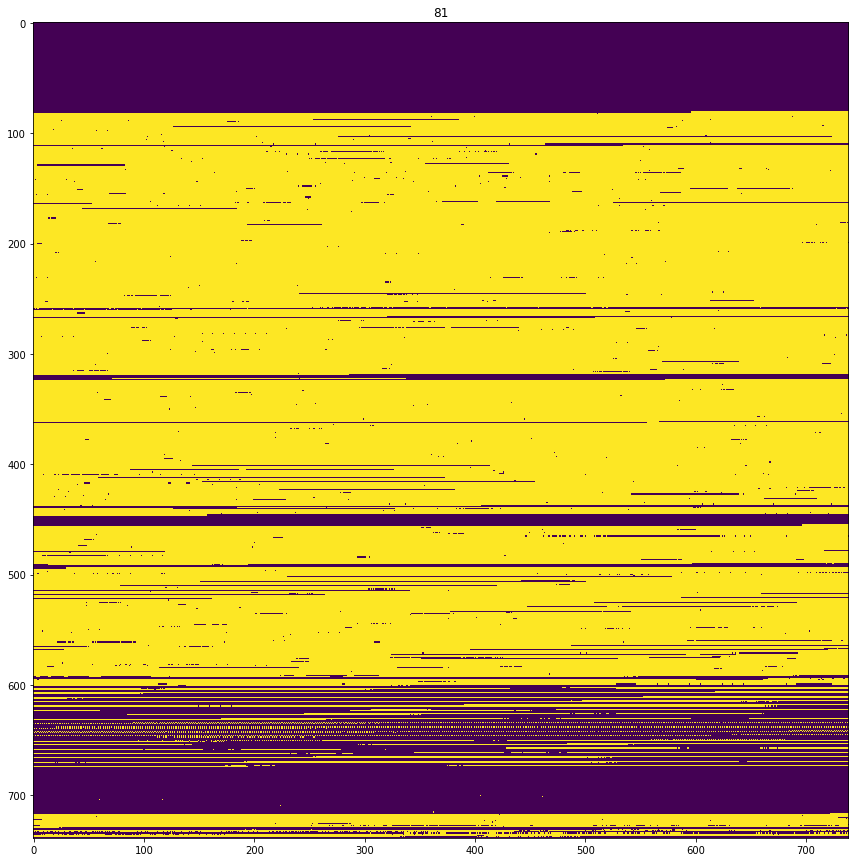

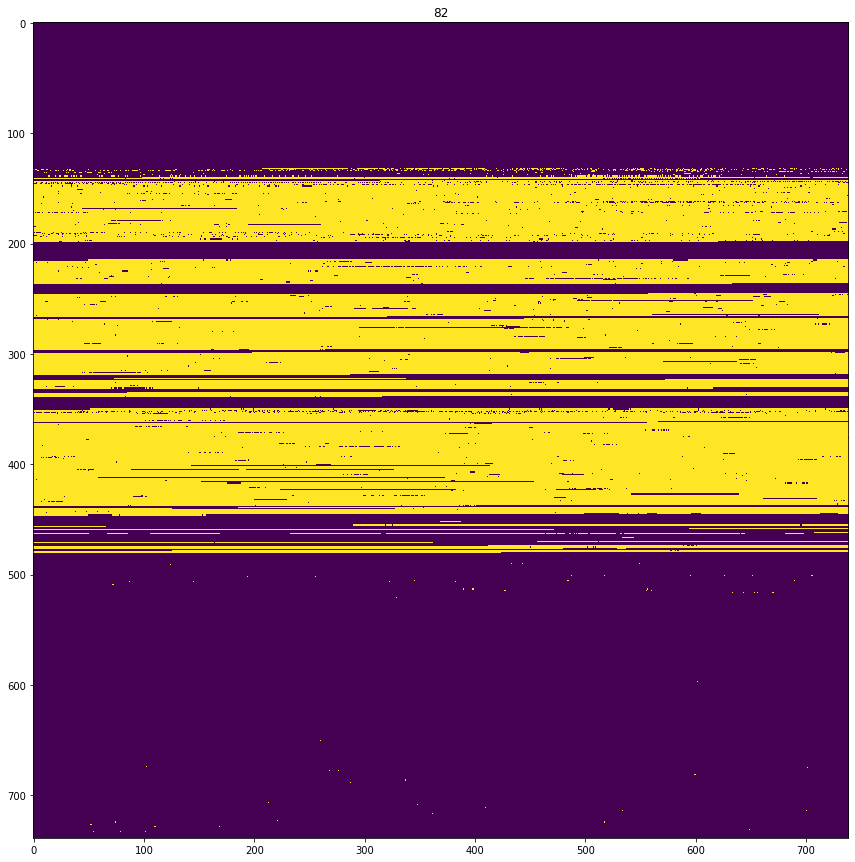

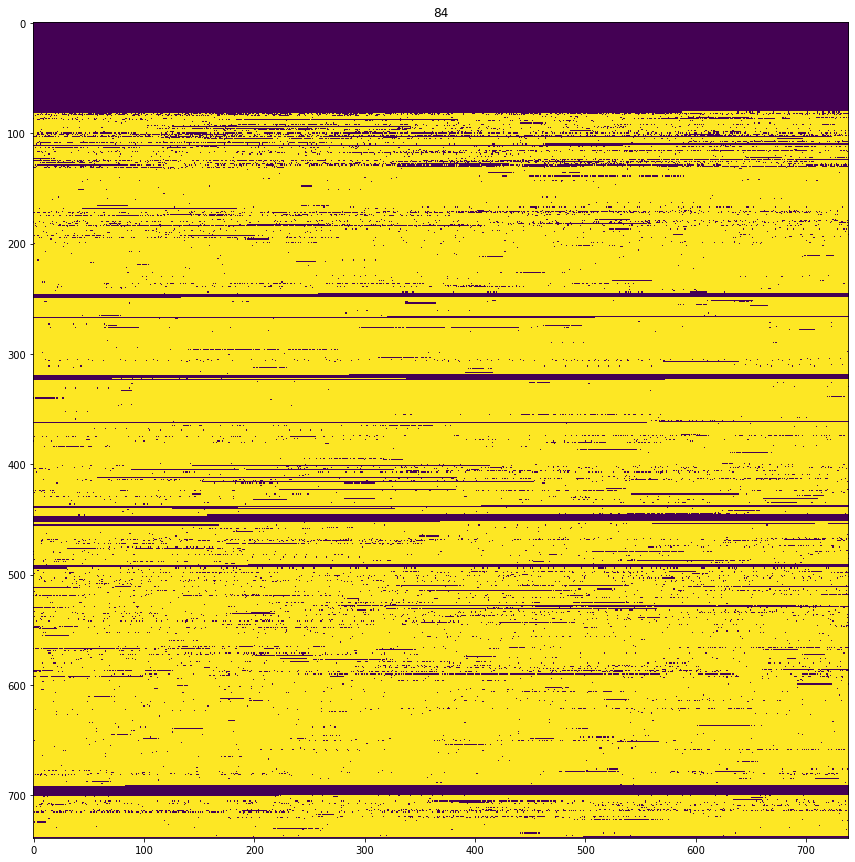

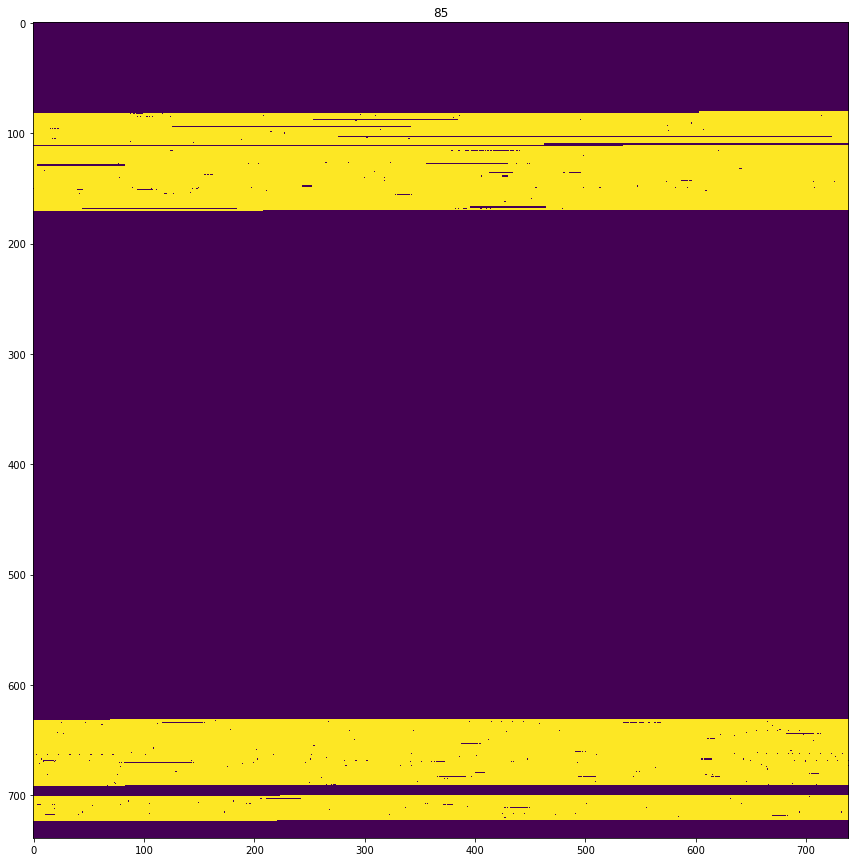

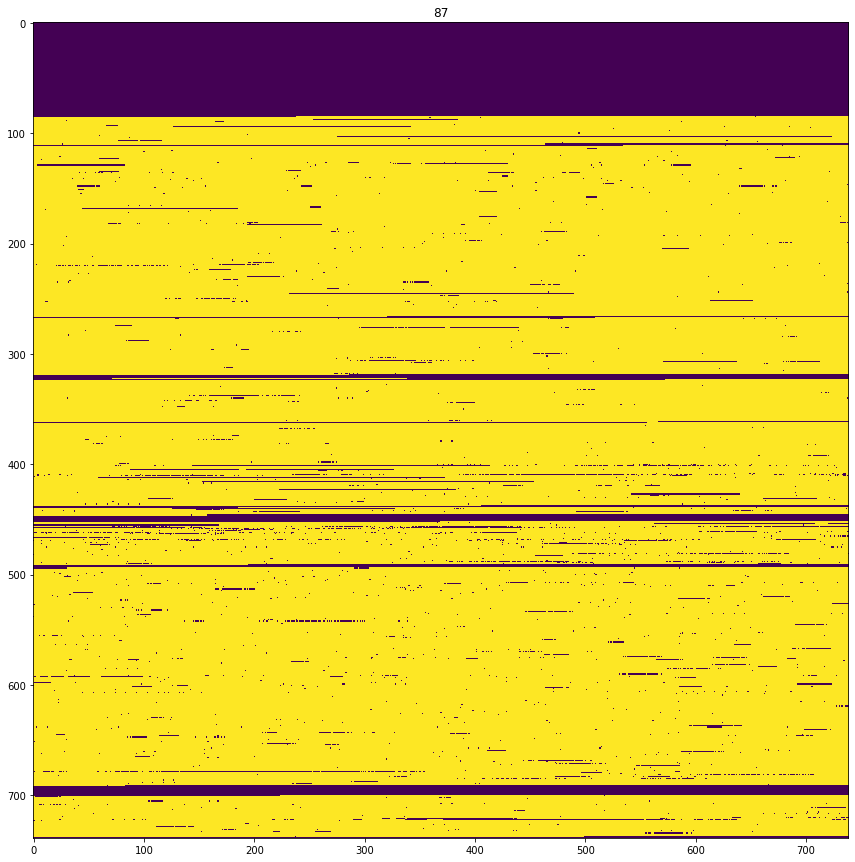

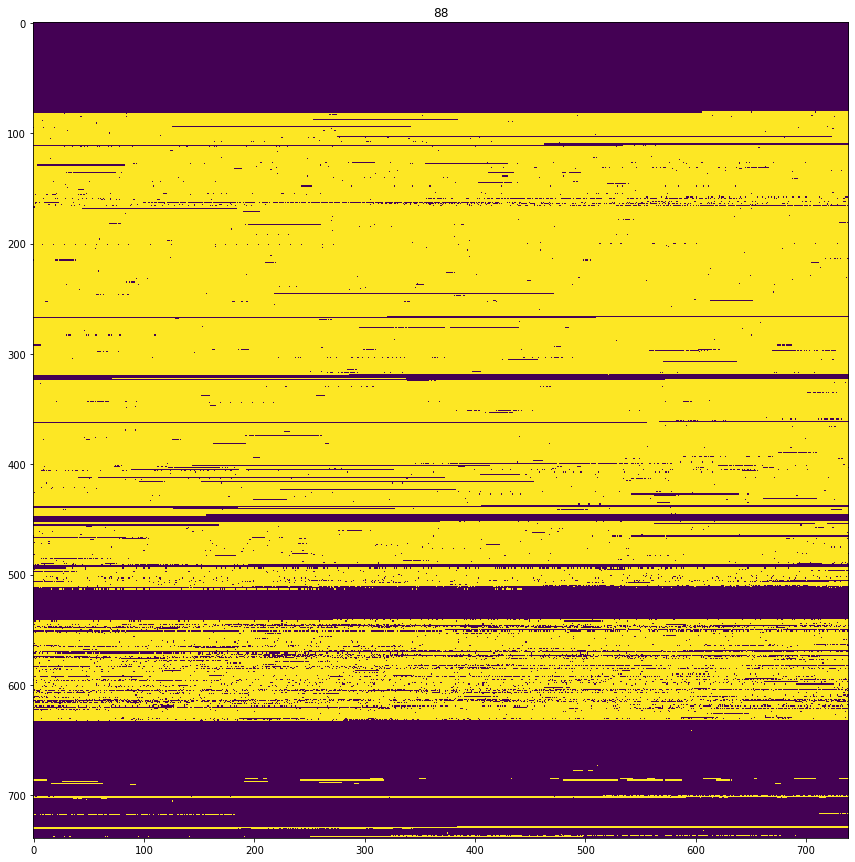

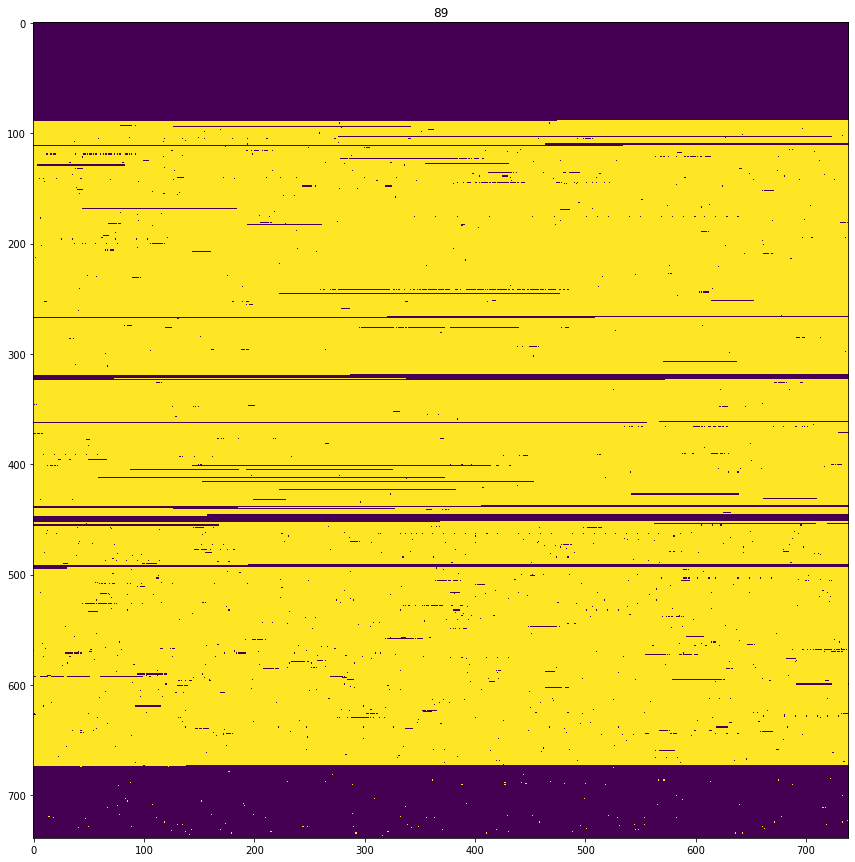

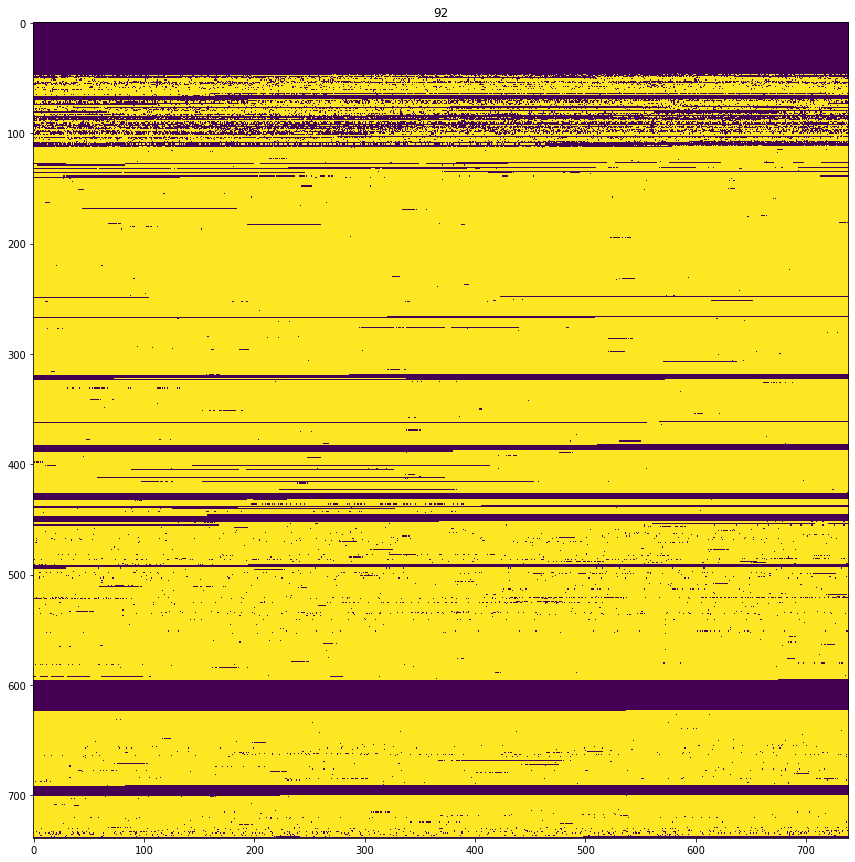

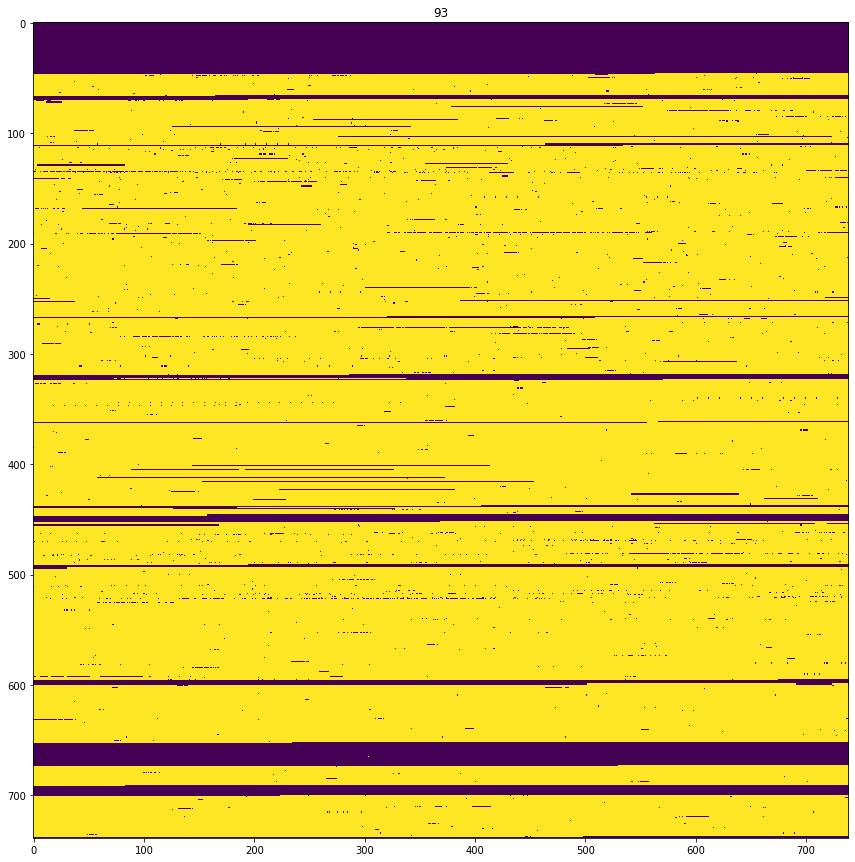

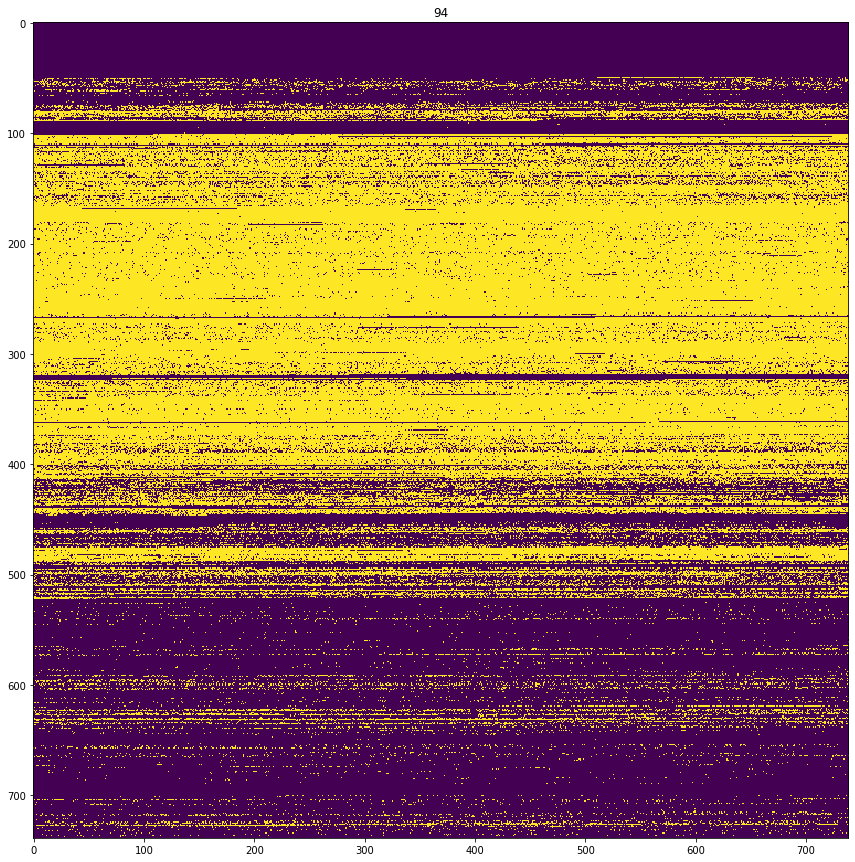

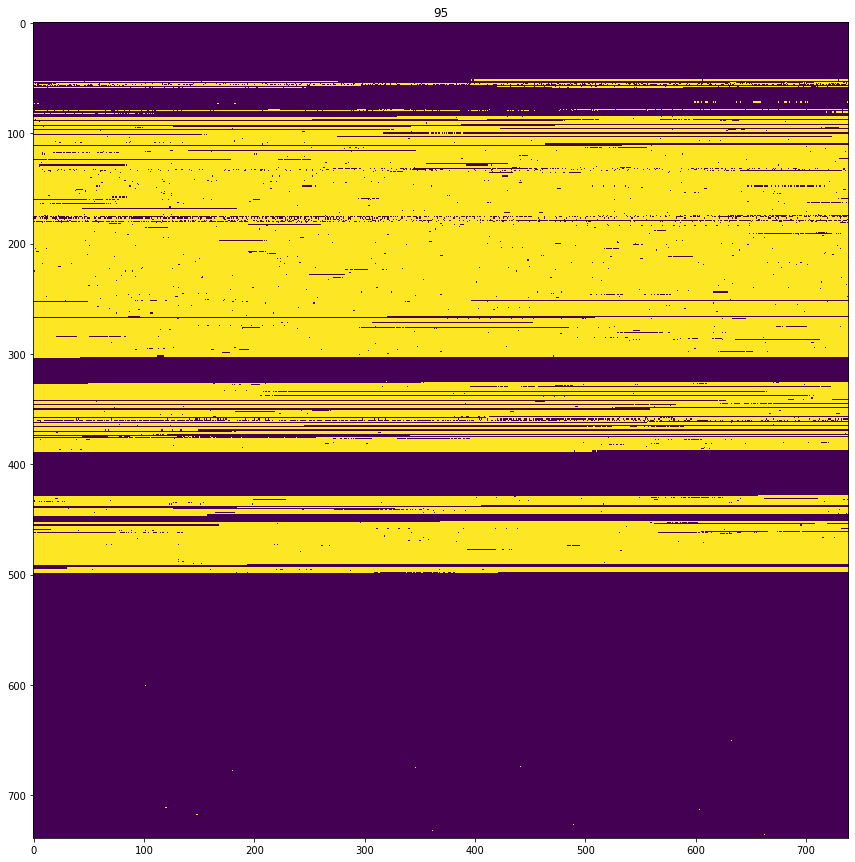

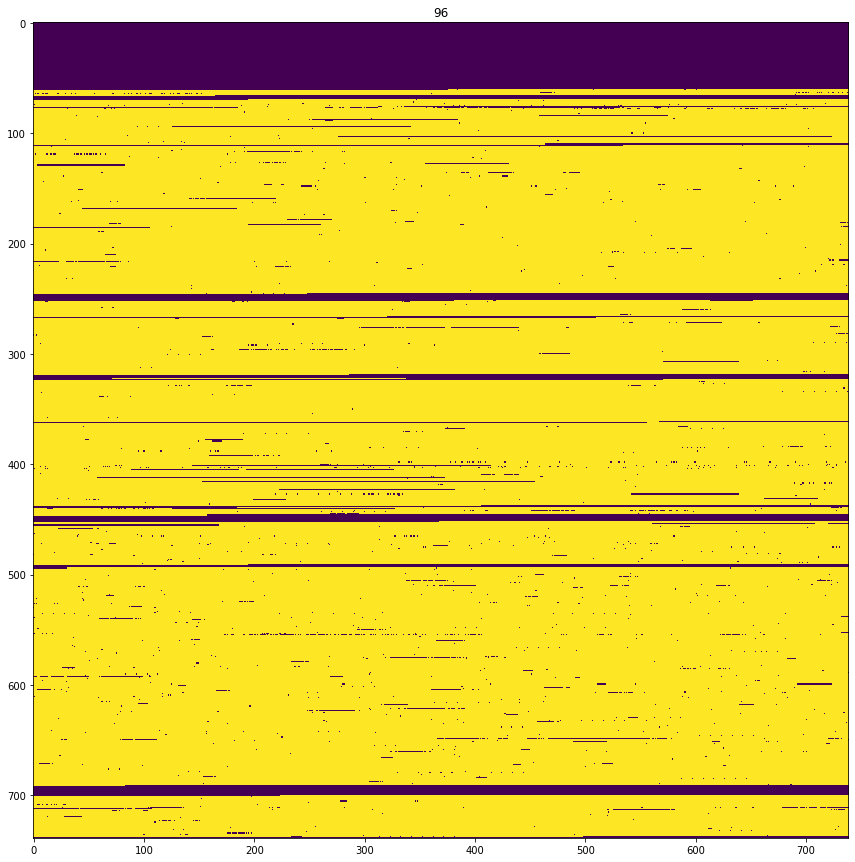

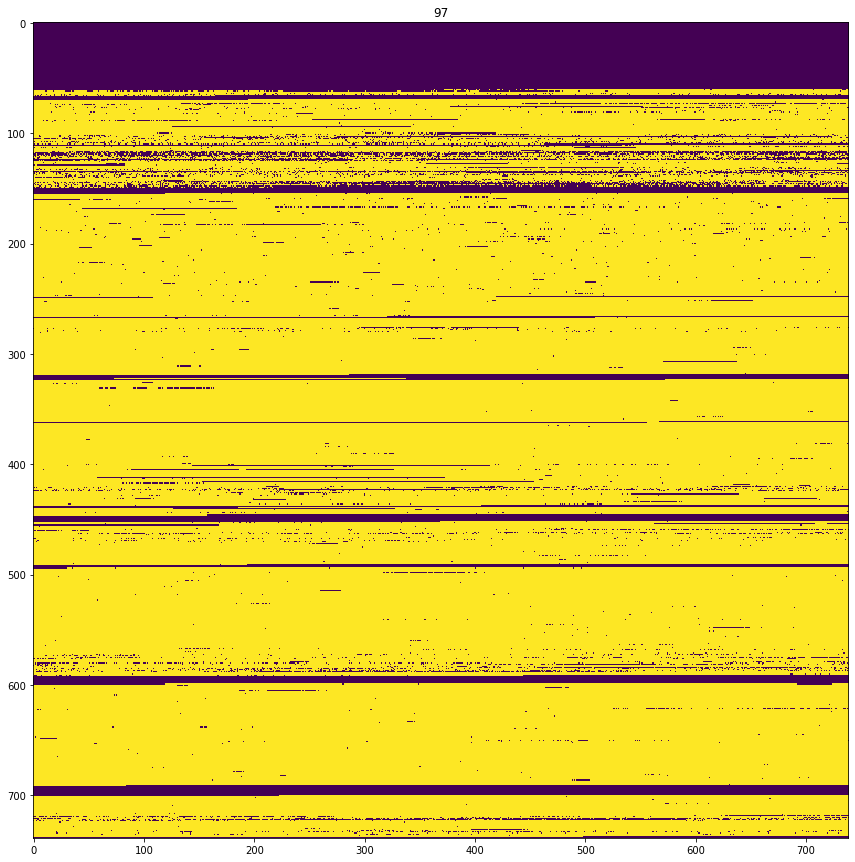

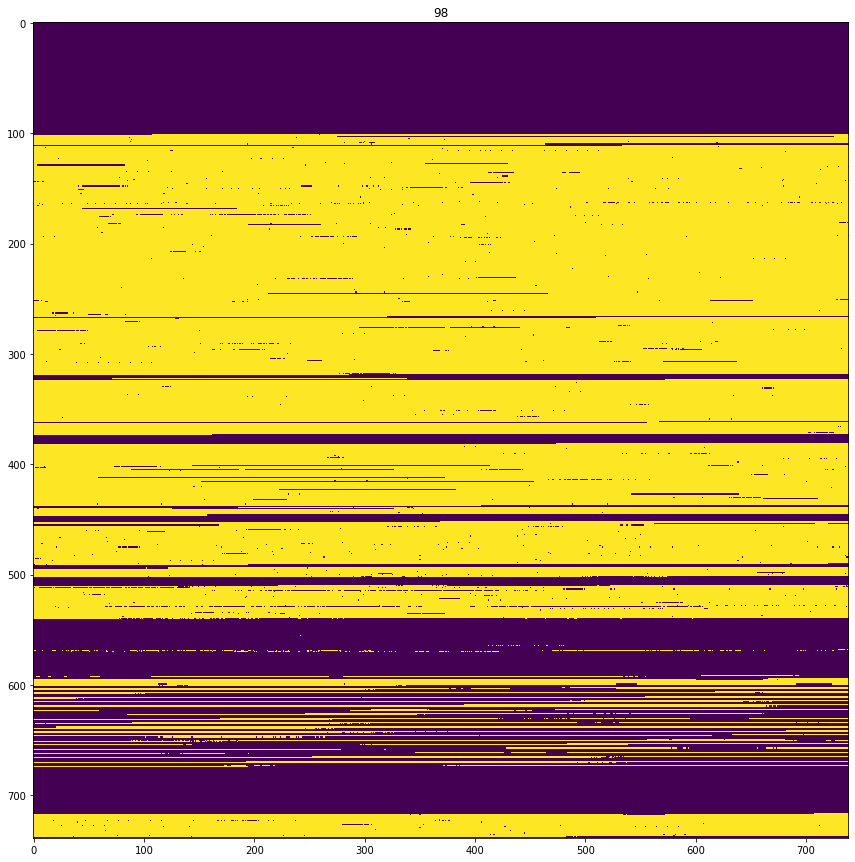

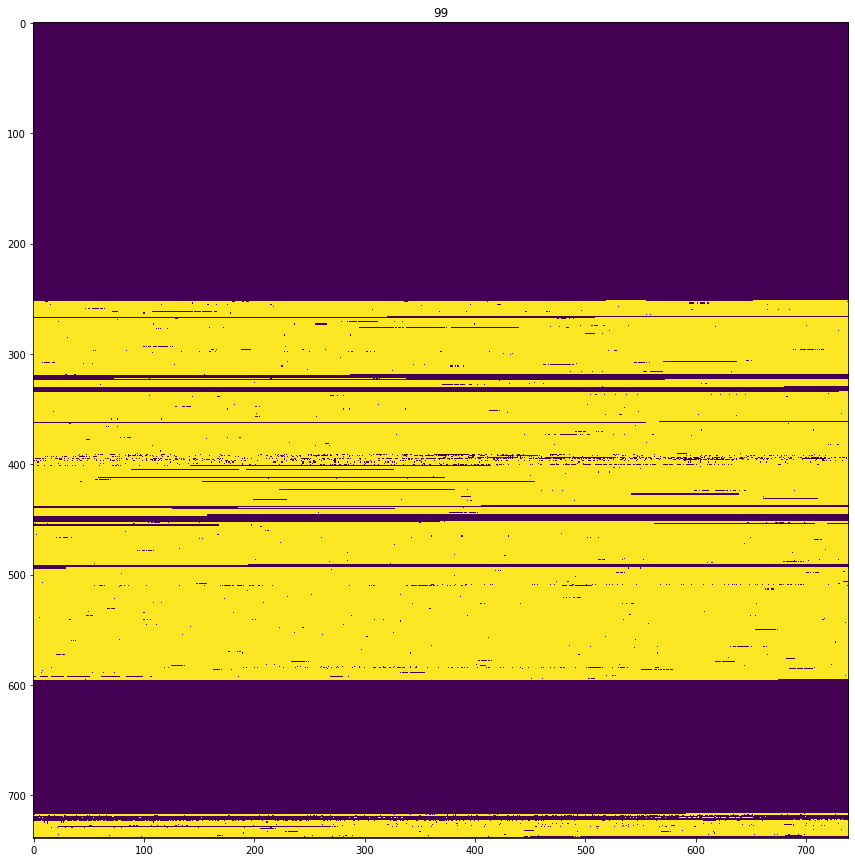

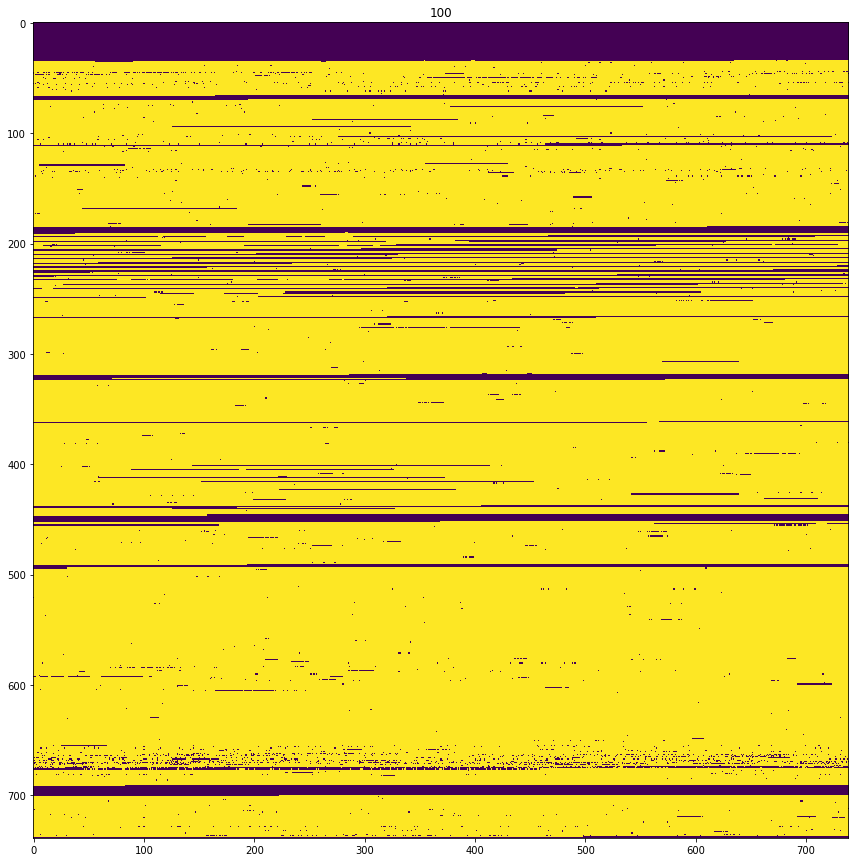

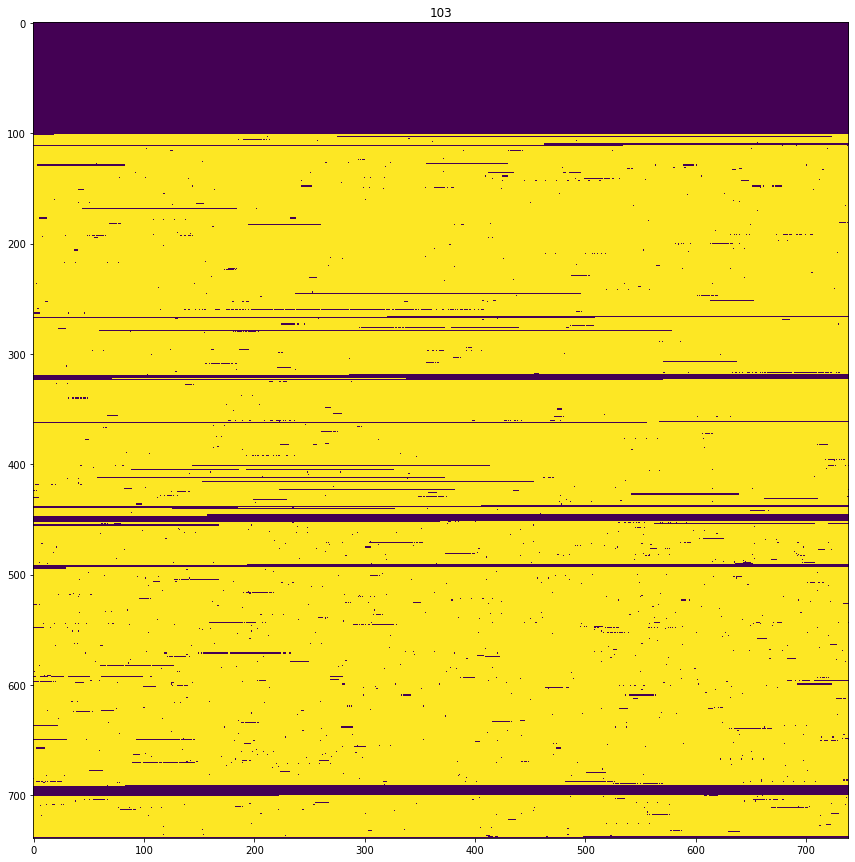

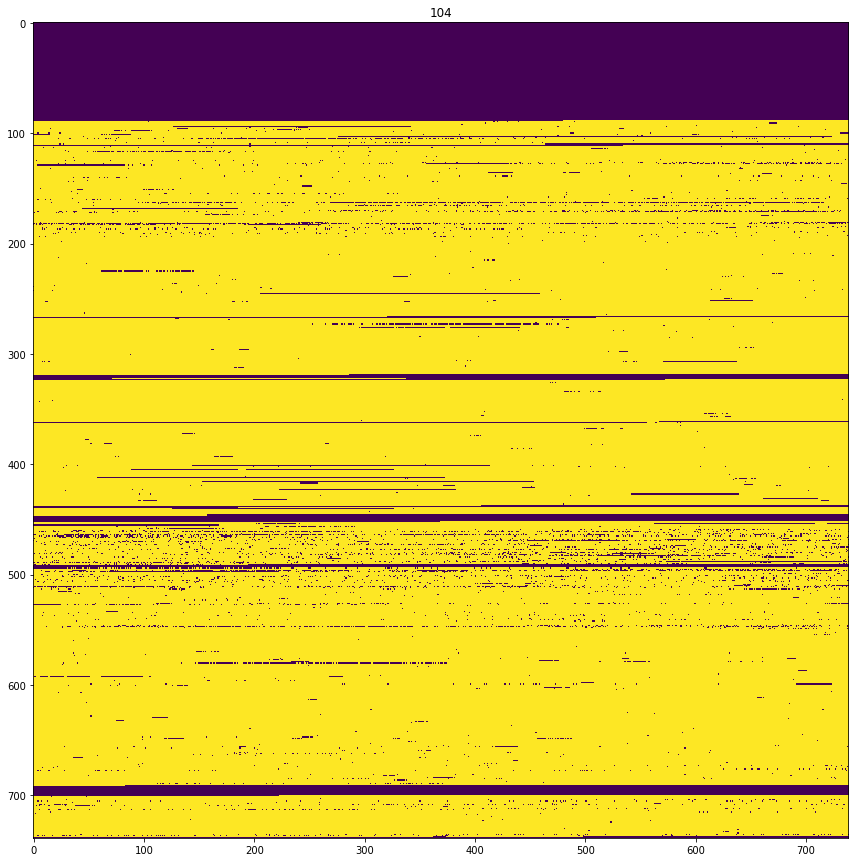

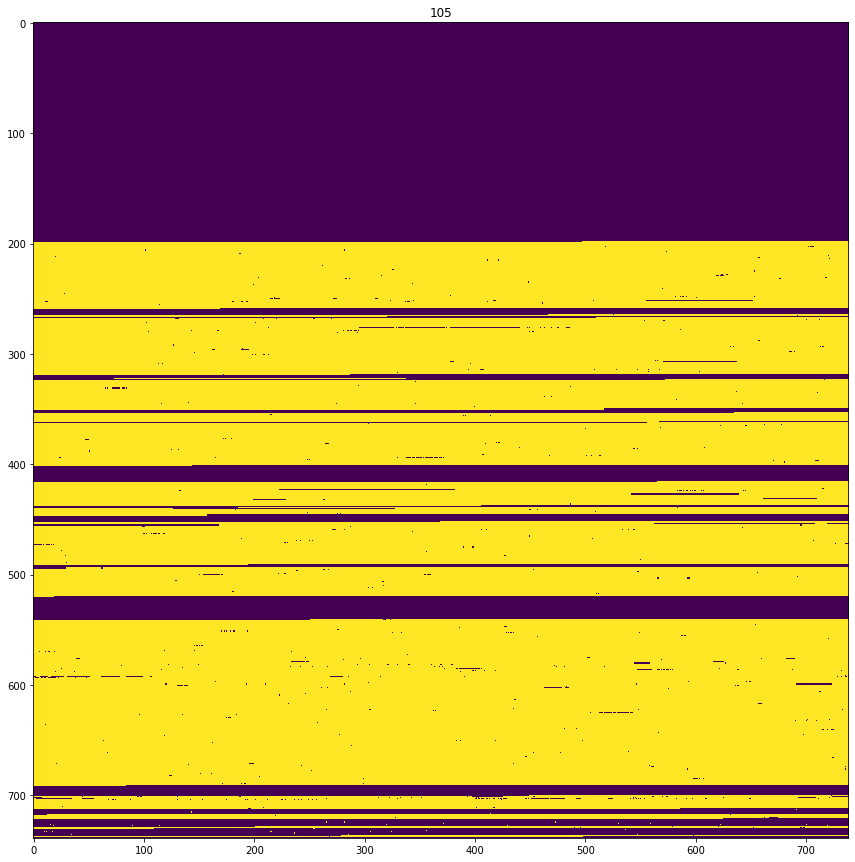

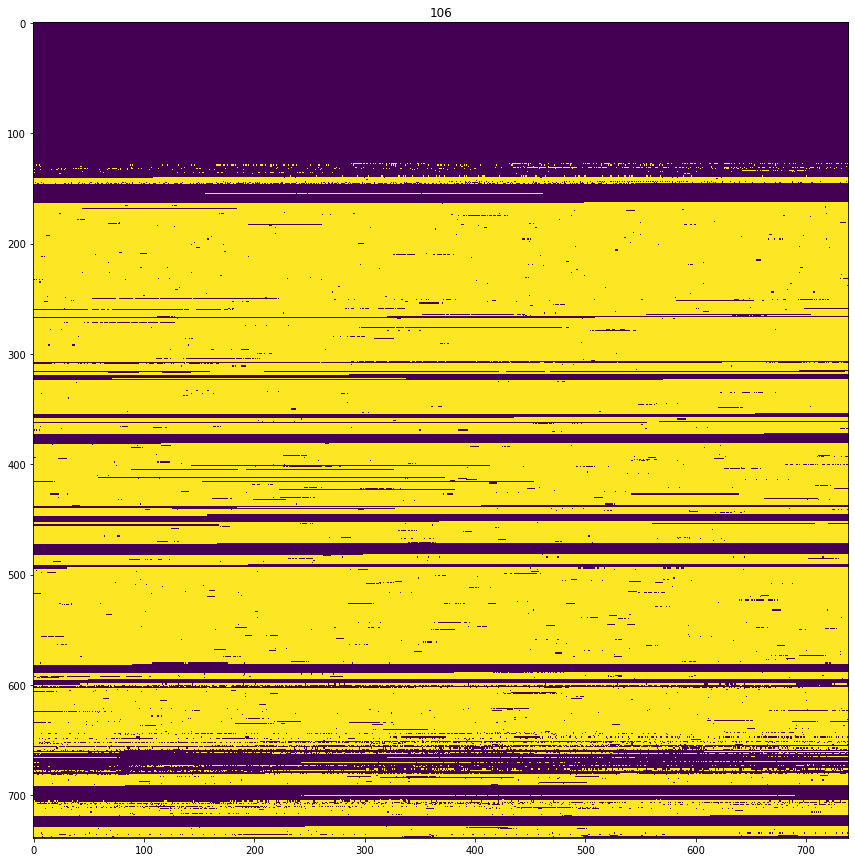

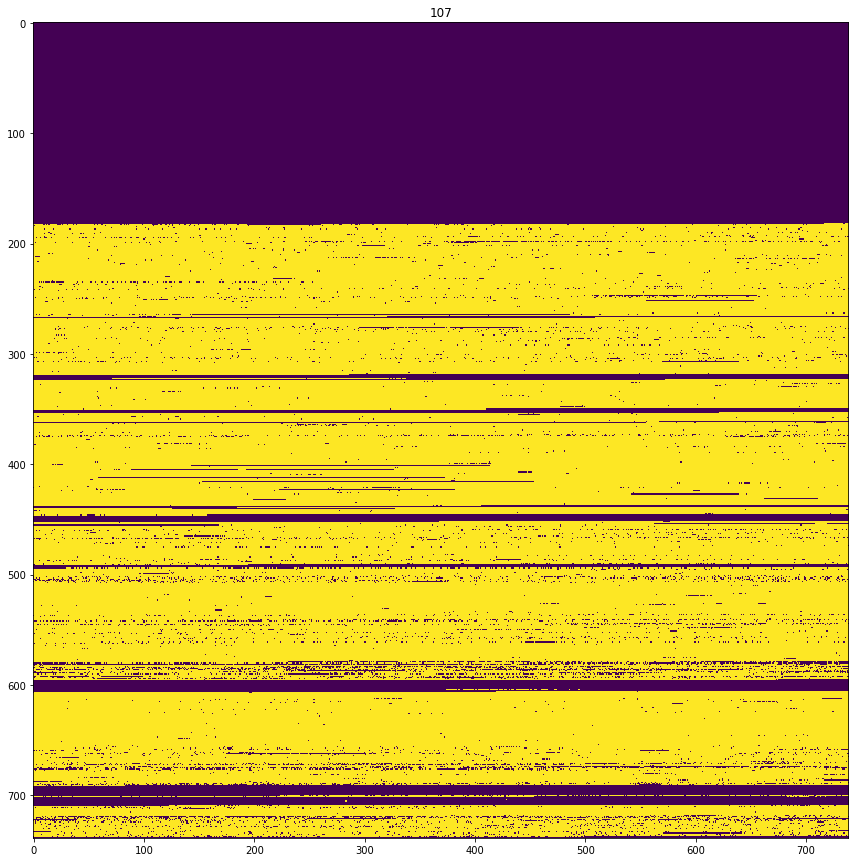

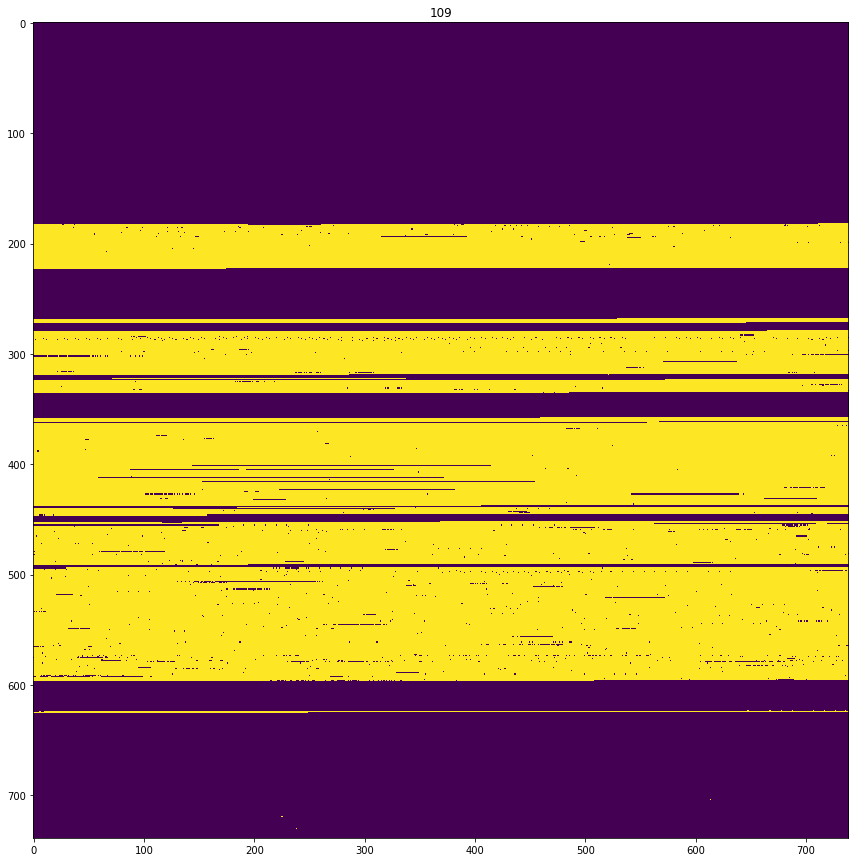

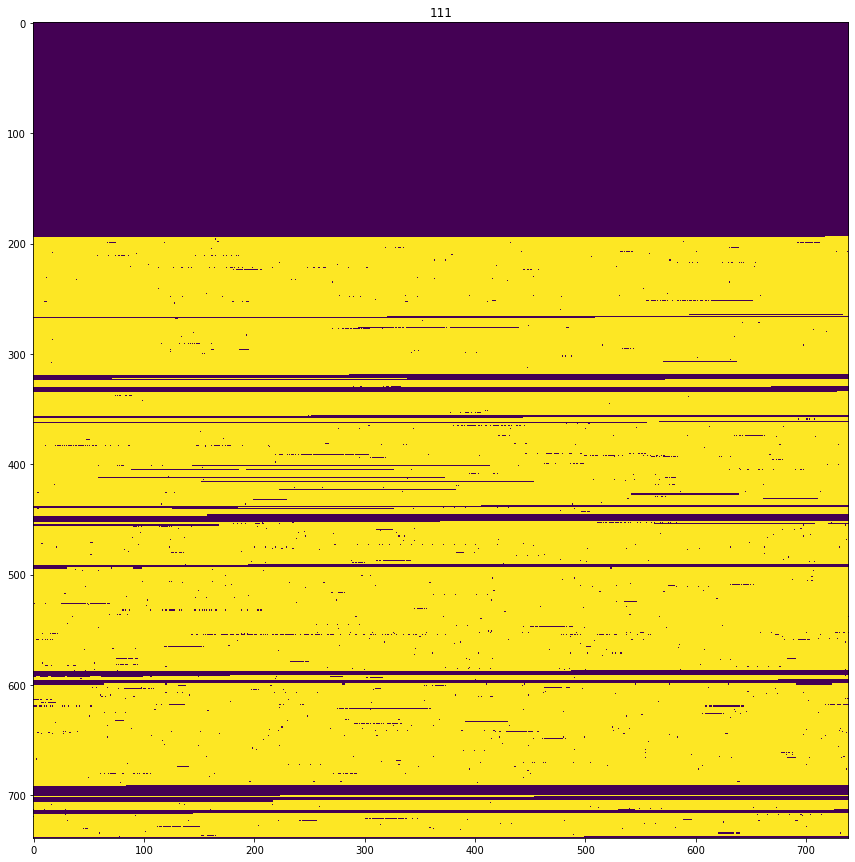

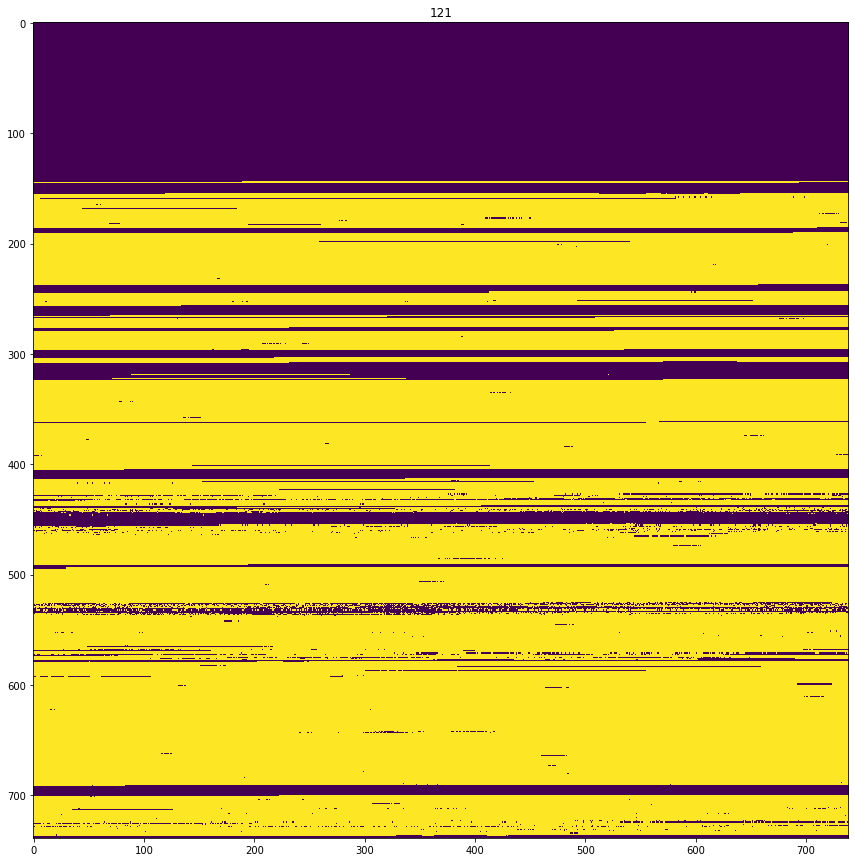

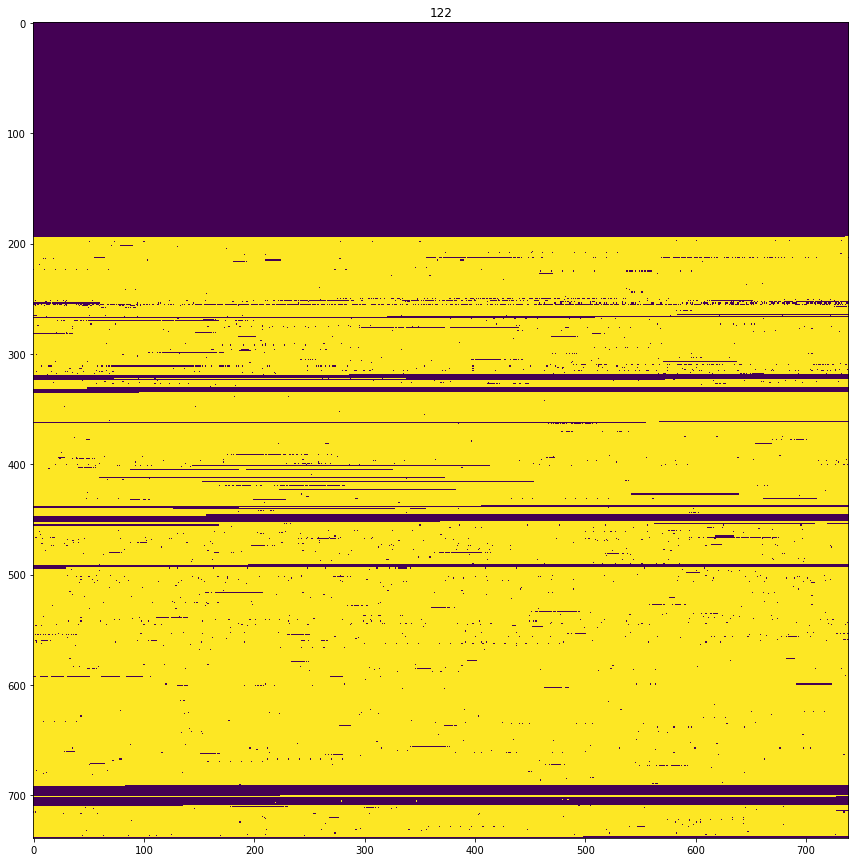

In [ ]:
for id in total_id_uniq:
    plt.figure(figsize=(15,15))
    plt.imshow(time_indices_map[id].reshape(739,739))
    plt.title(id)
    plt.savefig('Figure/sa_figures/{}.png'.format(id),dpi=300)

In [ ]:
time_indices_new = np.zeros(546121)
jj = 0
for i, item in enumerate(time_indices_new):
    if 1 in time_indices_tmp[i*30:i*30+30]:
        time_indices_new[i] = 1
    # print(i*30+time_min)

print(jj)

0


Text(0.5, 1.0, '3')

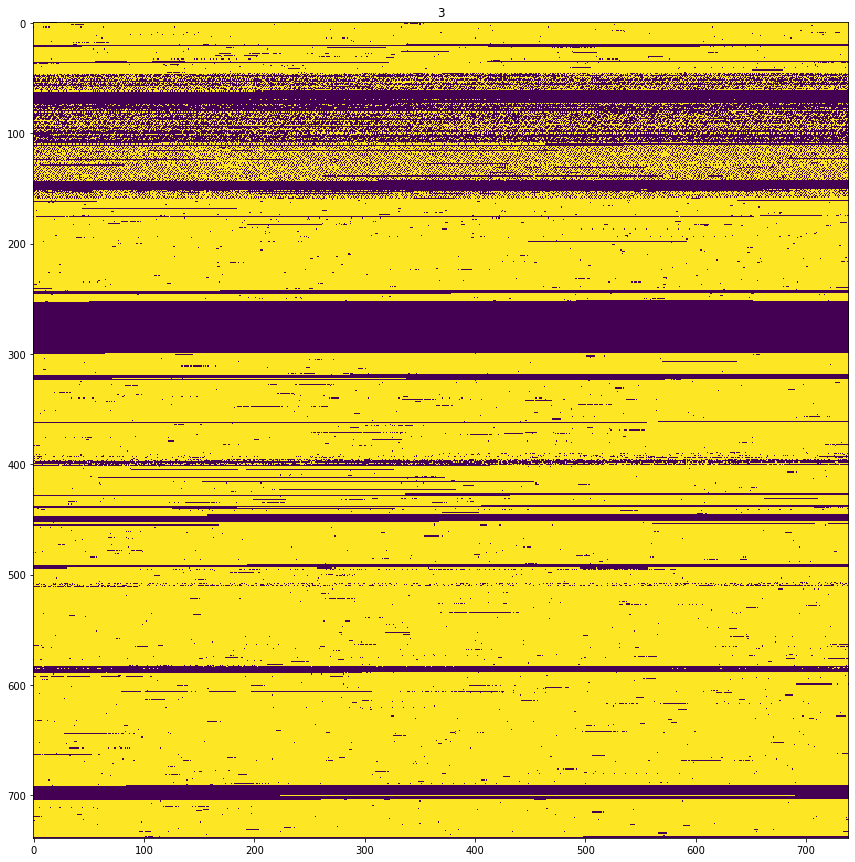

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(time_indices_new.reshape(739,739))
plt.title(3)

/home/esmidth/.pyenv/versions/anaconda3-2020.02/envs/ccs_ta/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


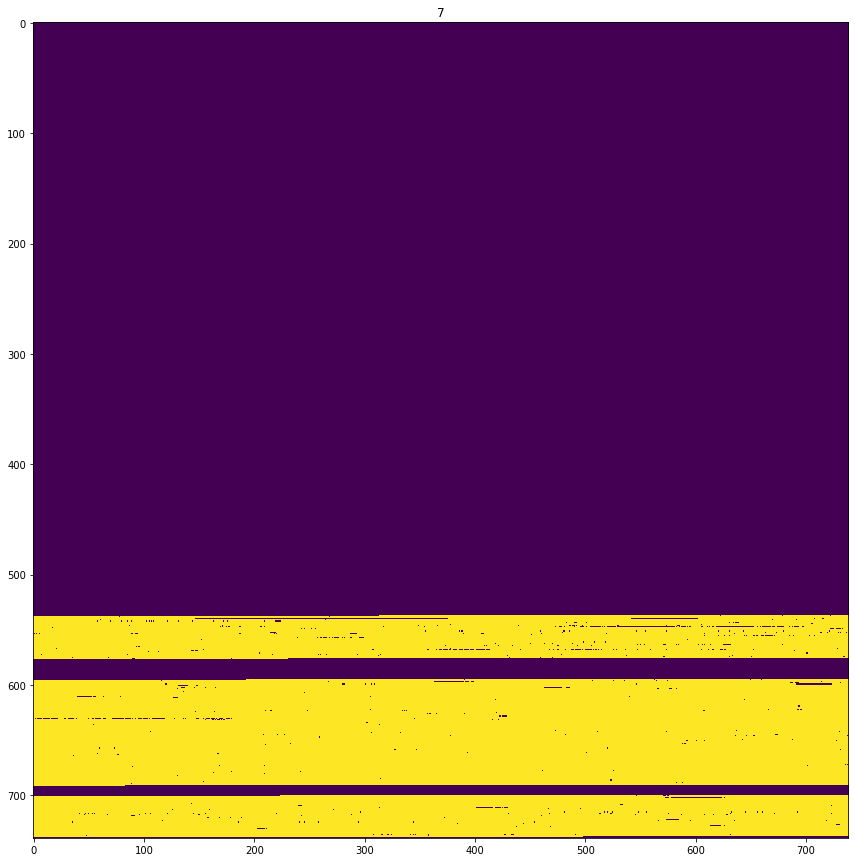

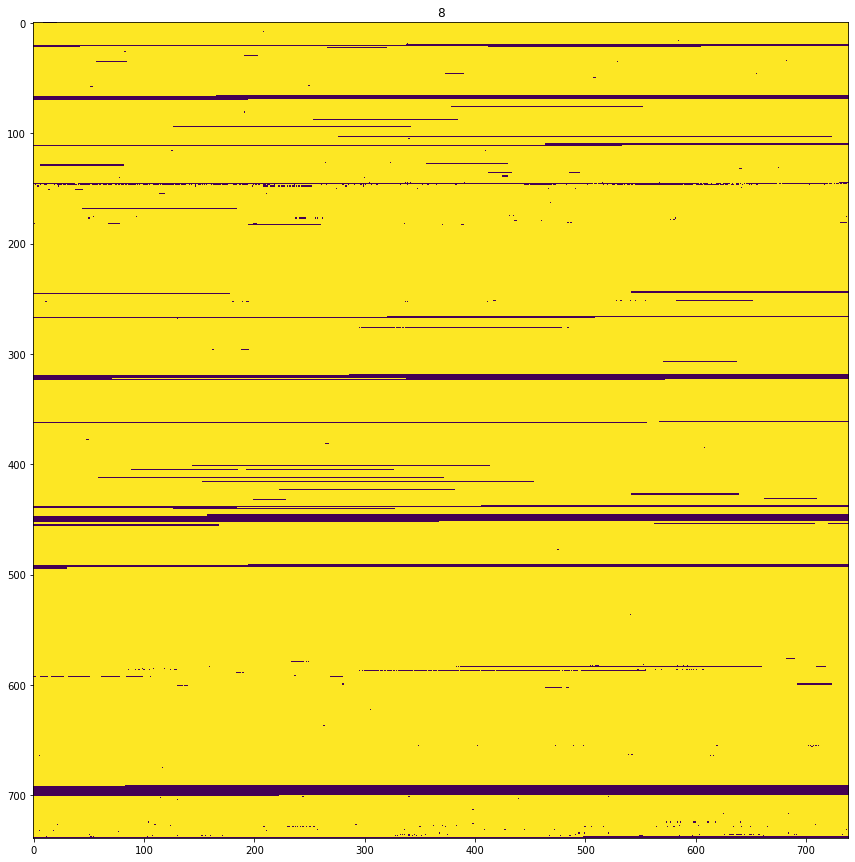

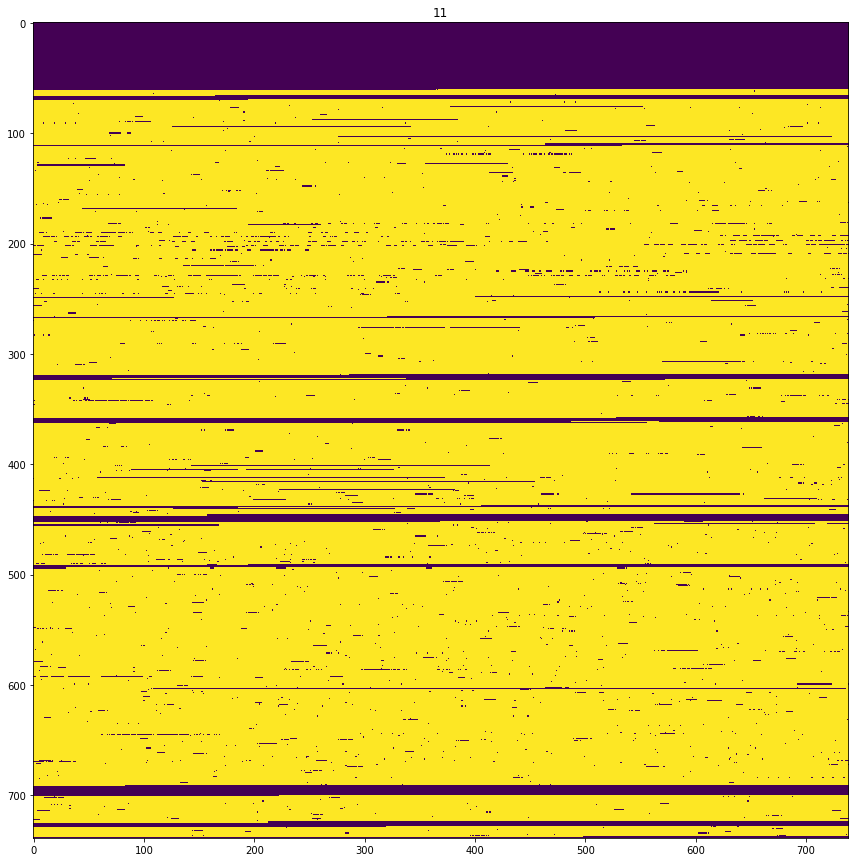

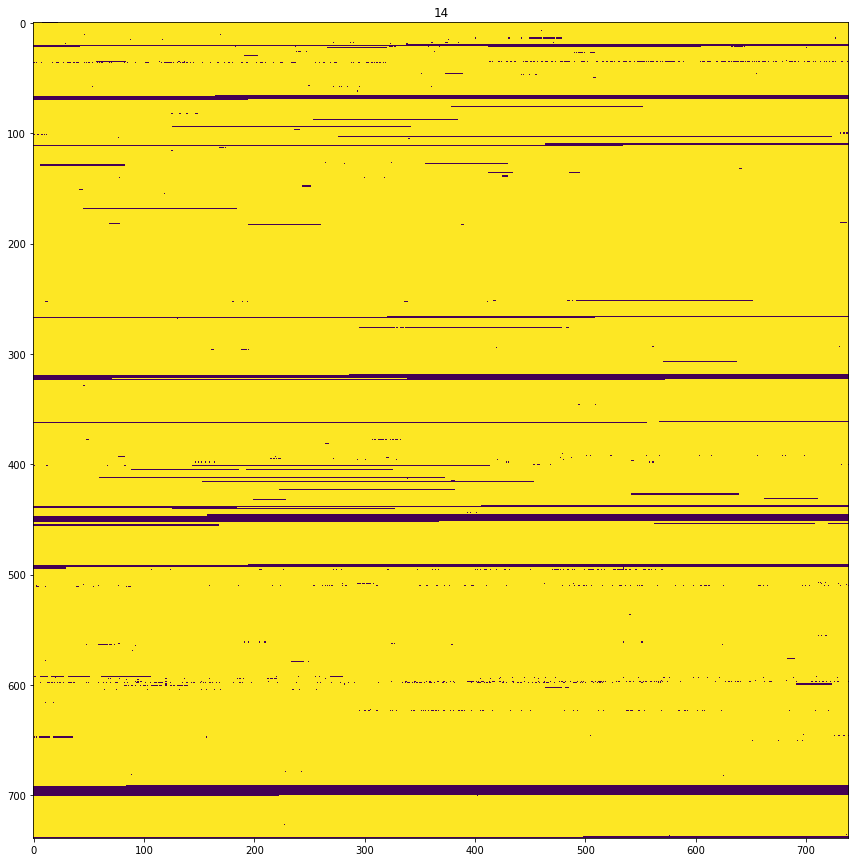

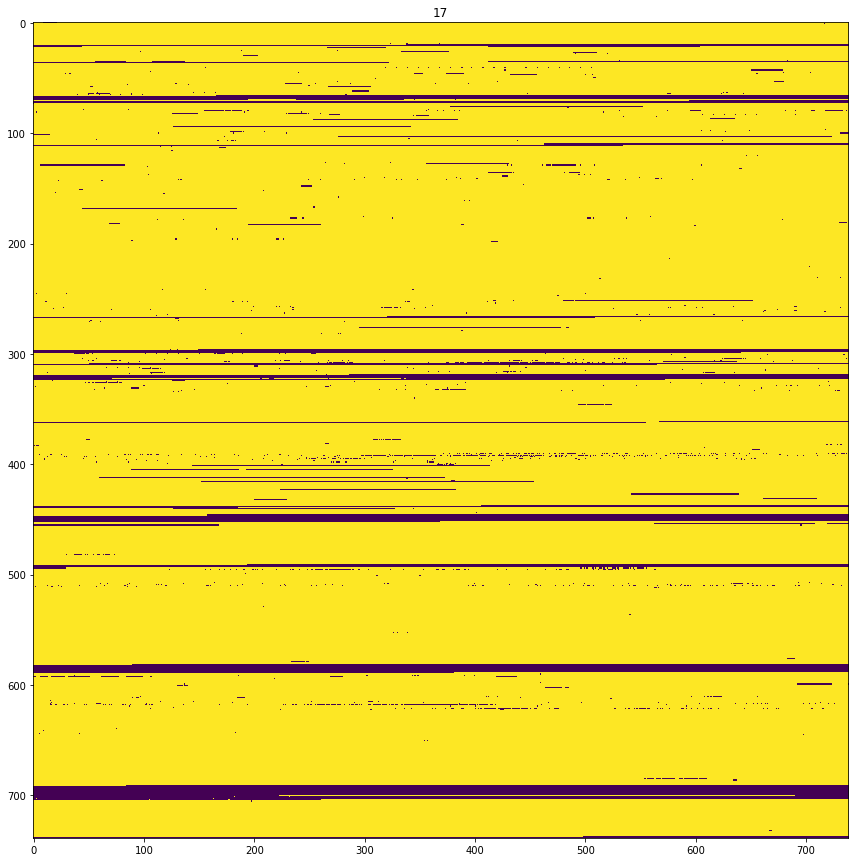

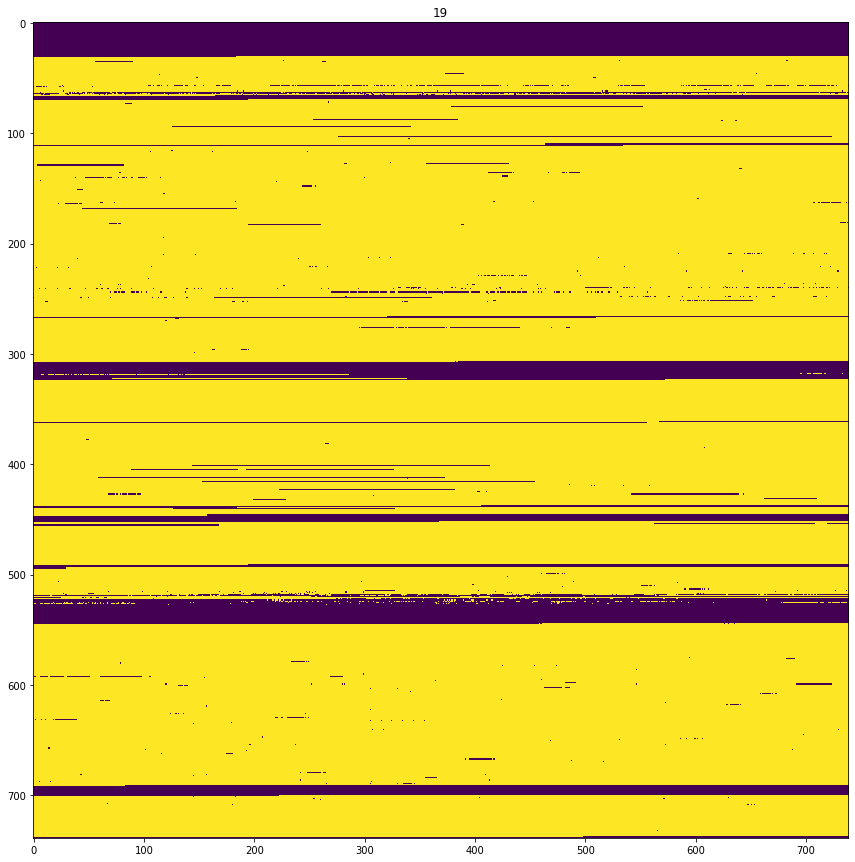

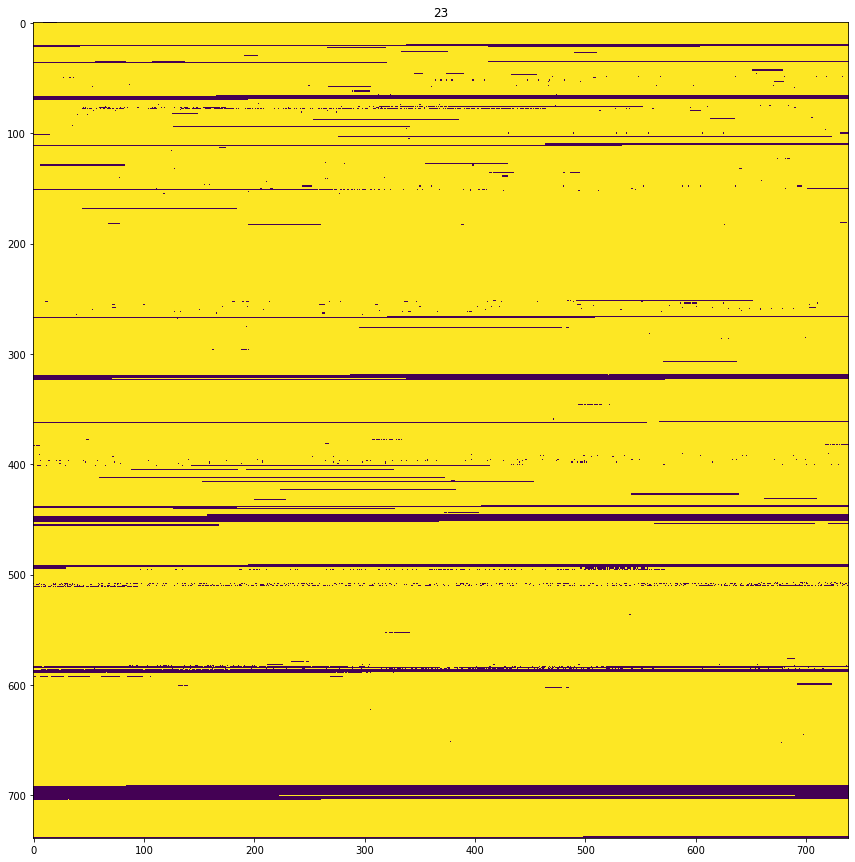

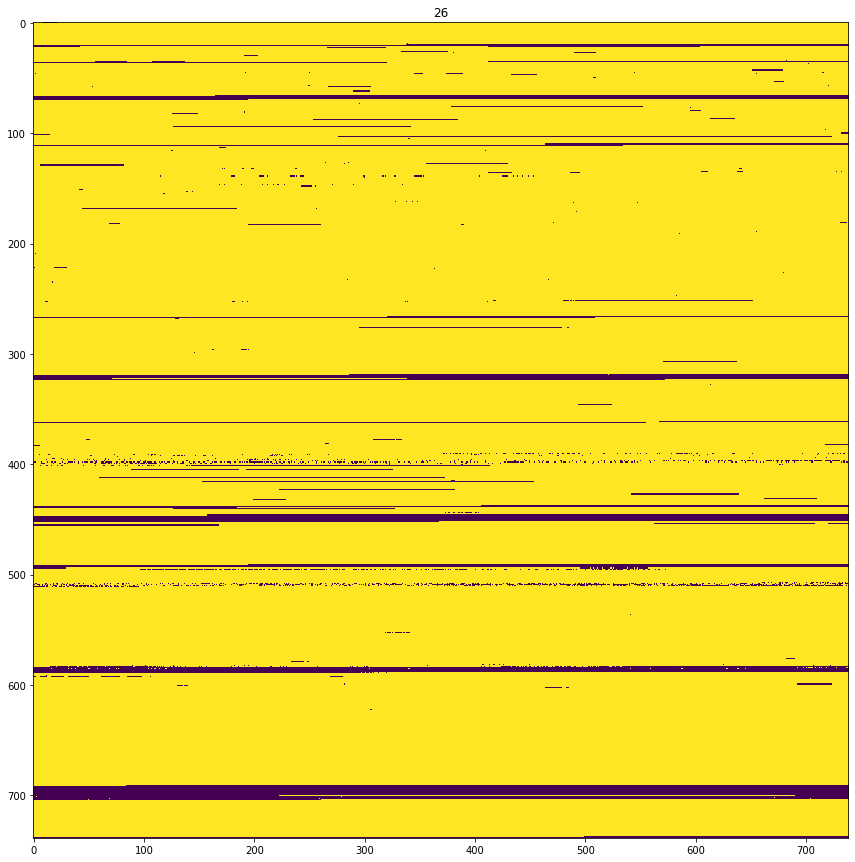

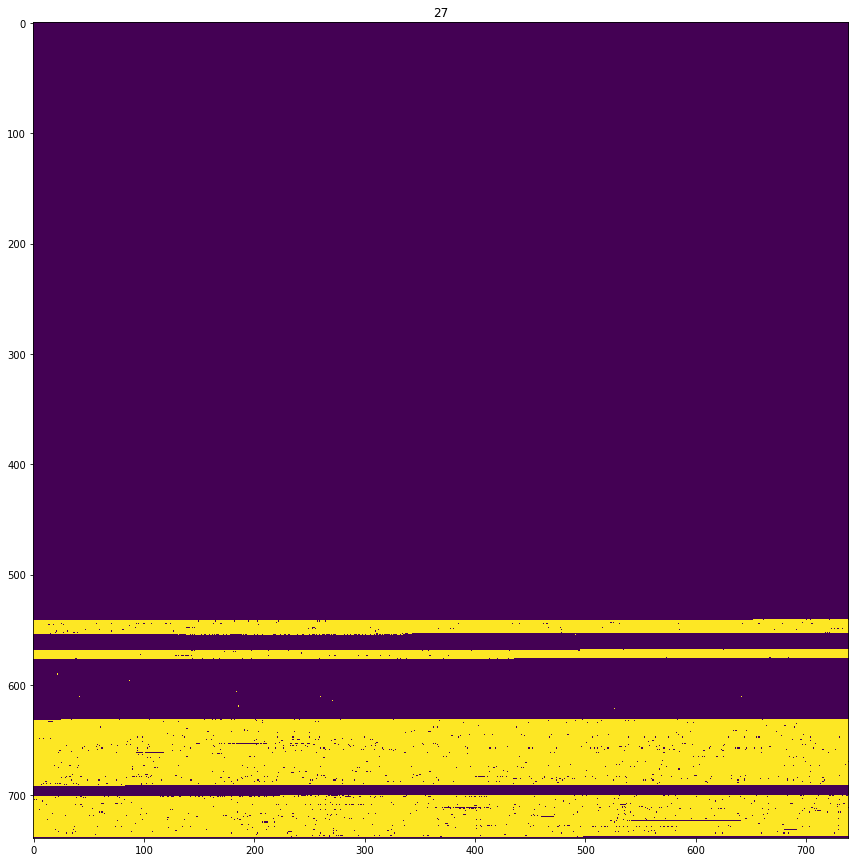

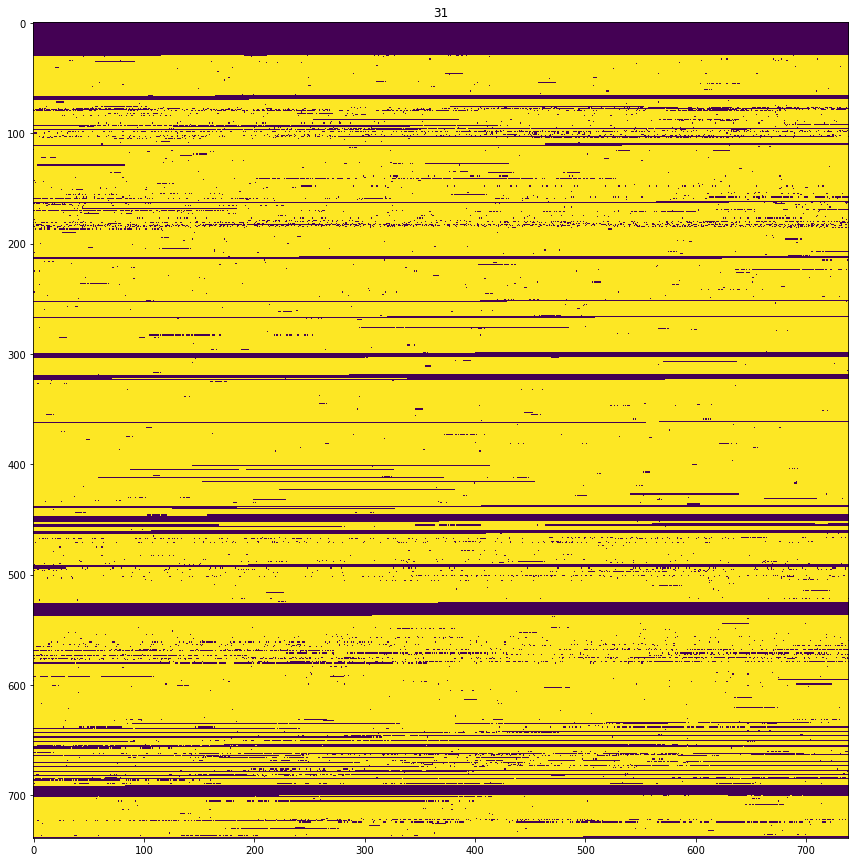

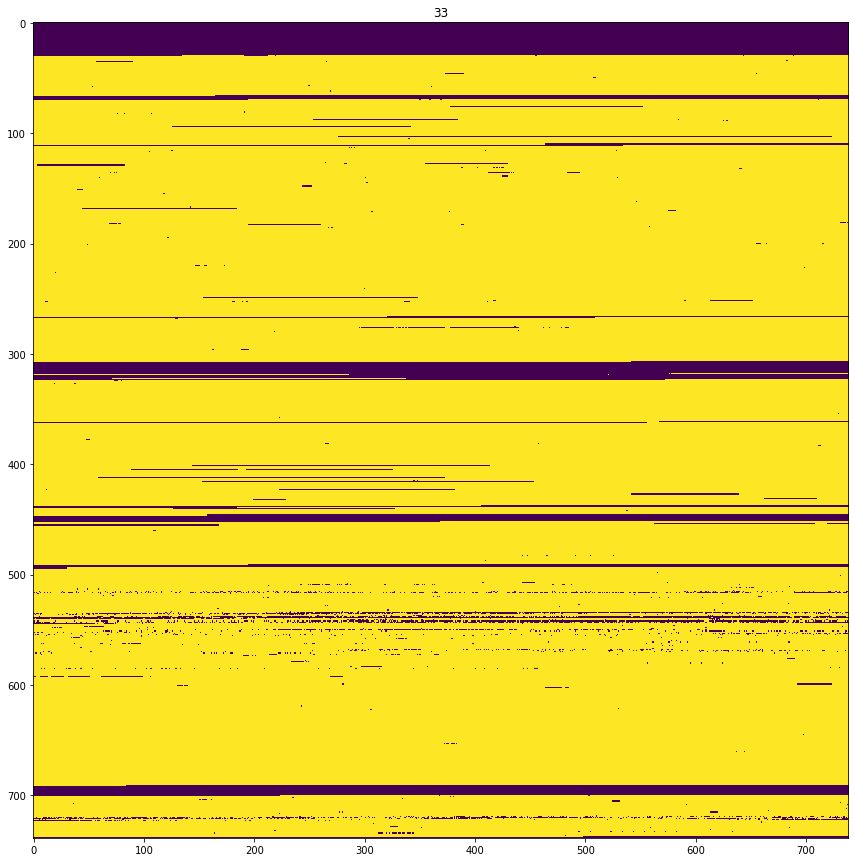

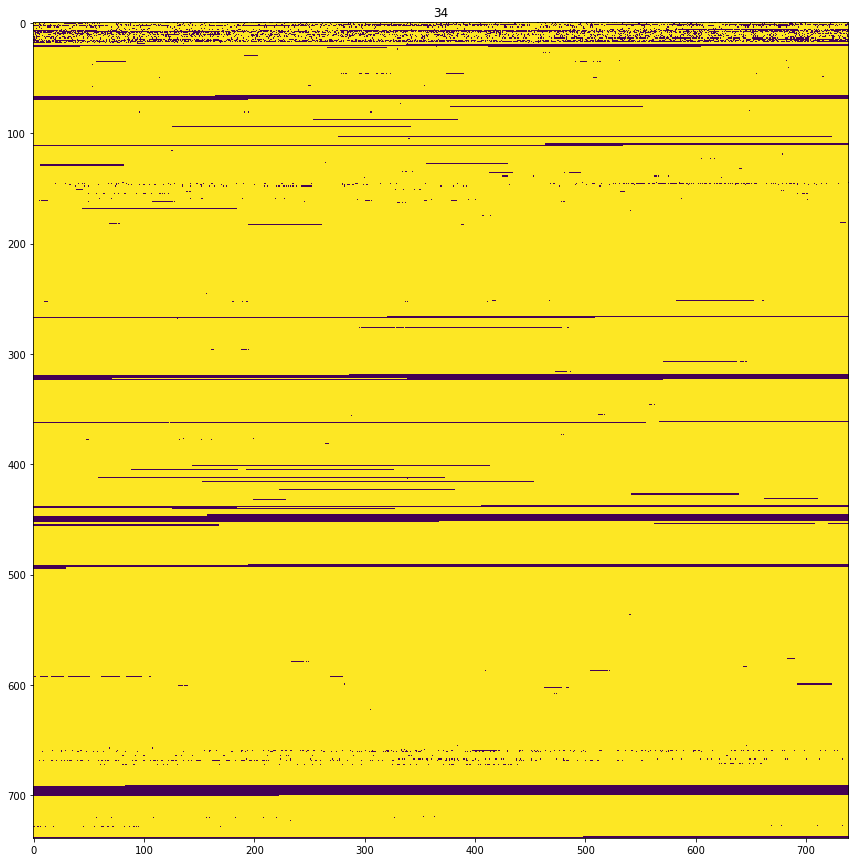

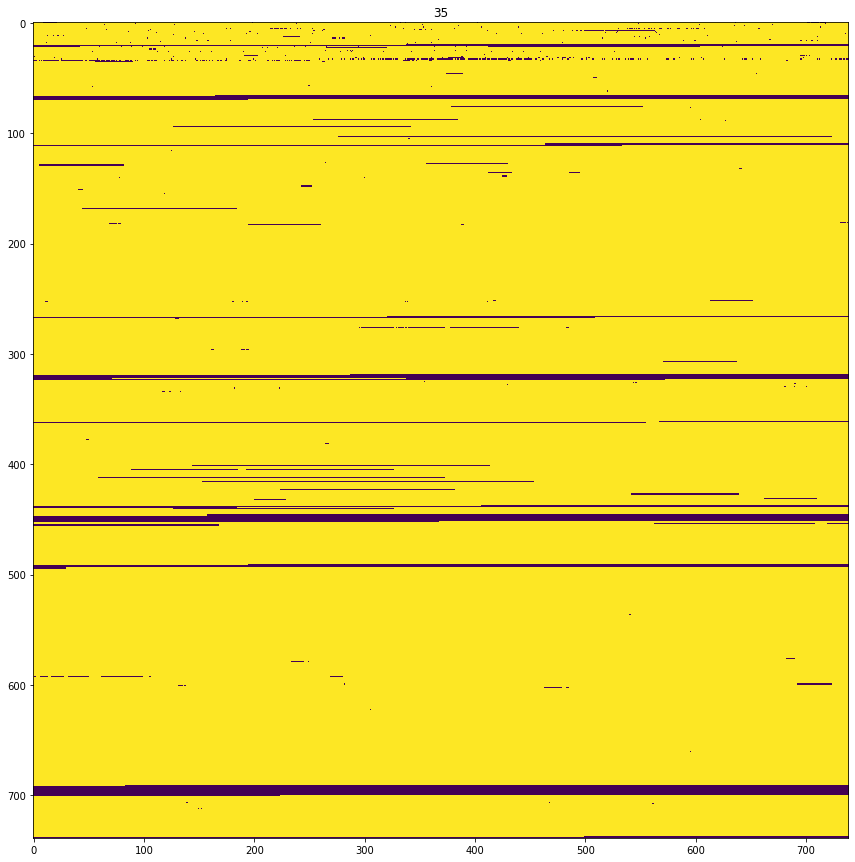

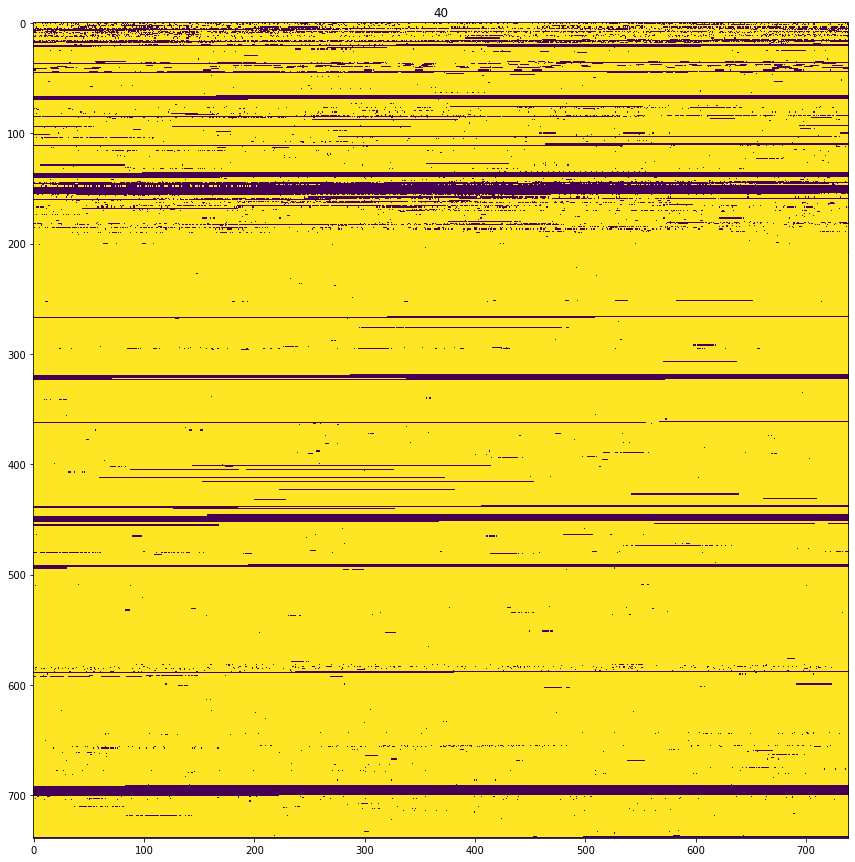

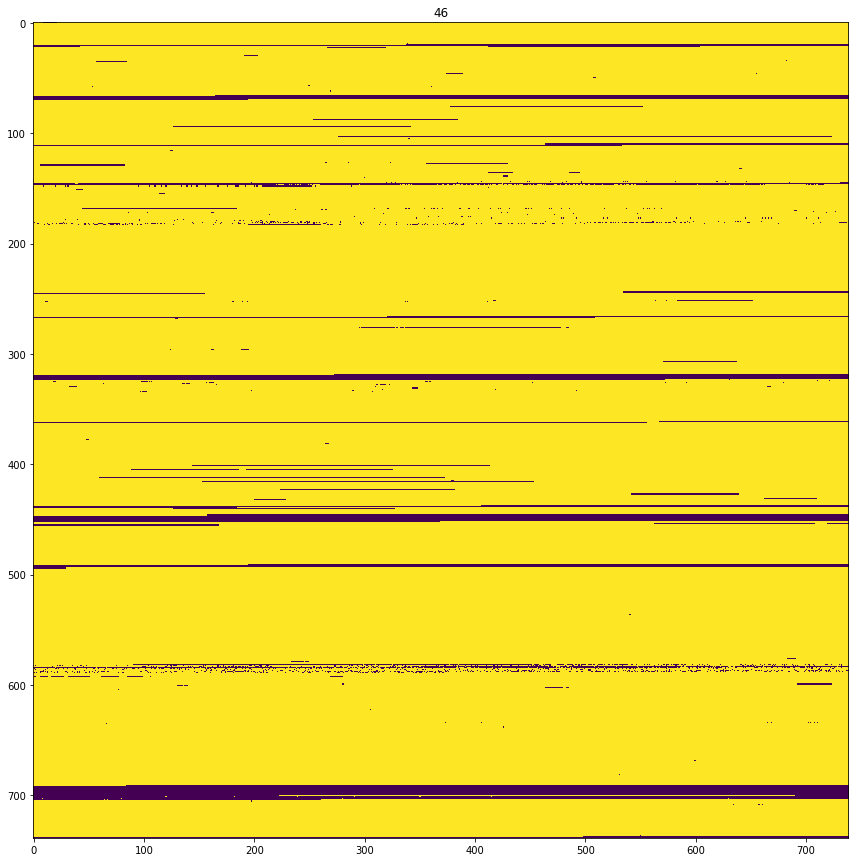

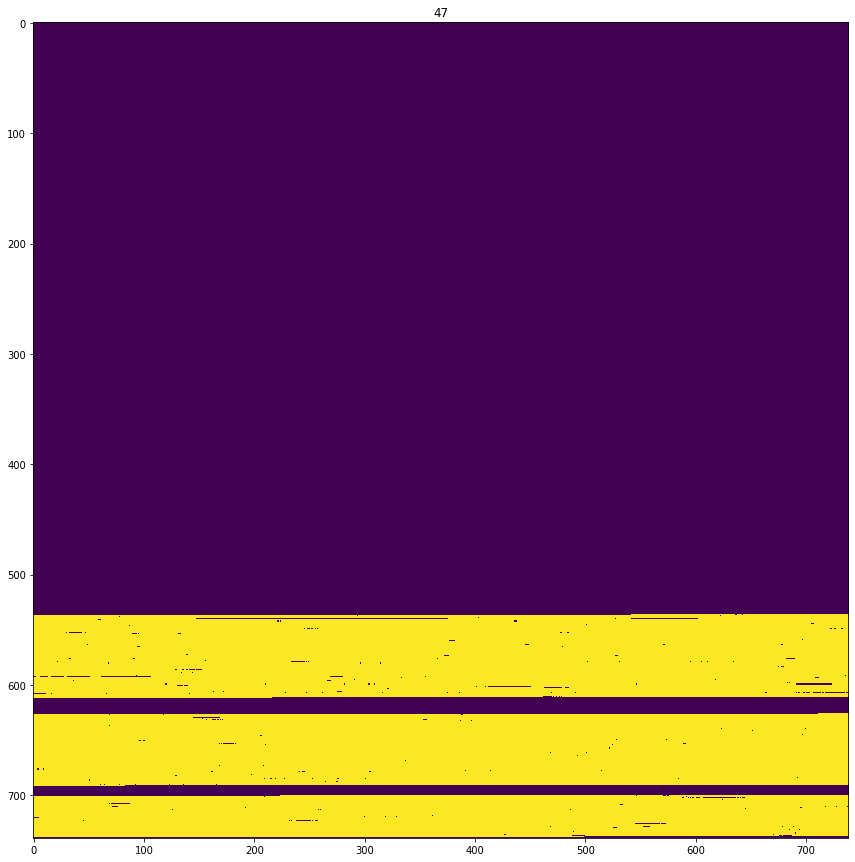

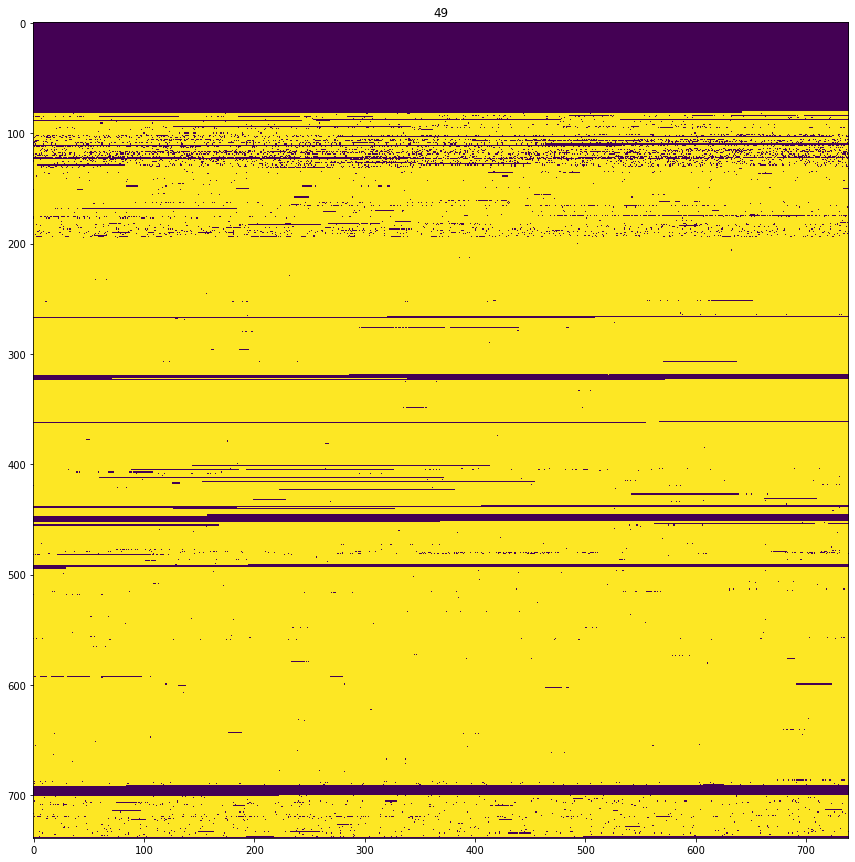

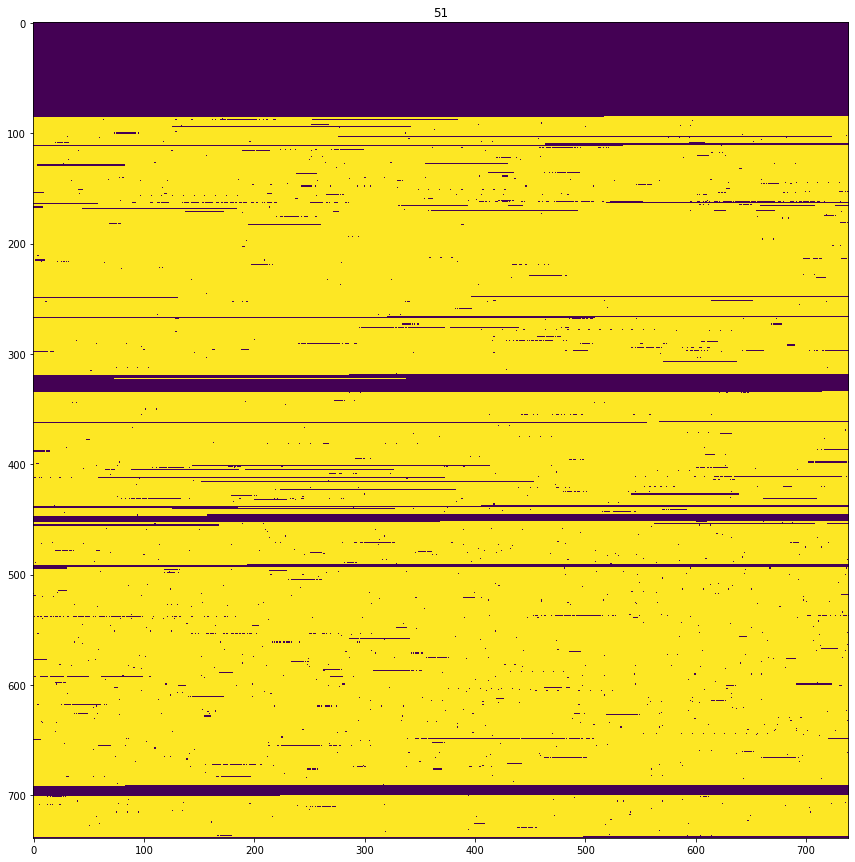

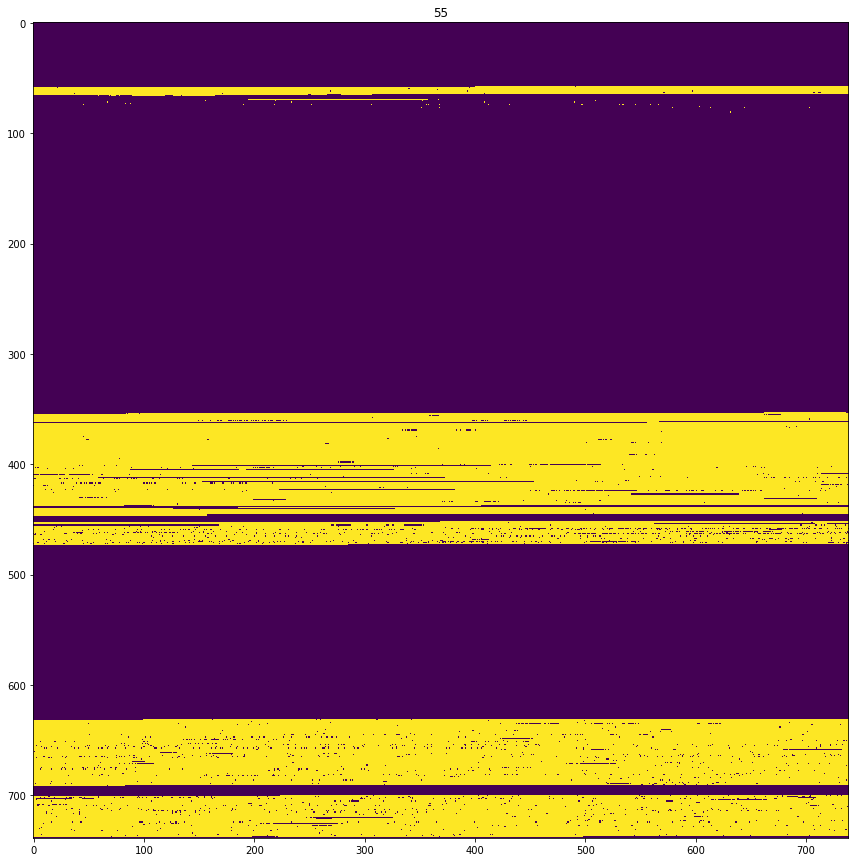

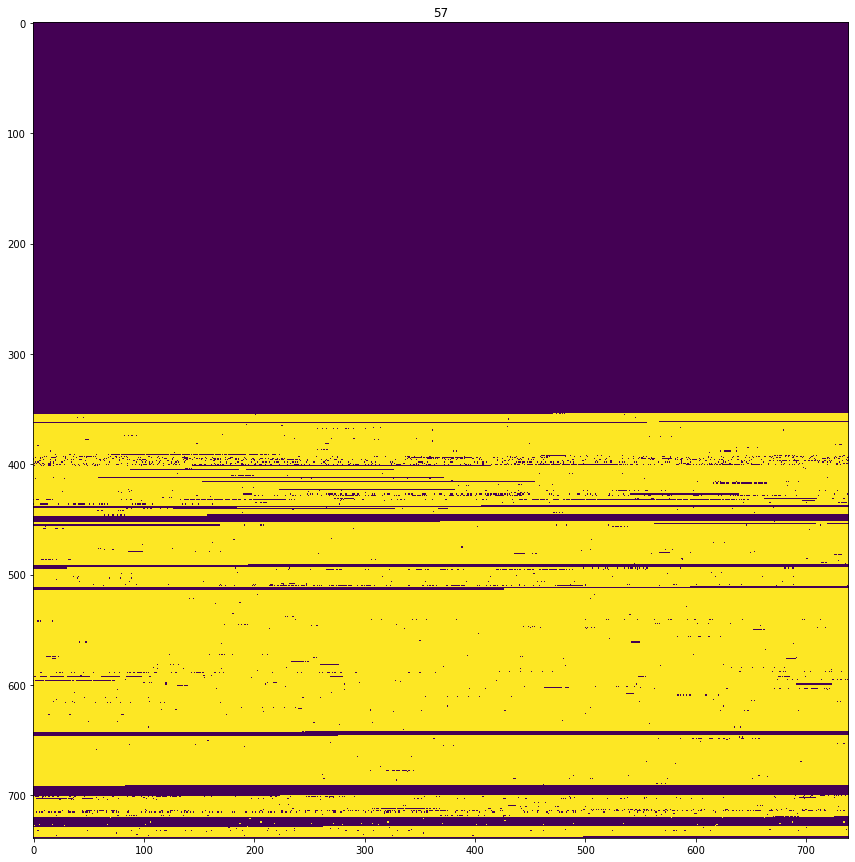

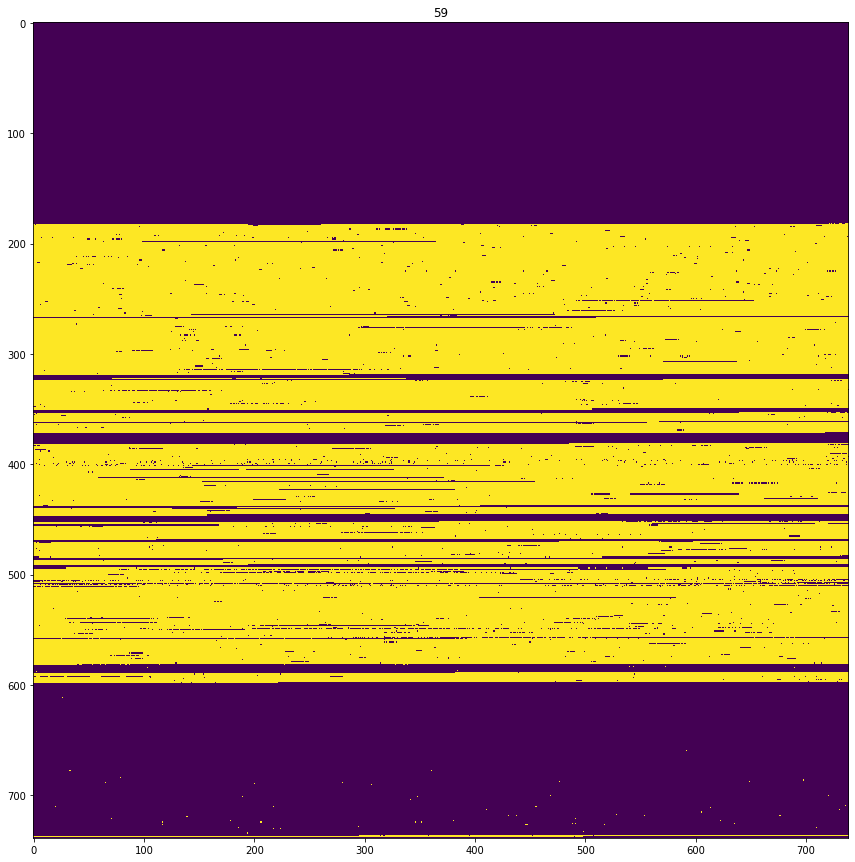

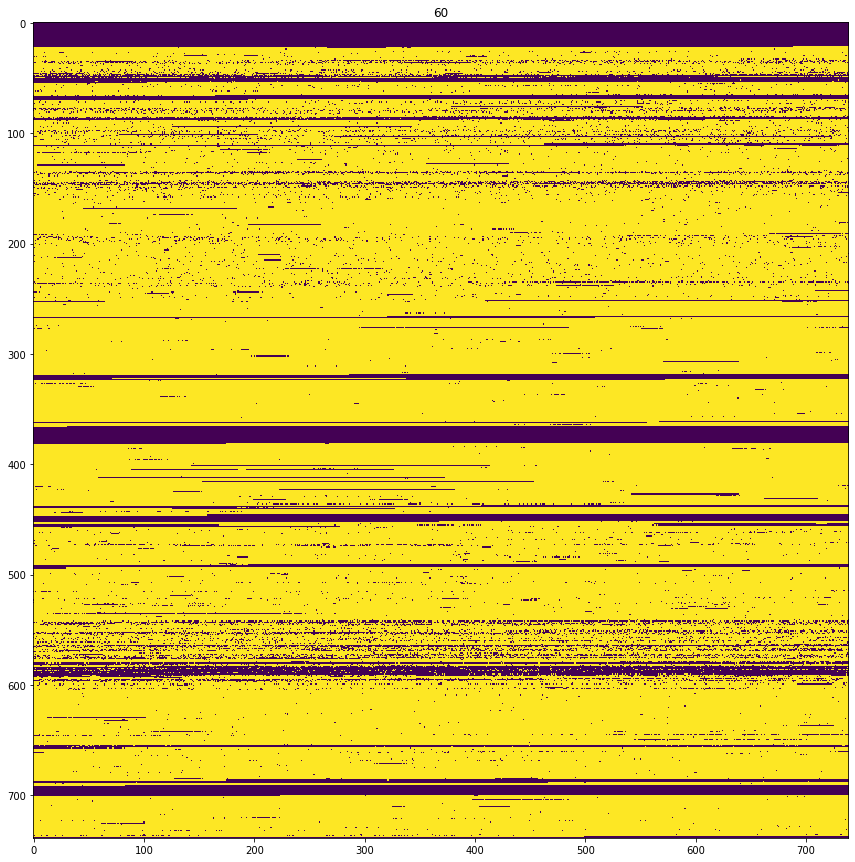

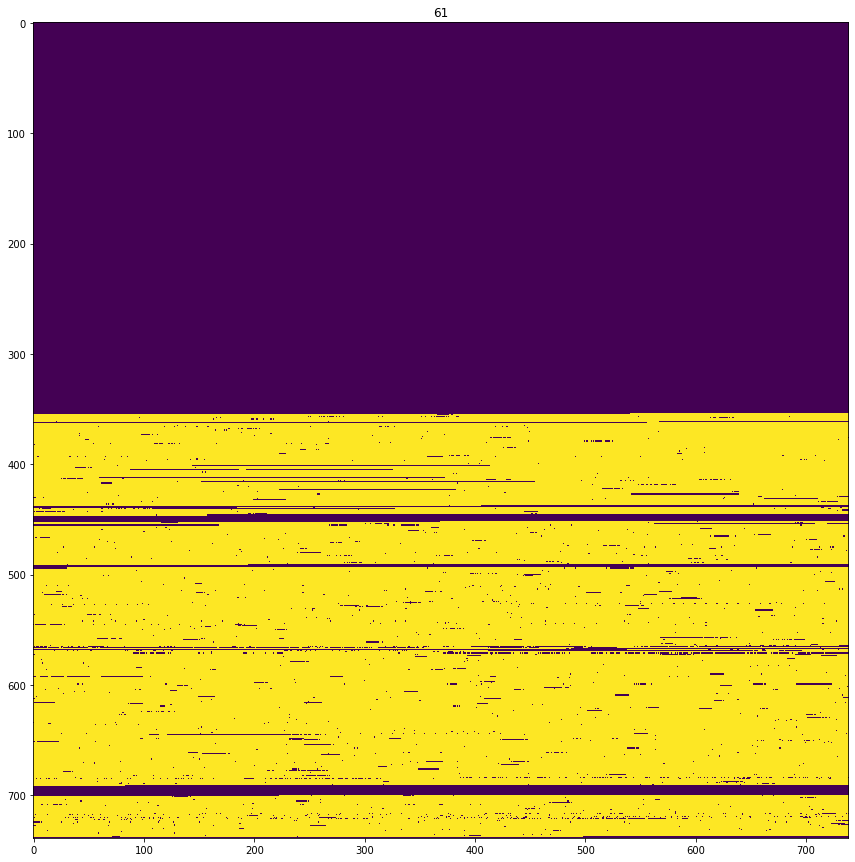

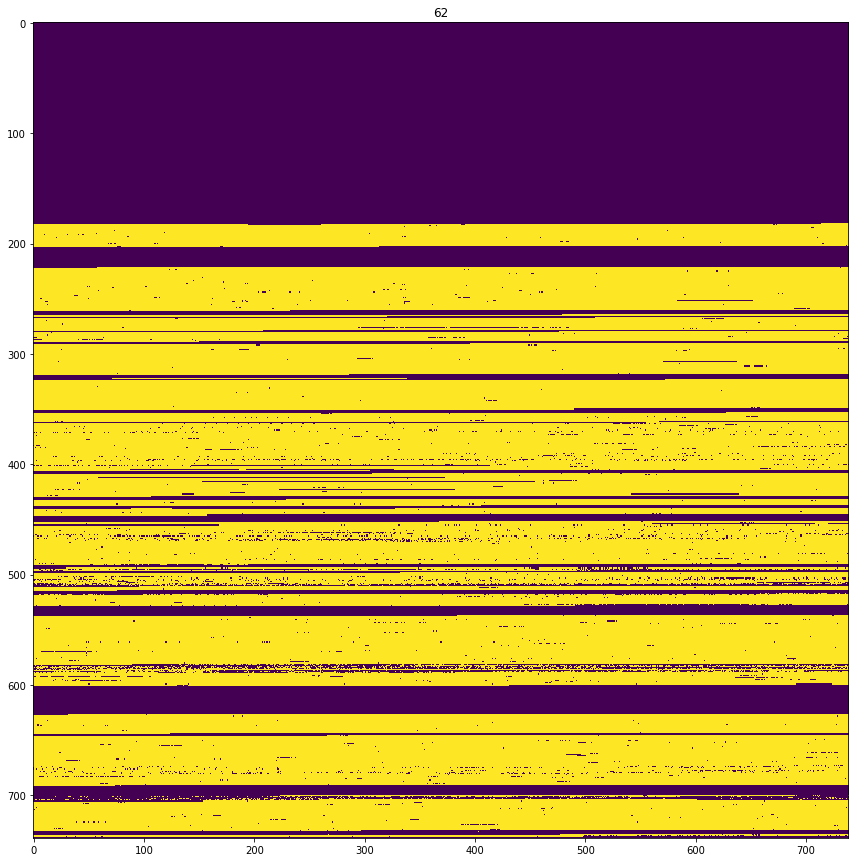

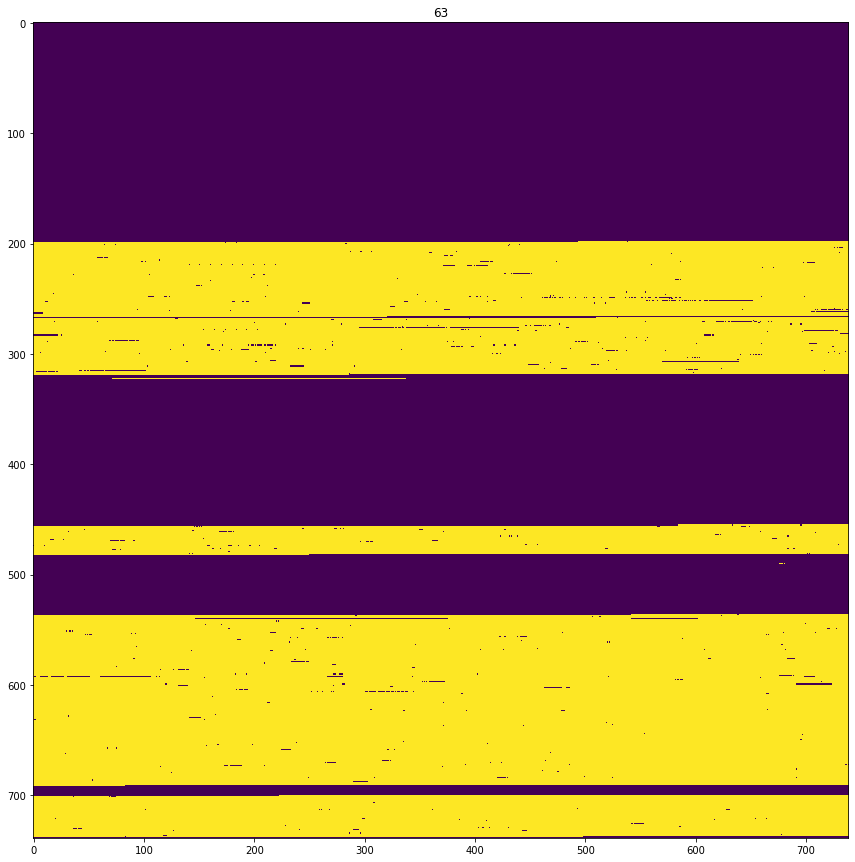

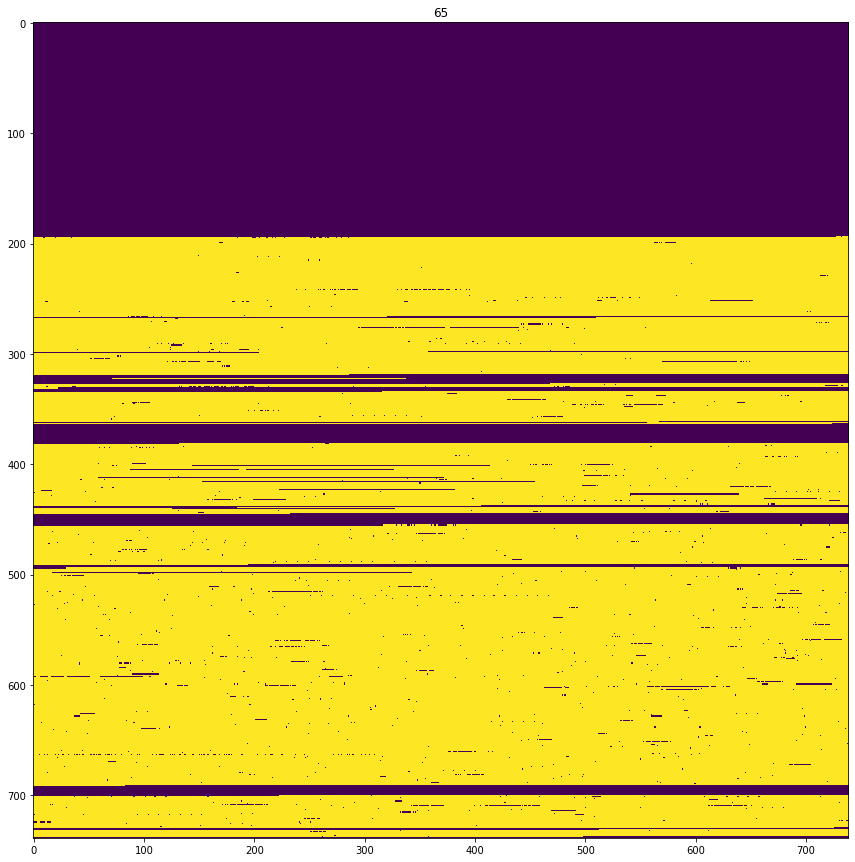

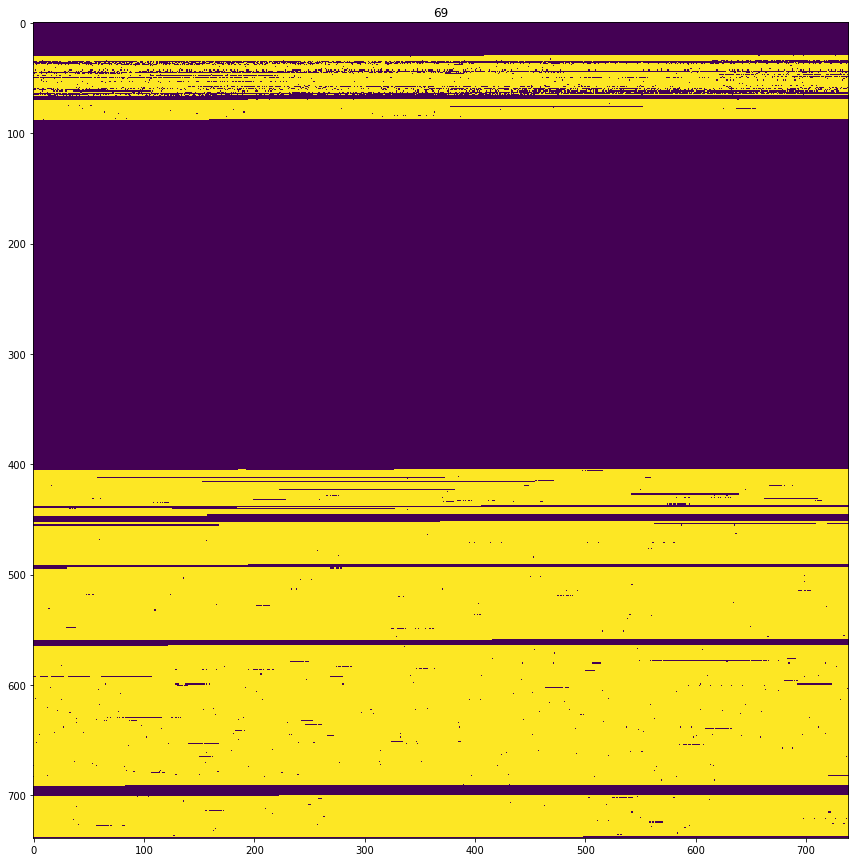

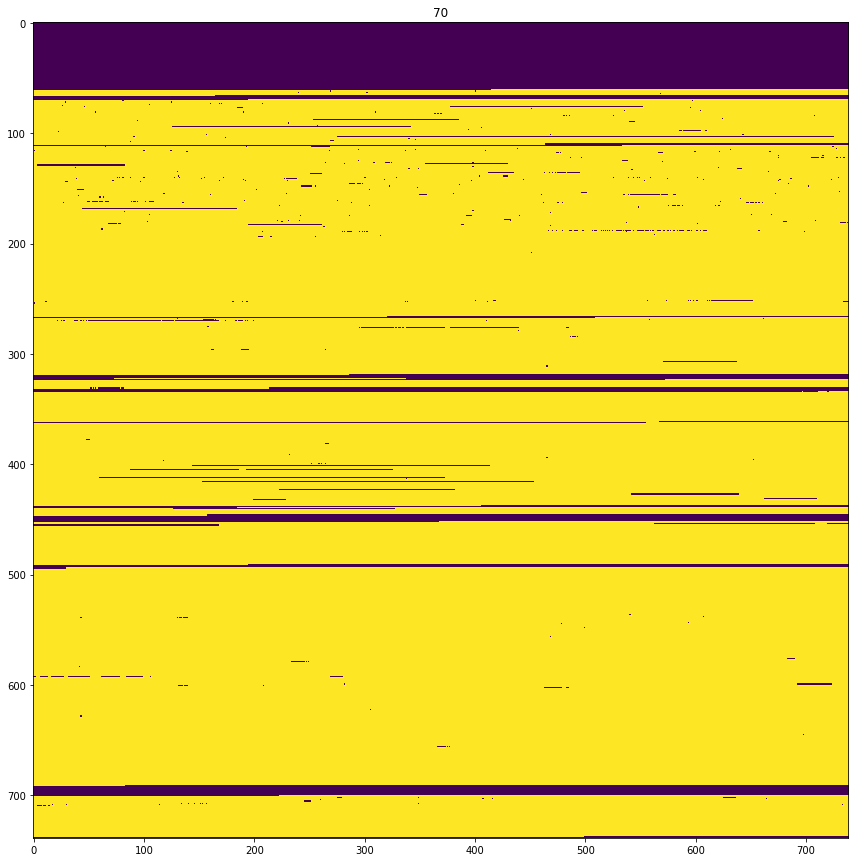

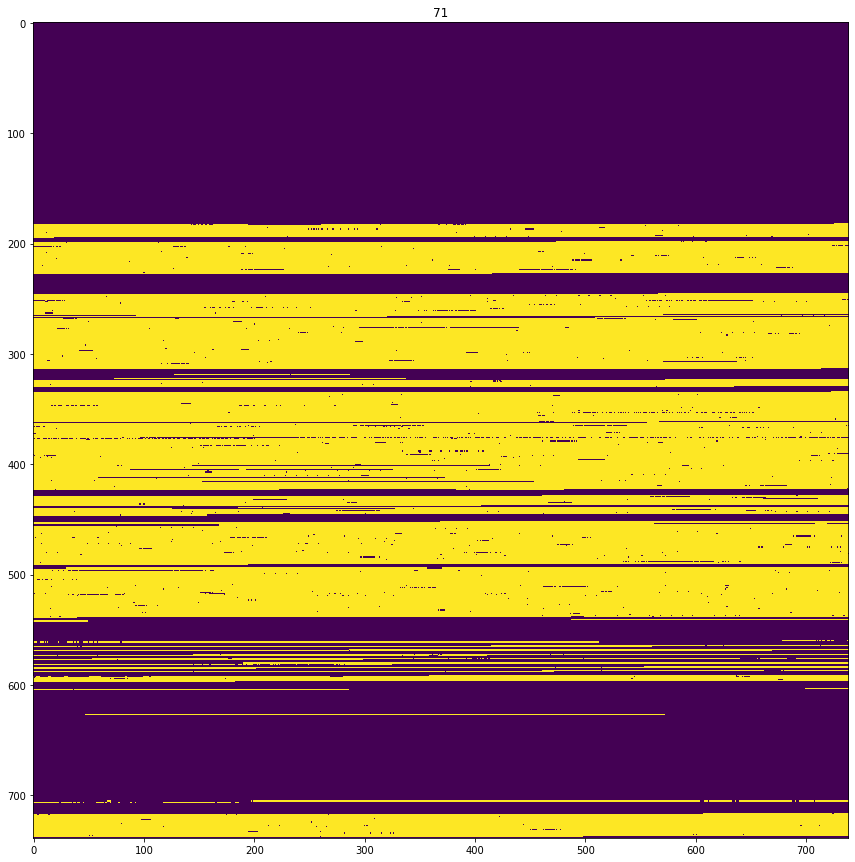

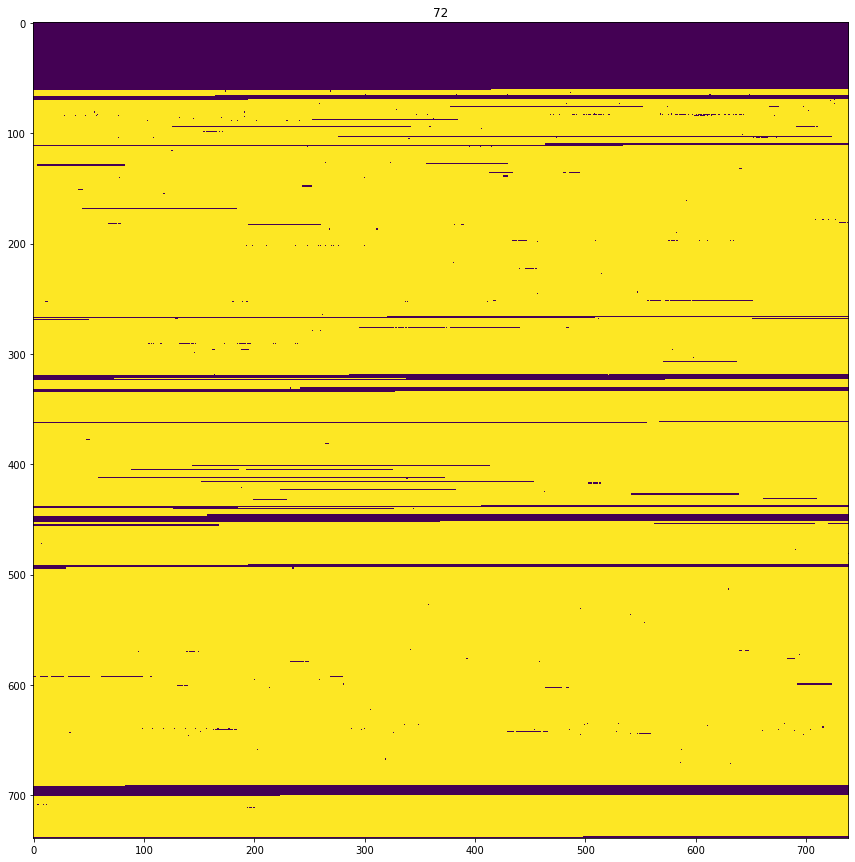

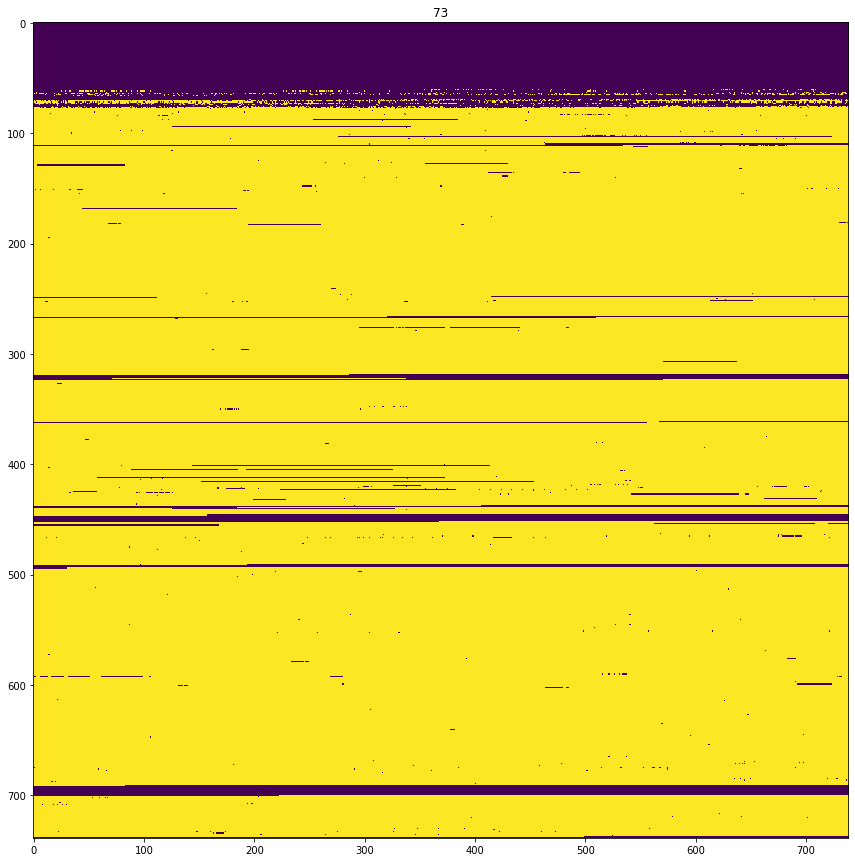

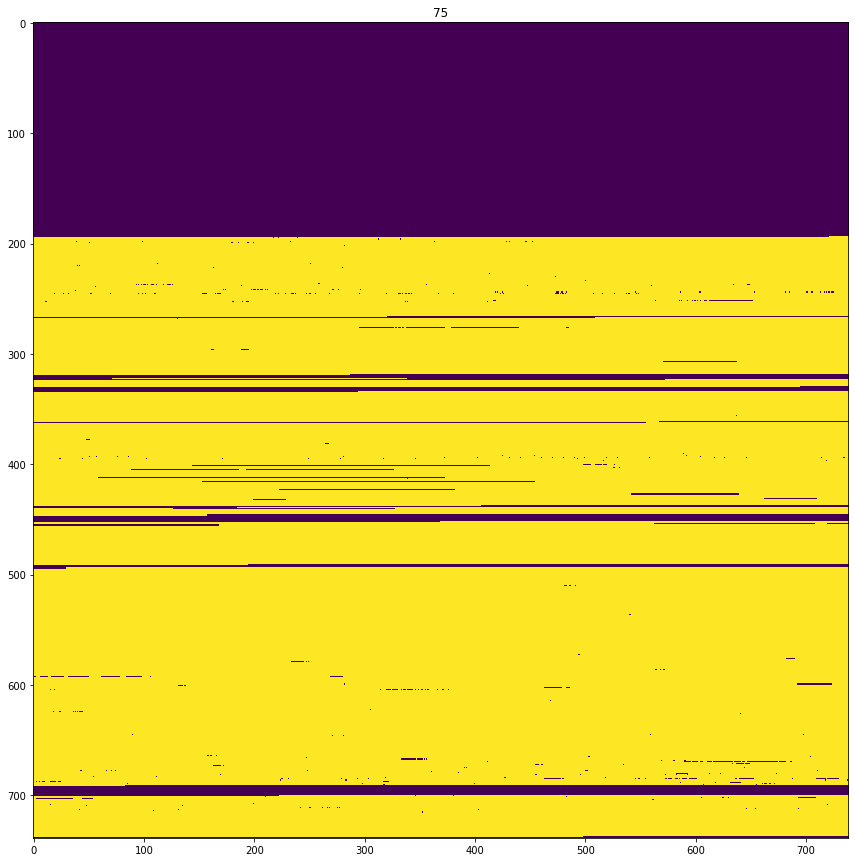

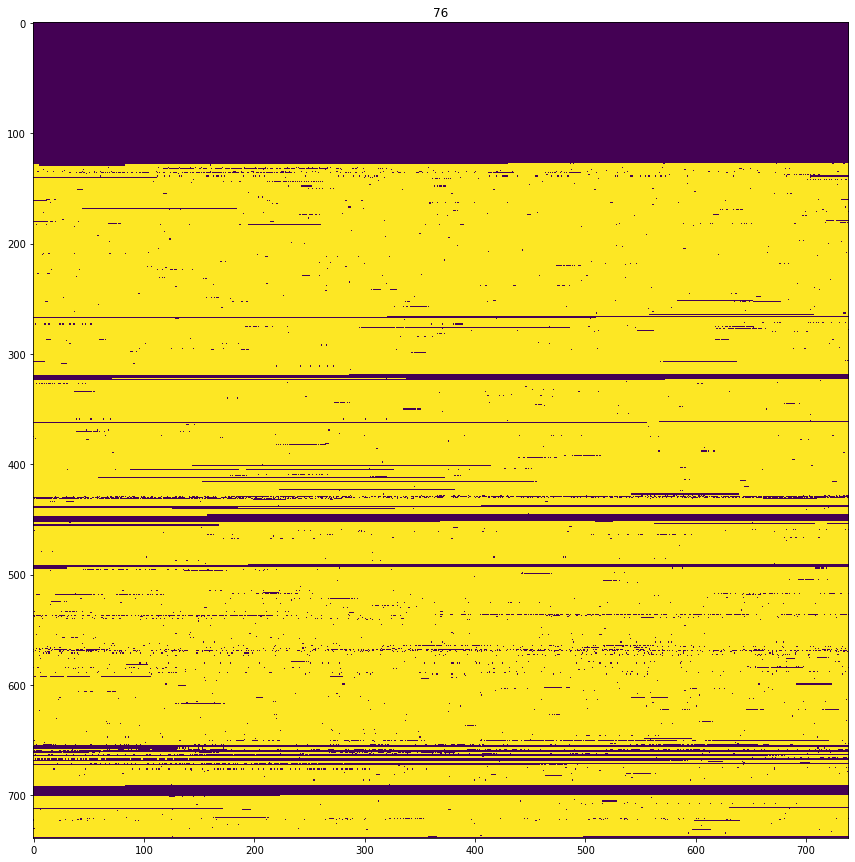

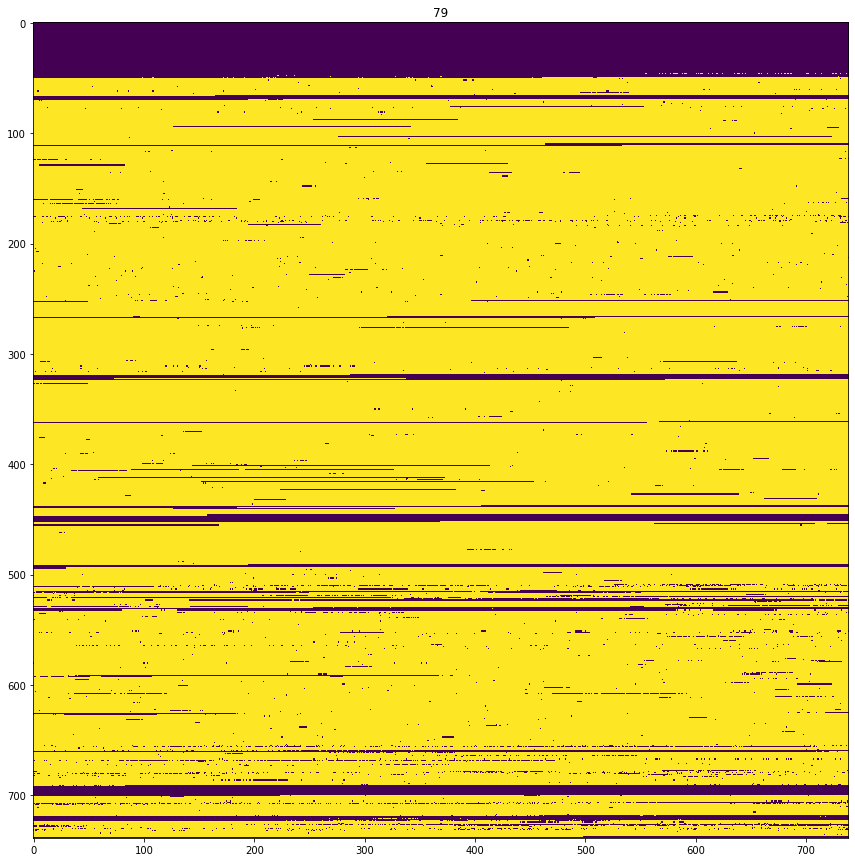

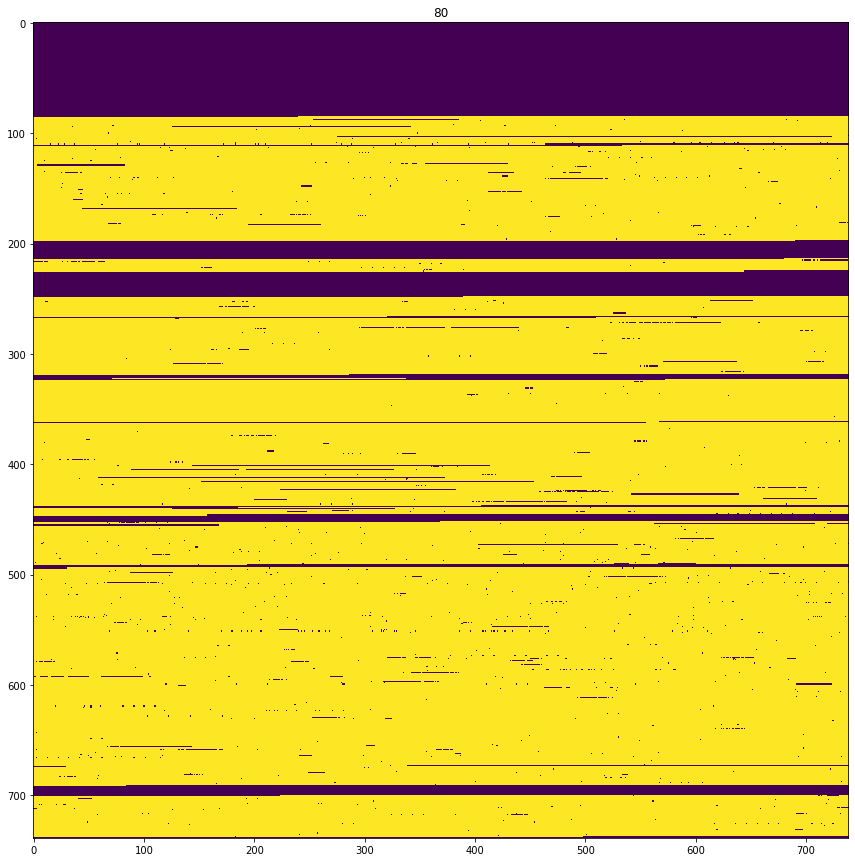

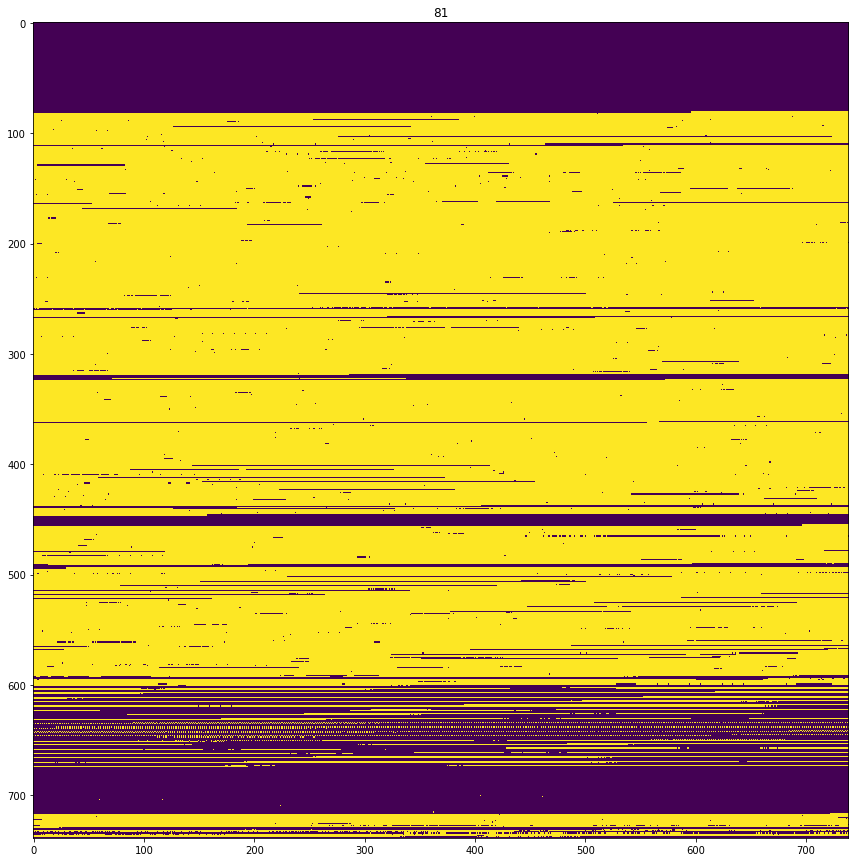

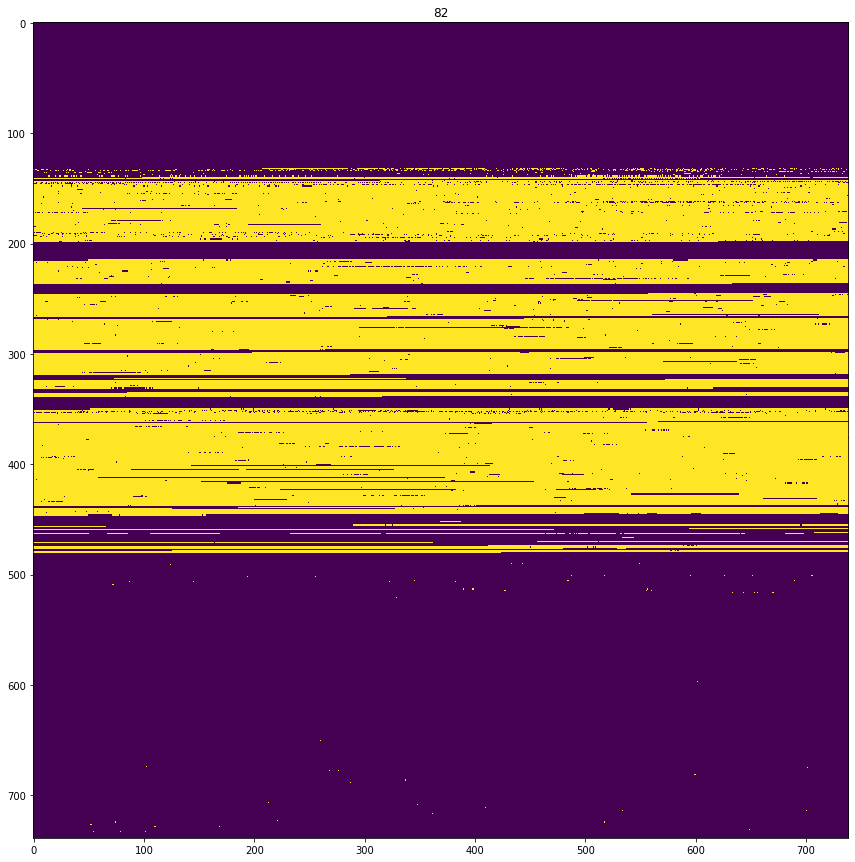

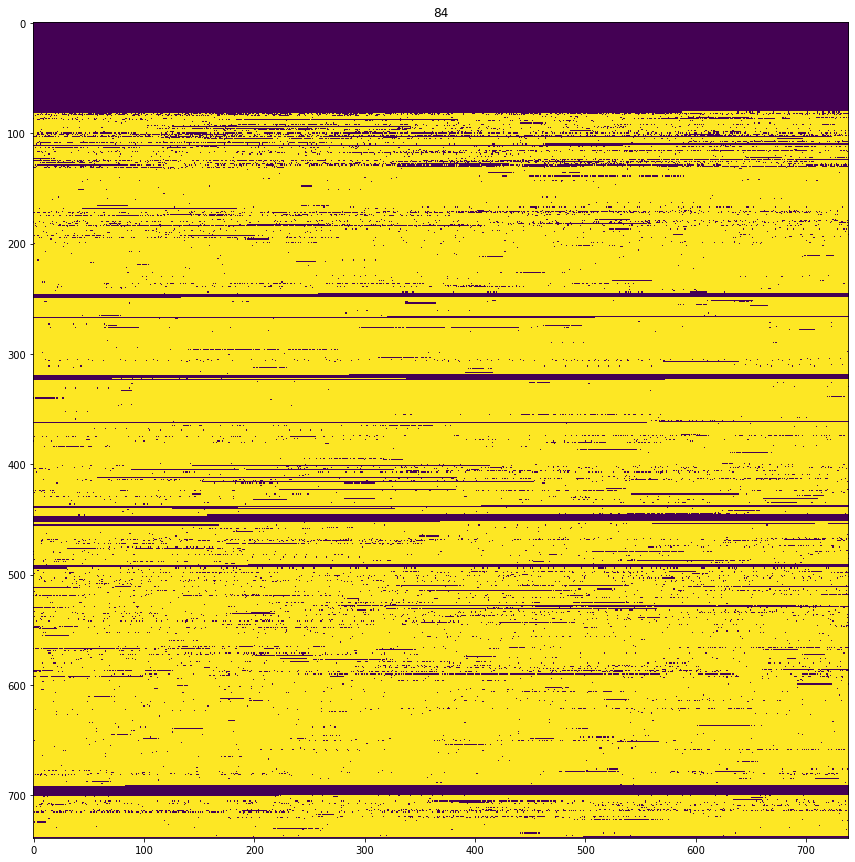

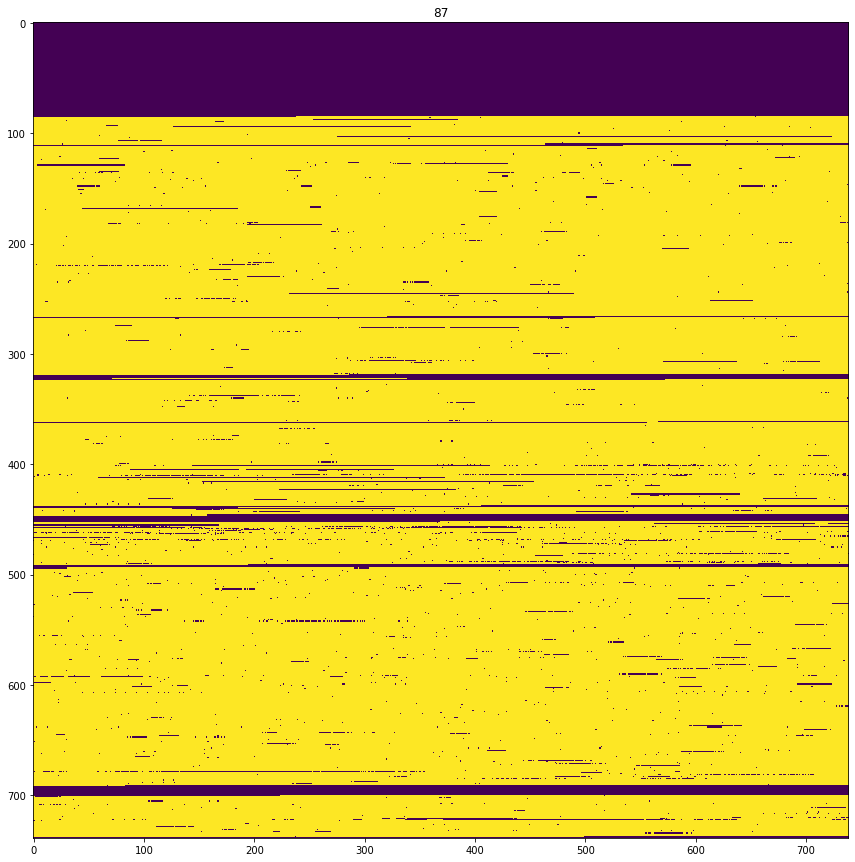

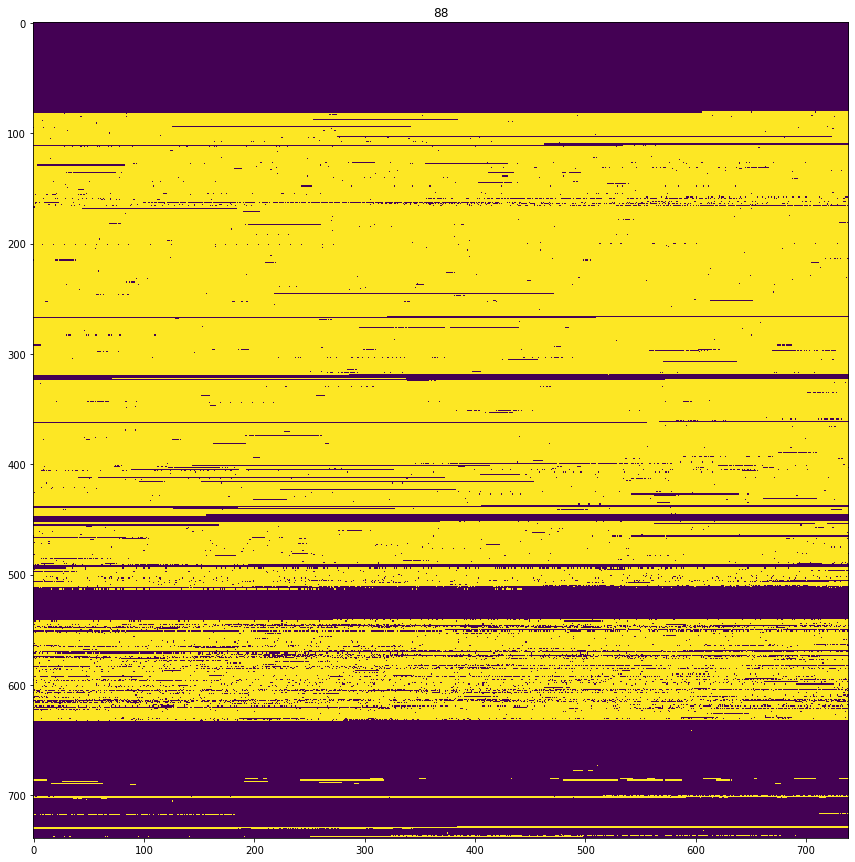

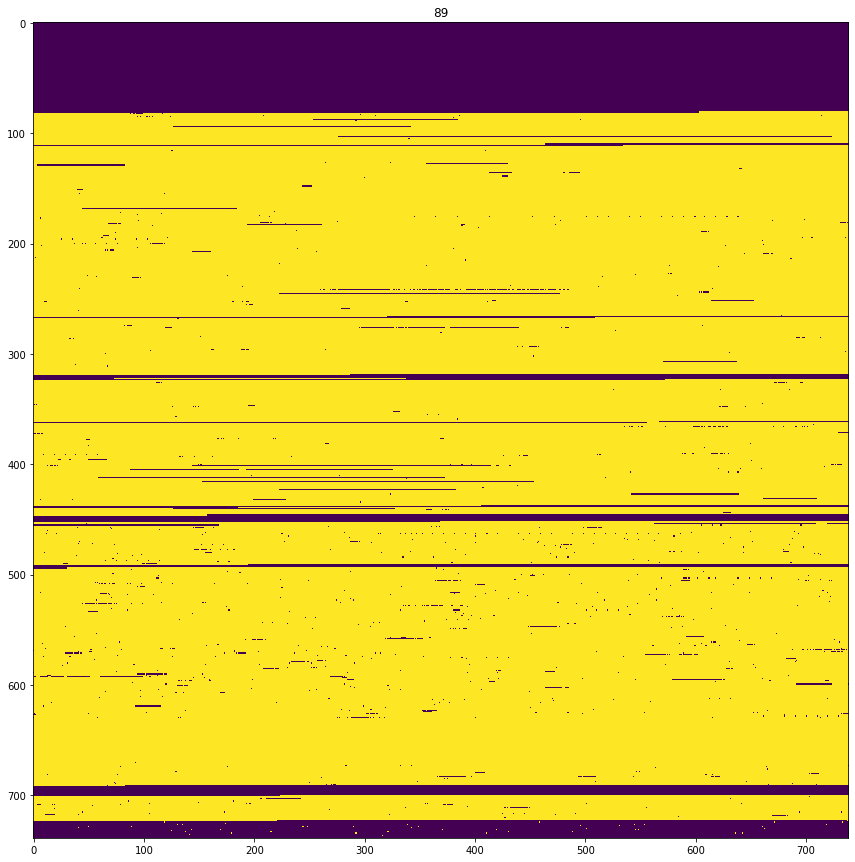

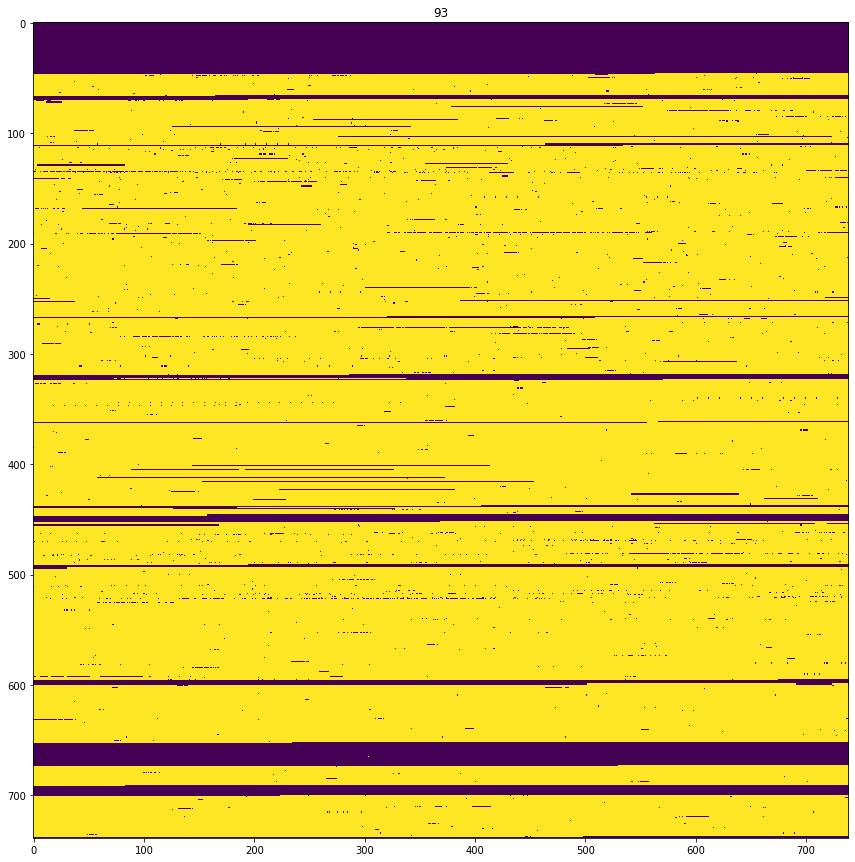

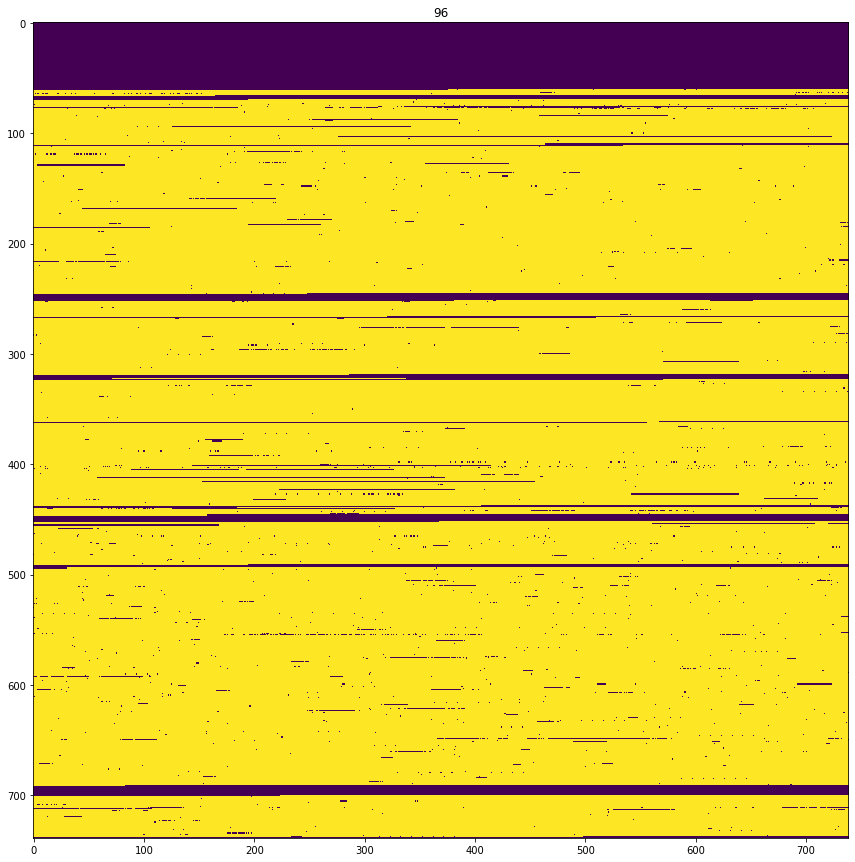

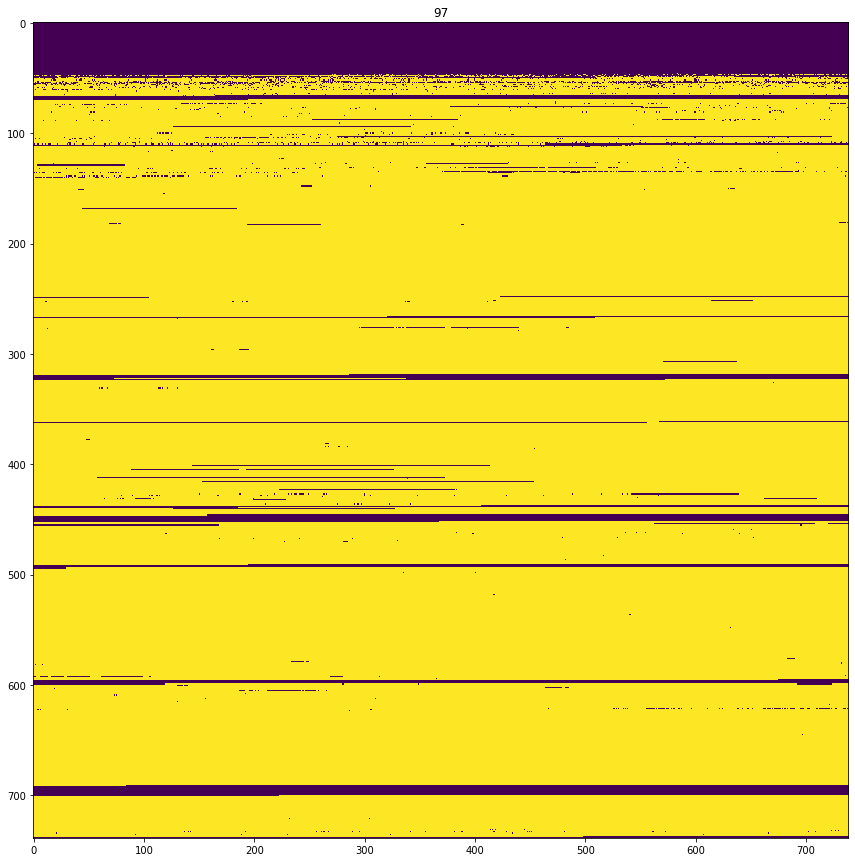

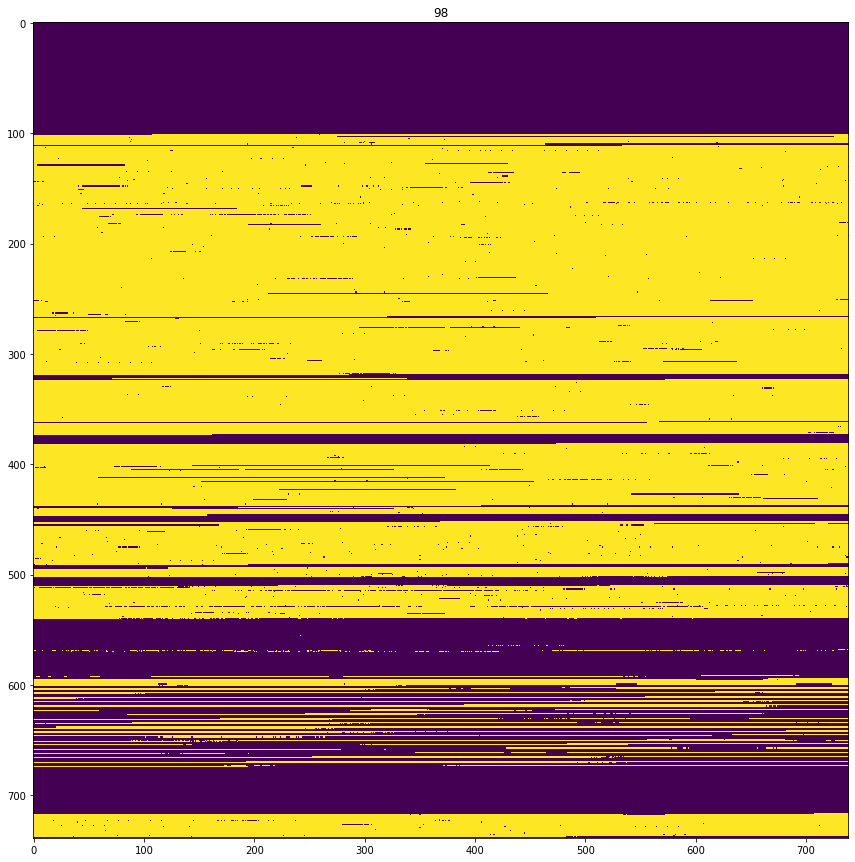

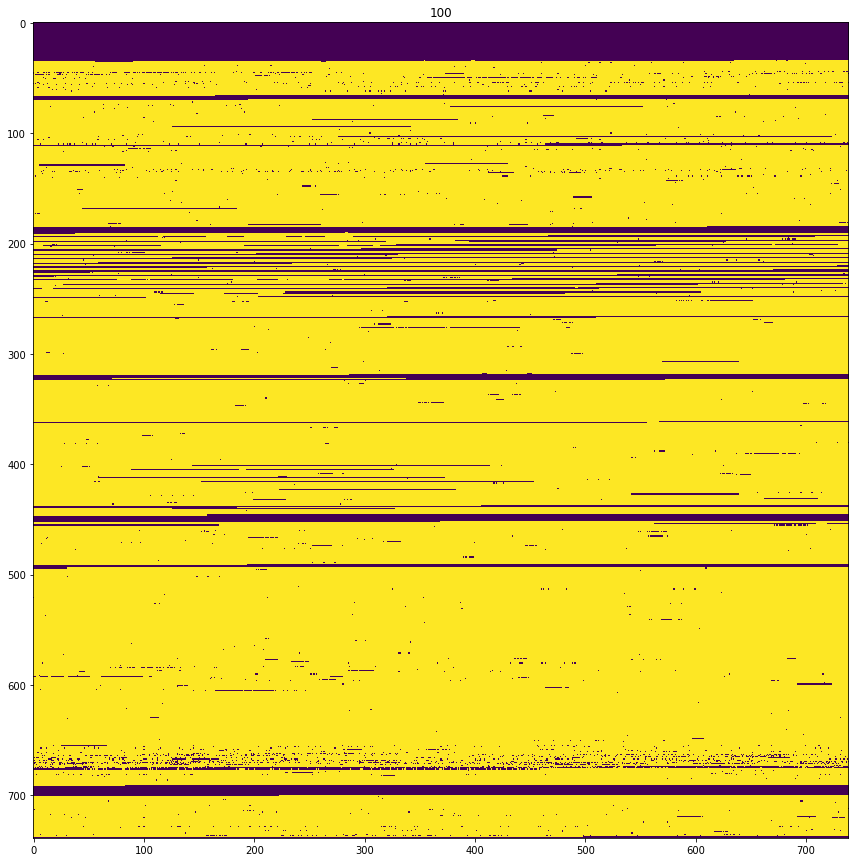

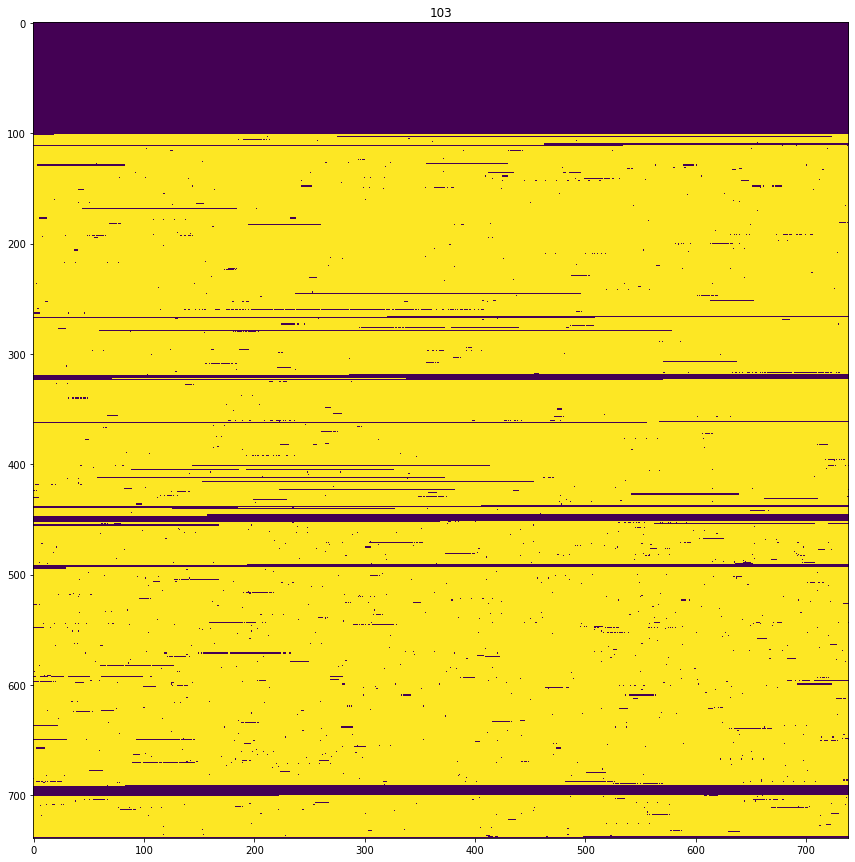

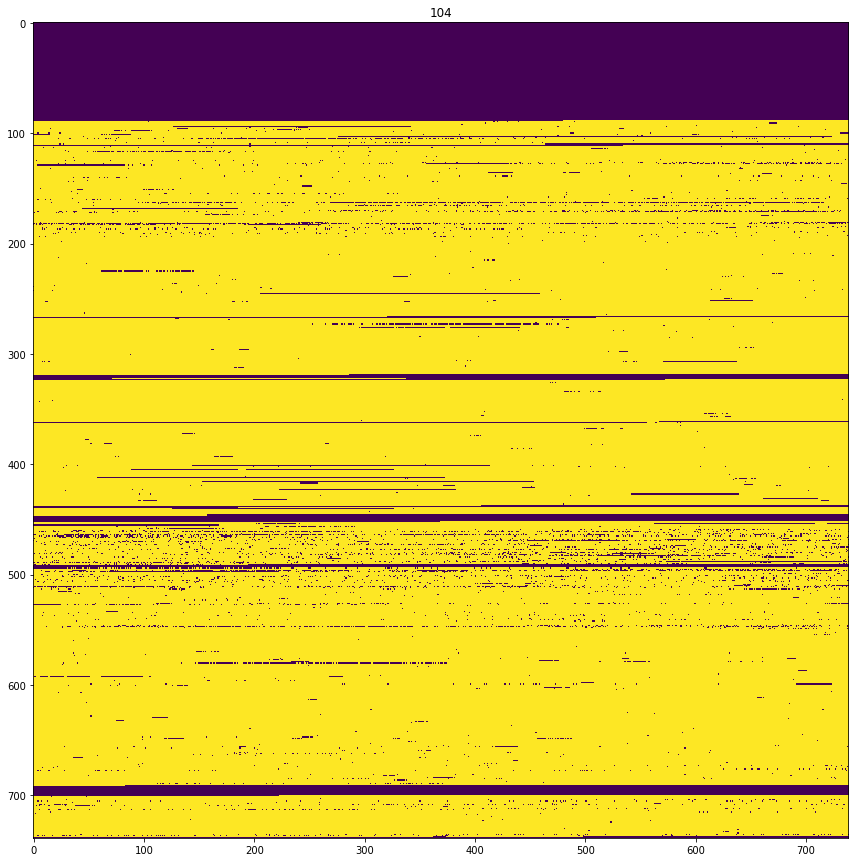

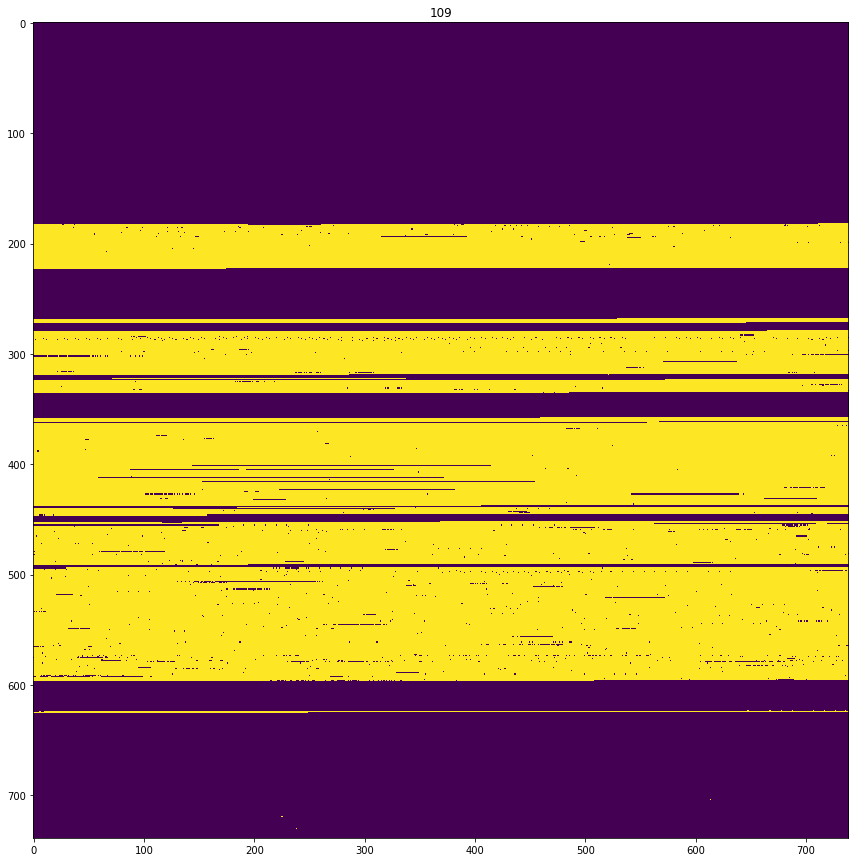

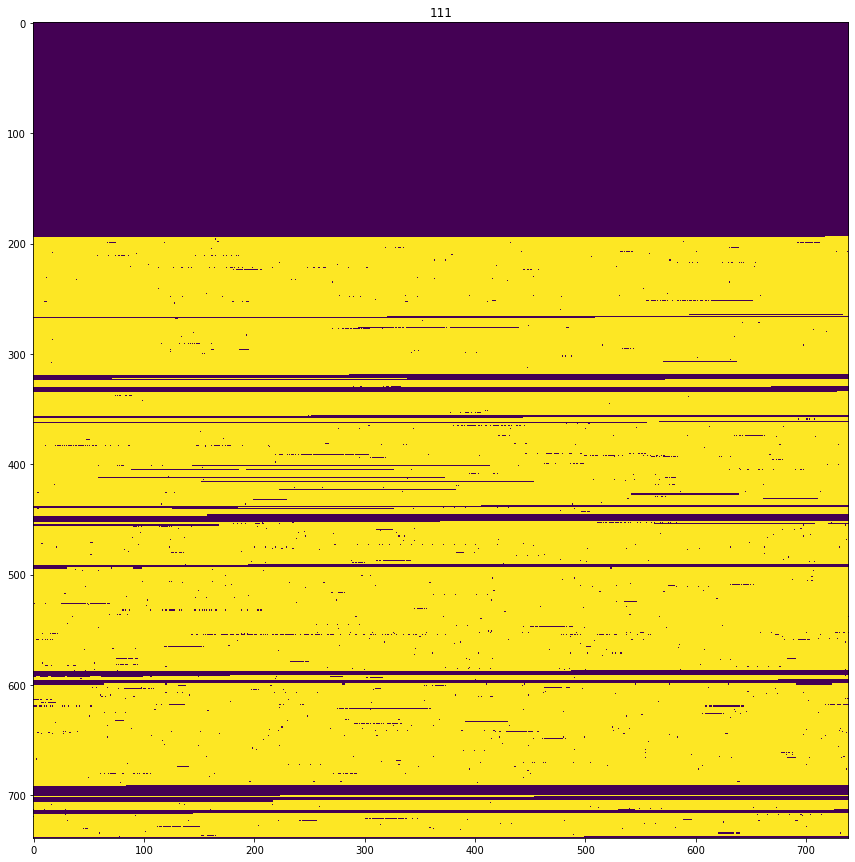

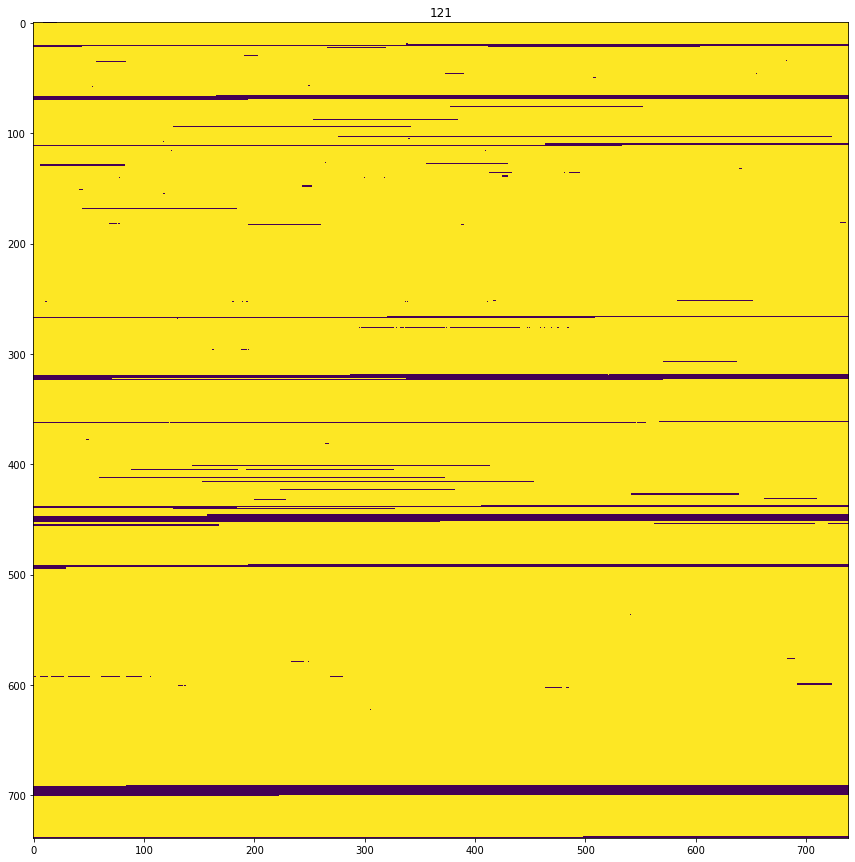

In [26]:
for id in total_id_uniq_new:
    plt.figure(figsize=(15,15))
    plt.imshow(time_indices_map_new[id].reshape(739,739))
    plt.title(id)
    plt.savefig('Figure/sa_figures/new_{}.png'.format(id),dpi=300)

# 测试时间覆盖率

In [28]:
with open('r_data_files/time_indices_map.pkl','rb') as f:
    time_indices_map = pickle.load(f)

In [40]:
id_coverage = np.zeros(np.max(total_id_uniq)+1)
for id in total_id_uniq:
    # print(id,np.sum(time_indices_map[id])/546121)
    id_coverage[id] = np.sum(time_indices_map[id])/546121

In [49]:
id_coverage_new = np.zeros(np.max(total_id_uniq)+1)
for id in total_id_uniq_new:
    id_coverage_new[id] = np.sum(time_indices_map_new[id])/545121

In [46]:
id_max = np.max(total_id_uniq)
id_indices = np.arange(0,id_max+1,1)
print(id_indices)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122]


<BarContainer object of 123 artists>

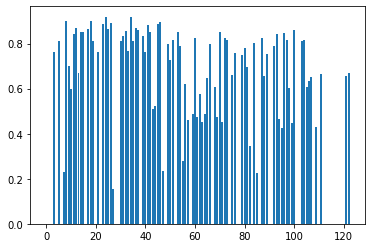

In [47]:
plt.bar(id_indices,id_coverage)

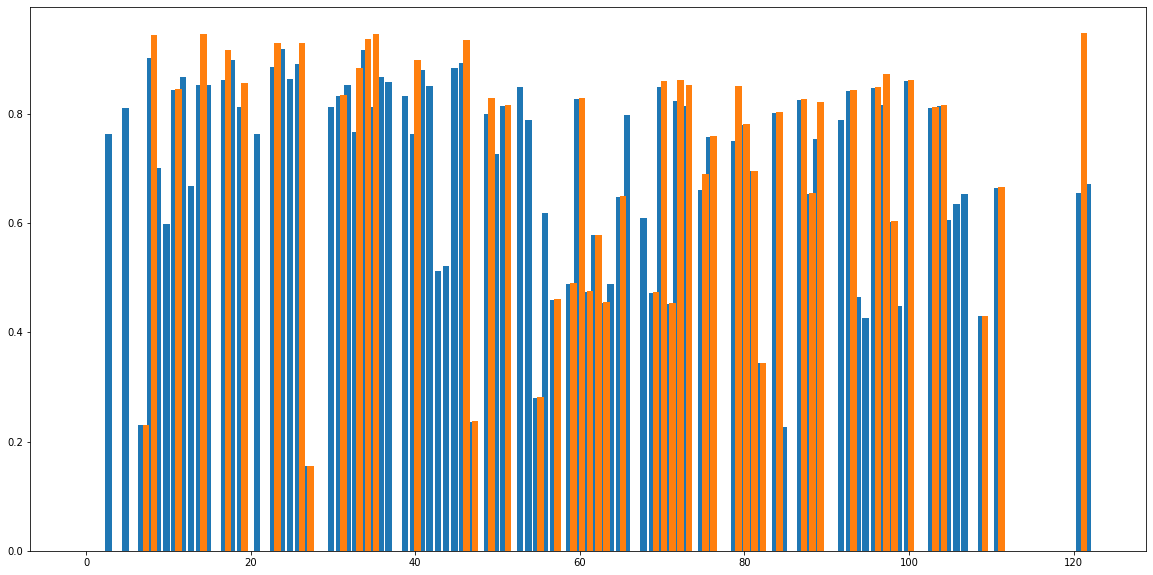

In [71]:
width=0.5
plt.figure(figsize=(20,10))
plt.bar(id_indices-width/2,id_coverage)
# plt.figure(figsize=(20,10))
plt.bar(id_indices+width/2,id_coverage_new)
plt.savefig('Figure/SA_Coverage.png')

In [33]:
len(time_indices_map[3])

546121

In [74]:
total_id_uniq_new

array([  7,   8,  11,  14,  17,  19,  23,  26,  27,  31,  33,  34,  35,
        40,  46,  47,  49,  51,  55,  57,  59,  60,  61,  62,  63,  65,
        69,  70,  71,  72,  73,  75,  76,  79,  80,  81,  82,  84,  87,
        88,  89,  93,  96,  97,  98, 100, 103, 104, 109, 111, 121])

In [75]:
total_id_uniq

array([  3,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,  17,  18,
        19,  21,  23,  24,  25,  26,  27,  30,  31,  32,  33,  34,  35,
        36,  37,  39,  40,  41,  42,  43,  44,  45,  46,  47,  49,  50,
        51,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,
        66,  68,  69,  70,  71,  72,  73,  75,  76,  79,  80,  81,  82,
        84,  85,  87,  88,  89,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 103, 104, 105, 106, 107, 109, 111, 121, 122])

In [77]:
len(total_id_uniq_new)/len(total_id_uniq)

0.5795454545454546

In [79]:
id_record_diff = np.zeros(np.max(total_id_uniq)+1)
for id in total_id_uniq_new:
    id_record_diff[id] = id_record_dict_new[id]/id_record_dict[id]


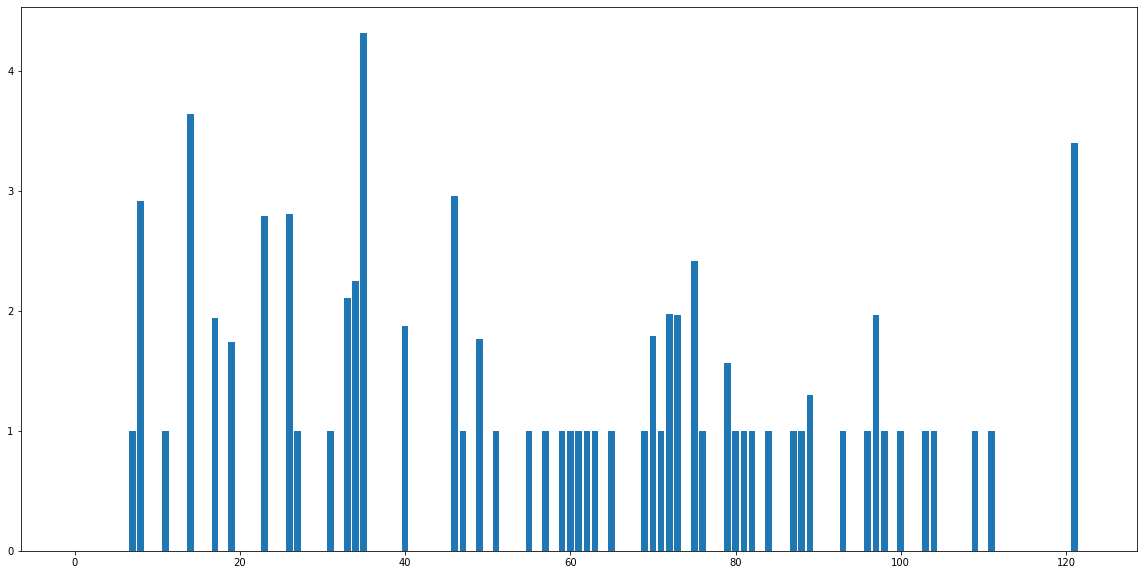

In [81]:
plt.figure(figsize=(20,10))
plt.bar(id_indices,id_record_diff)
plt.savefig('id_record_diff.png',dpi=300)